# Necessary Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from multimode_expts.analysis_notebooks.expts_run_base import *

Warning serial library import failed.
Could not load InstrumentManagerWindow
Could not import QickInstrument, try install qick package
Could not load AD5780 dac 
Could not load labbrick
Could not load Autonics TM4 Driver


In [33]:
expts_base_inst = expts_run_base(data_path=r'H:\Shared drives\SLab\Multimode\experiment\250505_craqm', 
                            config_name='hardware_config_202505.yml',
                              exp_param_name='experiment_config.yml', qubit_i=0)

path:  H:\Shared drives\SLab\Multimode\experiment\250505_craqm
Data will be stored in H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data
Hardware configs will be read from C:\_Lib\python\multimode_expts\configs\hardware_config_202505.yml
Experiment params will be read from C:\_Lib\python\multimode_expts\configs\experiment_config.yml
<Pyro4.core.Proxy at 0x20e63e11580; not connected; for PYRO:obj_65d5568241f84ce6b086ad472fc0670a@192.168.137.101:38179>
Path added at highest priority
['C:\\_Lib\\python\\multimode_expts', 'C:\\_Lib\\python\\multimode_expts', 'C:\\_Lib\\python\\multimode_expts', 'C:\\_Lib\\python\\multimode_expts', 'C:\\_Lib\\python\\multimode_expts', 'C:\\_Lib\\python', 'C:\\_Lib\\python\\slab', 'C:\\_Lib\\python\\qick\\qick_lib', 'C:\\_Lib\\python\\rfsoc\\rfsoc_multimode\\example_expts', 'c:\\_Lib\\python\\multimode_expts\\analysis_notebooks\\bosonic', 'c:\\Users\\26049\\.conda\\envs\\slab\\python38.zip', 'c:\\Users\\26049\\.conda\\envs\\slab\\DLLs', 'c:\\Users\

# Multiphoton Calibration

In [34]:
from MM_dual_rail_base import MM_dual_rail_base
mm_base_calib = MM_dual_rail_base(expts_base_inst.config_thisrun)
# multiphoton_cfg_thisrun = AttrDict(deepcopy(mm_base_calib.multiphoton_cfg))

## functions for $\pi$-pulses for fock n

### Ramsey for the frequency

In [5]:
def do_t2_ramsey(
    config_thisrun,
    expt_path,
    config_path,
    pre_sweep_pulse=None,
    post_sweep_pulse=None,
    step_size=0.05,
    if_ef=False,
    ef_init=True, # redundant
    start=0.01,
    expts=75,
    ramsey_freq=0.2,
    reps=250,
    rounds=1,
    qubits=[0],
    user_defined_freq=[False, 3568.2038290468167, 5304, 0.035],
    f0g1_cavity=0,
    normalize=False,
    active_reset=False,
    man_reset=True,
    storage_reset=False,
    prepulse=None,
    postpulse=None,
    pre_active_reset_pulse=False,
    gate_based=False,
    advance_phase=0,
    echoes=[False, 0],
    relax_delay=2500
):
    """Run the T2 Ramsey experiment with all config params as function arguments."""
    t2ramsey = expts_base_inst.meas.single_qubit.t2_ramsey.RamseyExperiment(
        soccfg=expts_base_inst.soc, path=expt_path, prefix='RamseyExperiment', config_file=config_path
    )

    t2ramsey.cfg = AttrDict(deepcopy(config_thisrun))
    checkEF = False
    qubit_ge_init = False
    qubit_ge_after = False
    if if_ef:
        checkEF = True
        qubit_ge_init = True if ef_init else False
        qubit_ge_after = True if ef_init else False

    t2ramsey.cfg.expt = {
        'start': start,
        'step': step_size,
        'expts': expts,
        'ramsey_freq': ramsey_freq,
        'reps': reps,
        'rounds': rounds,
        'qubits': qubits,
        'checkEF': checkEF,
        'user_defined_freq': user_defined_freq,
        'qubit_ge_init': qubit_ge_init,
        'qubit_ge_after': qubit_ge_after,
        'f0g1_cavity': f0g1_cavity,
        'normalize': normalize,
        'active_reset': active_reset,
        'man_reset': man_reset,
        'storage_reset': storage_reset,
        'prepulse': False if pre_sweep_pulse is None else True if prepulse is None else prepulse,
        'postpulse': False if post_sweep_pulse is None else True if postpulse is None else postpulse,
        'pre_active_reset_pulse': pre_active_reset_pulse,
        'pre_sweep_pulse': pre_sweep_pulse,
        'post_sweep_pulse': post_sweep_pulse,
        'gate_based': gate_based,
        'advance_phase': advance_phase,
        'echoes': echoes
    }

    t2ramsey.cfg.device.readout.relax_delay = [relax_delay]  # Wait time between experiments [us]
    t2ramsey.go(analyze=False, display=False, progress=True, save=True)
    from multimode_expts.fit_display_classes import RamseyFitting
    t2ramsey_analysis = RamseyFitting(
        t2ramsey.data, config=t2ramsey.cfg,
    )
    return t2ramsey_analysis

### Rabi for the amplitude

In [6]:
def do_amplitude_rabi(
    config_thisrun,
    expt_path,
    config_path,
    start=50,
    step=450,
    expts=75,
    reps=100,
    rounds=1,
    sigma_test=None,
    qubit=0,
    pulse_type='gauss',
    drag_beta=0.0,
    pulse_ge_init=False,
    pulse_ge_after=False,
    checkZZ=False,
    checkEF=False,
    qubits=[0],
    flat_length=0,
    normalize=False,
    single_shot=False,
    singleshot_reps=10000,
    span=50,
    user_defined_freq=[False, 3568.203829046816],
    prepulse=False,
    pre_sweep_pulse=None,
    post_sweep_pulse=None,
    postpulse=False,
    gate_based=False,
    relax_delay=2500,
    if_ef=False
):
    """Run the amplitude Rabi experiment with all config params as function arguments."""
    amprabi = expts_base_inst.meas.single_qubit.amplitude_rabi.AmplitudeRabiExperiment(
        soccfg=expts_base_inst.soc, path=expt_path, prefix='AmplitudeRabiExperiment', config_file=config_path
    )

    amprabi.cfg = AttrDict(deepcopy(config_thisrun))
    print(f"Amplitude Rabi Program with config: {amprabi.cfg.hw.soc.dacs}")
    pulse_ge = config_thisrun.device.qubit.pulses.pi_ge

    if sigma_test is None:
        sigma_test = pulse_ge.sigma[0]

    if if_ef:
        checkEF = True
        pulse_ge_init = True
        pulse_ge_after = True

    amprabi.cfg.expt = dict(
        start=start,
        step=step,
        expts=expts,
        reps=reps,
        rounds=rounds,
        sigma_test=sigma_test,
        qubit=qubit,
        pulse_type=pulse_type,
        drag_beta=drag_beta,
        pulse_ge_init=pulse_ge_init,
        pulse_ge_after=pulse_ge_after,
        checkZZ=checkZZ,
        checkEF=checkEF,
        qubits=qubits,
        flat_length=flat_length,
        normalize=normalize,
        single_shot=single_shot,
        singleshot_reps=singleshot_reps,
        span=span,
        user_defined_freq=user_defined_freq,
        prepulse=prepulse,
        postpulse=postpulse,
        pre_sweep_pulse=pre_sweep_pulse if pre_sweep_pulse is not None else [],
        post_sweep_pulse=post_sweep_pulse if post_sweep_pulse is not None else [],
        gate_based=gate_based
    )
    amprabi.cfg.device.readout.relax_delay = [relax_delay]
    amprabi.go(analyze=False, display=False, progress=True, save=True)
    return amprabi

### Error amplification

In [7]:
def do_error_amplification(
    config_thisrun,
    expt_path,
    config_path,
    reps=100,
    rounds=1,
    qubit=0,
    n_pulses=10,
    active_reset=False,
    man_reset=True,
    storage_reset=True,
    relax_delay=2500, 
    start = 0,
    expts = 10,
    step = 100,
    parameter_to_test = 'gain',
    pulse_type=['qubit', 'ge', 'pi', 0],
):
    """
    Run the Histogram Prepulse Experiment with configurable parameters.
    """
        
    expt_cfg = {
        'reps': reps,
        'qubit': qubit,
        'qubits': [qubit],
        'active_reset': active_reset,
        'man_reset': man_reset,
        'storage_reset': storage_reset,
        'start': start,
        'expts': expts,
        'step': step,
        'n_pulses': n_pulses,
        'pulse_type': pulse_type,
        'parameter_to_test': parameter_to_test,
        'rounds': rounds,

    }
    error_amp_exp = expts_base_inst.meas.single_qubit.error_amplification.ErrorAmplificationExperiment(
    soccfg=expts_base_inst.soc, path=expts_base_inst.expt_path,
      prefix='ErrorAmplificationExperiment', config_file=expts_base_inst.config_file)
    error_amp_exp.cfg = AttrDict(deepcopy(config_thisrun))
    error_amp_exp.cfg.expt = expt_cfg
    error_amp_exp.go(analyze=False, display=False, progress=True, save=True)
    return error_amp_exp

## define the transition we want to calibrate

In [13]:
transition = 'g0-e0'
_transition = transition[0] + 'n' + '-' + transition[3] + 'n'
i = int(transition[1])
pre_sweep_pulse = mm_base_calib.prep_man_photon(man_no=1, photon_no=i)
print(f"pre_sweep_pulse: {pre_sweep_pulse}")
postpulse = False
post_pulse = []
if transition[0] == 'e':
    pre_sweep_pulse.append(['multiphoton', 'g'+str(i)+'-e'+str(i), 'pi', 0])
    postpulse = True,
    post_pulse = [['multiphoton', 'g'+str(i)+'-e'+str(i), 'pi', 0]]  # post pulse is the same as prepulse
    # post_pulse = mm_base_calib.get_prepulse_creator(post_pulse, multiphoton_cfg_thisrun).pulse.tolist()
    post_pulse = mm_base_calib.get_prepulse_creator(post_pulse, expts_base_inst.config_thisrun).pulse.tolist()

pre_sweep_pulse = mm_base_calib.get_prepulse_creator(pre_sweep_pulse, expts_base_inst.config_thisrun).pulse.tolist()
# pre_sweep_pulse = mm_base_calib.get_prepulse_creator(pre_sweep_pulse, multiphoton_cfg_thisrun).pulse.tolist()

pre_sweep_pulse: []


### Ramsey

In [204]:
t2ramsey_any = do_t2_ramsey(
    config_thisrun=expts_base_inst.config_thisrun,
    expt_path=expts_base_inst.expt_path,
    config_path=expts_base_inst.config_file, 
    user_defined_freq=[True,
                      expts_base_inst.config_thisrun.device.multiphoton['hpi'][_transition]['frequency'][1],
                      # 3428.4,
                      expts_base_inst.config_thisrun.device.multiphoton['hpi'][_transition]['gain'][1],
                      expts_base_inst.config_thisrun.device.multiphoton['hpi'][_transition]['sigma'][1]],
    prepulse = True, 
    postpulse = postpulse,
    gate_based = False,
    pre_sweep_pulse = pre_sweep_pulse,
    post_sweep_pulse=post_pulse,
    ramsey_freq=2,
    step_size=0.01,
    expts=50,
)

fge is  3571.672429380876
fef is  3428.4217571066574


  0%|          | 0/12500 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00415_RamseyExperiment.h5


No echoes in the data
Attempted to init fitparam 1 to 46.93877551020408, which is out of bounds 0.20833333333333334 to 31.25. Instead init to 15.729166666666666
Attempted to init fitparam 1 to 36.734693877551024, which is out of bounds 0.20833333333333334 to 31.25. Instead init to 15.729166666666666
Using user defined frequency: 3570.0567055299525 MHz
Current pi pulse frequency: 3570.0567055299525
Fit frequency from I [MHz]: 16.22265519438831 +/- 0.5502681009088924
Suggested new pi pulse frequency from fit I [MHz]:
 	3555.8340503355644
 	3588.2793607243407
T2 Ramsey from fit I [us]: 0.4465068352333214
Fit frequency from Q [MHz]: 18.54757291639441 +/- 1.387891885537784
Suggested new pi pulse frequencies from fit Q [MHz]:
 	3553.509132613558
 	3590.604278446347
T2 Ramsey from fit Q [us]: 0.14400000000000318


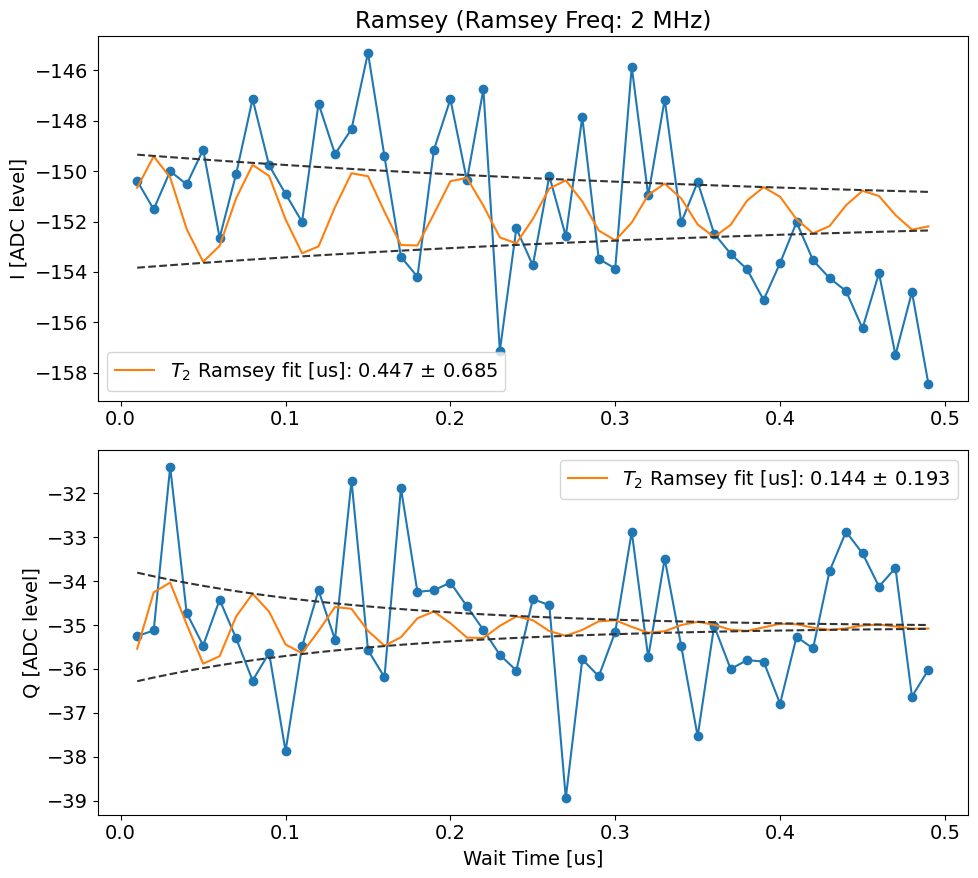

supertitle is  None
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-07-17_11-01-33_Ramsey.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-07-17.md


In [ ]:
t2ramsey_any.analyze()
# fitparams=[amp, freq (non-angular), phase (deg), decay time, amp offset, decay time offset]
# t2ramsey_any.analyze(fitparams=[500, 0.05, None, None, None, None])
t2ramsey_any.display()

In [ ]:
# print("Qubit frequency before update:",multiphoton_cfg_thisrun.pulses['hpi_' + transition]['frequency'])
# print("Qubit frequency before update:",multiphoton_cfg_thisrun.pulses['pi_' + transition]['frequency'])
# multiphoton_cfg_thisrun.pulses['hpi_' + transition]['frequency']  += min(t2ramsey_any.data['f_adjust_ramsey_avgi'])
# multiphoton_cfg_thisrun.pulses['pi_' + transition]['frequency']  += min(t2ramsey_any.data['f_adjust_ramsey_avgi'])
# print('Updated qubit frequency to:',multiphoton_cfg_thisrun.pulses['hpi_' + transition]['frequency'])
# print('Updated qubit frequency to:',multiphoton_cfg_thisrun.pulses['pi_' + transition]['frequency'])

print("Qubit frequency before update:",expts_base_inst.config_thisrun.device.multiphoton['hpi'][_transition]['frequency'][i])
print("Qubit frequency before update:",expts_base_inst.config_thisrun.device.multiphoton['pi'][_transition]['frequency'][i])
expts_base_inst.config_thisrun.device.multiphoton['hpi'][_transition]['frequency'][i] += min(t2ramsey_any.data['f_adjust_ramsey_avgi'])
# expts_base_inst.config_thisrun.device.multiphoton['hpi'][_transition]['frequency'][i] = 3428.1548845179946
expts_base_inst.config_thisrun.device.multiphoton['pi'][_transition]['frequency'][i] += min(t2ramsey_any.data['f_adjust_ramsey_avgi'])
# expts_base_inst.config_thisrun.device.multiphoton['pi'][_transition]['frequency'][i] = 3428.1548845179946
print('Updated qubit frequency to:',expts_base_inst.config_thisrun.device.multiphoton['hpi'][_transition]['frequency'][i])
print('Updated qubit frequency to:',expts_base_inst.config_thisrun.device.multiphoton['pi'][_transition]['frequency'][i])

Qubit frequency before update: 3420.022801387772
Qubit frequency before update: 3422.5429916864027
Updated qubit frequency to: 3428.1548845179946
Updated qubit frequency to: 3428.1548845179946


### Rabi

In [256]:
amprabi_any = do_amplitude_rabi(
    config_thisrun=expts_base_inst.config_thisrun,
    expt_path=expts_base_inst.expt_path,
    config_path=expts_base_inst.config_file,
    # sigma_test=multiphoton_cfg_thisrun.pulses['pi_' + transition]['sigma'],
    sigma_test= expts_base_inst.config_thisrun.device.multiphoton['pi'][_transition]['sigma'][i],
    qubit=0,
    # user_defined_freq=[True, multiphoton_cfg_thisrun.pulses['pi_' + transition]['frequency']],
    user_defined_freq=[True, expts_base_inst.config_thisrun.device.multiphoton['pi'][_transition]['frequency'][1]],
    prepulse=True,
    postpulse=postpulse,
    gate_based=False,
    pre_sweep_pulse=pre_sweep_pulse,
    post_sweep_pulse=post_pulse,
    step=100,expts=100,reps=100
)

Amplitude Rabi Program with config: {'qubit': {'ch': [2], 'type': ['full'], 'nyquist': [1]}, 'readout': {'ch': [5], 'type': ['full'], 'nyquist': [1]}, 'manipulate_in': {'ch': [3], 'type': ['full'], 'nyquist': [2]}, 'storage_in': {'ch': [6], 'type': ['full'], 'nyquist': [2]}, 'flux_low': {'ch': [1], 'type': ['full'], 'nyquist': [1]}, 'flux_high': {'ch': [1], 'type': ['full'], 'nyquist': [1]}, 'sideband': {'ch': [0], 'type': ['full'], 'nyquist': [1]}}


  0%|          | 0/10000 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00091_AmplitudeRabiExperiment.h5


Pi gain from avgi data [dac units]: 2760
	Pi/2 gain from avgi data [dac units]: 1353
Pi gain from avgq data [dac units]: 2742
	Pi/2 gain from avgq data [dac units]: 1329


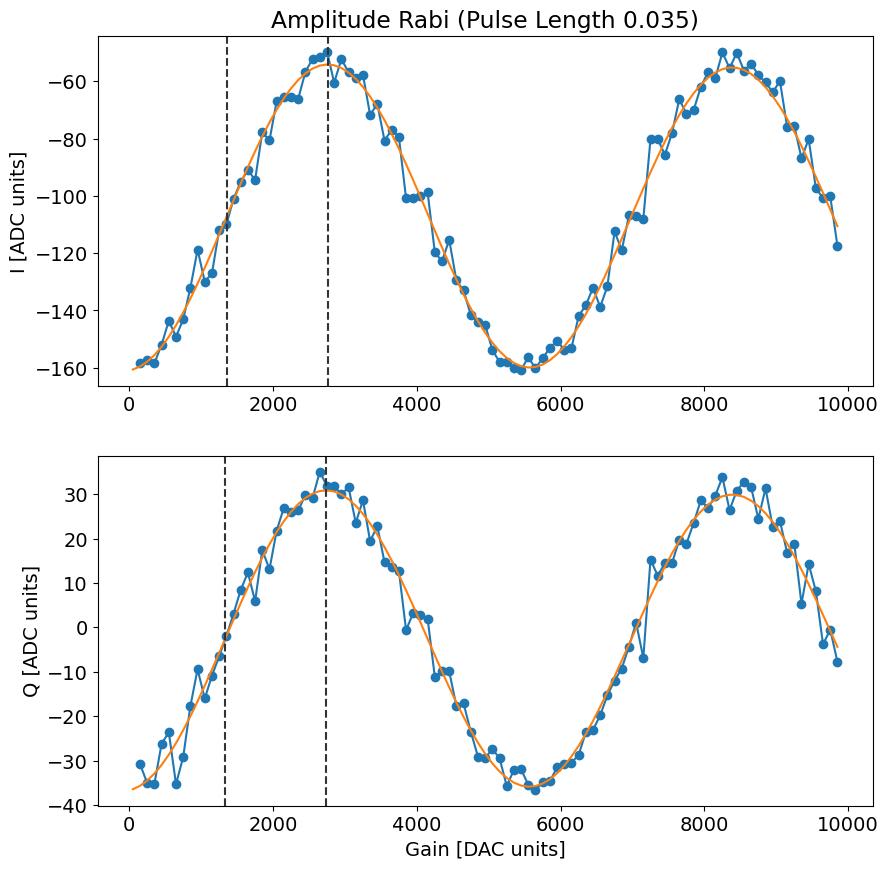

In [257]:
 # fitparams=[amp, freq (non-angular), phase (deg), decay time, amp offset, decay time offset]
# amprabi_any.analyze(fitparams=[np.max(amprabi_any.data['amps']), 0.000017, 10, None, -100, None])
amprabi_any.analyze()
amprabi_any.display(title_str='Amplitude Rabi_ge', save_fig=True)

In [258]:
# print("Qubit hpi gain before update:",multiphoton_cfg_thisrun.pulses['hpi_' + transition]['gain'])
# multiphoton_cfg_thisrun.pulses['hpi_' + transition]['gain'] = amprabi_any.data['hpi_gain_avgi']
# print('Updated hpi gain to:',multiphoton_cfg_thisrun.pulses['hpi_' + transition]['gain'])

# print("Qubit pi gain before update:",multiphoton_cfg_thisrun.pulses['pi_' + transition]['gain'])
# multiphoton_cfg_thisrun.pulses['pi_' + transition]['gain'] = amprabi_any.data['pi_gain_avgi']
# print('Updated pi gain to:',multiphoton_cfg_thisrun.pulses['pi_' + transition]['gain'])

print("Qubit hpi gain before update:",expts_base_inst.config_thisrun.device.multiphoton['hpi'][_transition]['gain'][i])
expts_base_inst.config_thisrun.device.multiphoton['hpi'][_transition]['gain'][i] = amprabi_any.data['hpi_gain_avgi']
print('Updated hpi gain to:',expts_base_inst.config_thisrun.device.multiphoton['hpi'][_transition]['gain'][i])
print("Qubit pi gain before update:",expts_base_inst.config_thisrun.device.multiphoton['pi'][_transition]['gain'][i])
expts_base_inst.config_thisrun.device.multiphoton['pi'][_transition]['gain'][i] = amprabi_any.data['pi_gain_avgi']
print('Updated pi gain to:',expts_base_inst.config_thisrun.device.multiphoton['pi'][_transition]['gain'][i])

Qubit hpi gain before update: 3860
Updated hpi gain to: 1353
Qubit pi gain before update: 6326
Updated pi gain to: 2760


### Error amplification $\pi$ pulse

### Frequency

In [61]:
expts = 25
band = 2
freq_start = expts_base_inst.config_thisrun.device.multiphoton['pi'][_transition]['frequency'][i] - band
step = 2 * band / expts
print(f'Frequency start: {freq_start}, Step: {step}')

err_amp_pi_freq = do_error_amplification(
    config_thisrun=expts_base_inst.config_thisrun,
    expt_path=expts_base_inst.expt_path,
    config_path=expts_base_inst.config_file,
    reps=100,
    rounds=1,
    n_pulses = 10,
    expts=expts,
    start=freq_start,
    step=step,
    pulse_type=['multiphoton', transition, 'pi', 0],
    parameter_to_test='frequency',
)

Frequency start: 3577.9673590705593, Step: 0.16
{'start': 2, 'step': 0.1, 'qubits': [0], 'expts': 25, 'reps': 300, 'rounds': 1, 'gain': 8000, 'freq': 2011.7147366265876, 'use_arb_waveform': 0, 'pi_ge_before': 0, 'pi_ef_before': 0, 'pi_ge_after': 0, 'pi_ef_after': 0, 'normalize': 0, 'active_reset': 0, 'check_man_reset': [0, 0], 'swap_lossy': 0, 'check_man_reset_pi': [], 'prepulse': 1, 'pre_sweep_pulse': [[3579.4384683413878, 3428.2303438452373, 2011.4000000000008, 3571.9213048825372, 3423.7266366015674], [18962, 2767, 8000, 10566, 9159], [0, 0, 0.5452584298467464, 0, 0], [0, 0, 0, 0, 0], [2, 2, 0, 2, 2], ['gauss', 'gauss', 'flat_top', 'gauss', 'gauss'], [0.007, 0.035, 0.005, 0.035, 0.035]], 'err_amp_reps': 0, 'length_placeholder': 4.4}


  0%|          | 0/9 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00246_ErrorAmplificationExperiment.h5


fitparams [2.965094709602071e-06, 0.9999970349052903, 3580.3673590705594, 0.38400000000001455]


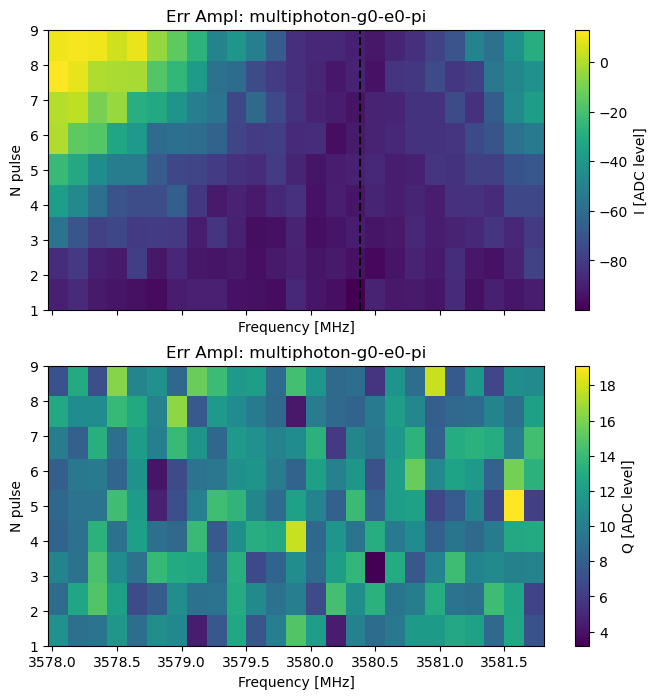

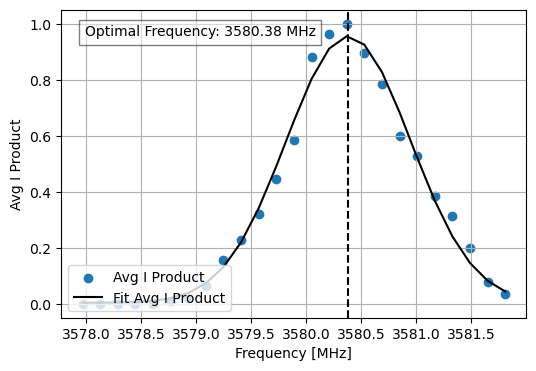

In [62]:
err_amp_pi_freq.analyze()
err_amp_pi_freq.display()

In [63]:
print("Qubit pi frequency before update:",expts_base_inst.config_thisrun.device.multiphoton['pi'][_transition]['frequency'][i])
expts_base_inst.config_thisrun.device.multiphoton['pi'][_transition]['frequency'][i] = err_amp_pi_freq.data['fit_avgi'][2]
print("Qubit pi frequency after update:",expts_base_inst.config_thisrun.device.multiphoton['pi'][_transition]['frequency'][i])

Qubit pi frequency before update: 3579.9673590705593
Qubit pi frequency after update: 3580.3825840728755


In [454]:
expts_base_inst.config_thisrun.device.multiphoton['pi'][_transition]['frequency']

[3579.9600164369886, 3571.5382408986256, 3571.543042357372, 3571.299620008302]

### Amplitude

In [64]:
band = 2000
expts = 25
gain_start = expts_base_inst.config_thisrun.device.multiphoton['pi'][_transition]['gain'][i] - band
# gain_start = 2*expts_base_inst.config_thisrun.device.multiphoton['hpi'][_transition]['gain'][i] - band
step = 2 * band / expts
print(f'Gain start: {gain_start}, Step: {step}')

err_amp_pi_gain = do_error_amplification(
    config_thisrun=expts_base_inst.config_thisrun,
    expt_path=expts_base_inst.expt_path,
    config_path=expts_base_inst.config_file,
    reps=100,
    rounds=1,
    n_pulses = 10,
    expts=expts,
    start=gain_start,
    step=step,
    pulse_type=['multiphoton', transition, 'pi', 0],
    parameter_to_test='gain',
)

Gain start: 17143, Step: 160.0
{'start': 2, 'step': 0.1, 'qubits': [0], 'expts': 25, 'reps': 300, 'rounds': 1, 'gain': 8000, 'freq': 2011.7147366265876, 'use_arb_waveform': 0, 'pi_ge_before': 0, 'pi_ef_before': 0, 'pi_ge_after': 0, 'pi_ef_after': 0, 'normalize': 0, 'active_reset': 0, 'check_man_reset': [0, 0], 'swap_lossy': 0, 'check_man_reset_pi': [], 'prepulse': 1, 'pre_sweep_pulse': [[3579.4384683413878, 3428.2303438452373, 2011.4000000000008, 3571.9213048825372, 3423.7266366015674], [18962, 2767, 8000, 10566, 9159], [0, 0, 0.5452584298467464, 0, 0], [0, 0, 0, 0, 0], [2, 2, 0, 2, 2], ['gauss', 'gauss', 'flat_top', 'gauss', 'gauss'], [0.007, 0.035, 0.005, 0.035, 0.035]], 'err_amp_reps': 0, 'length_placeholder': 4.4}


  0%|          | 0/9 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00247_ErrorAmplificationExperiment.h5


fitparams [-2.2415105187567277e-06, 1.0000022415105188, 18583.0, 384.0]


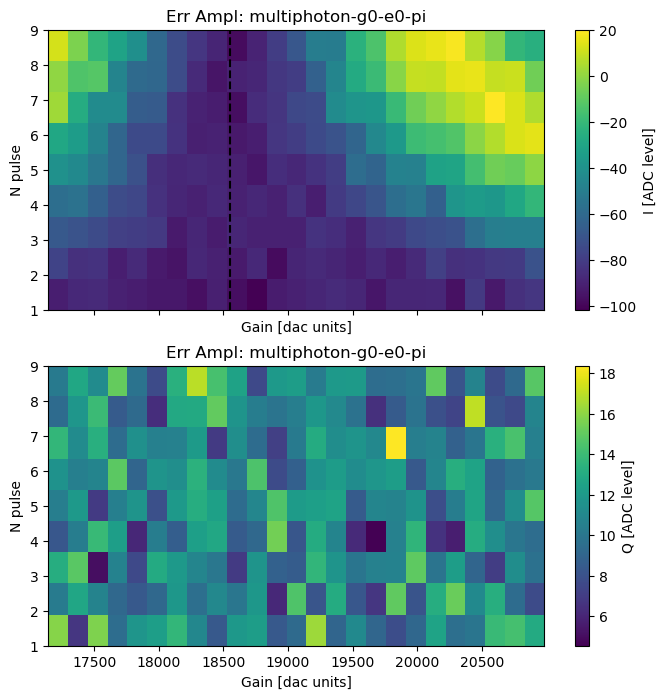

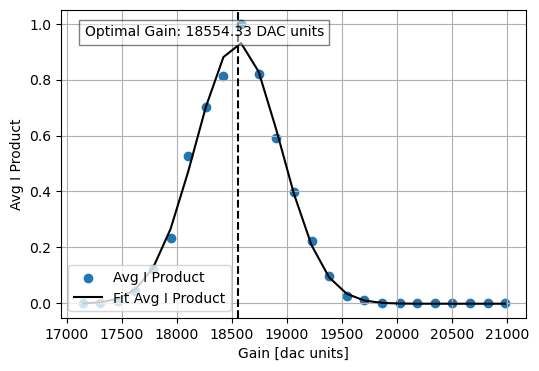

In [65]:
err_amp_pi_gain.analyze()
err_amp_pi_gain.display()

In [67]:
print("Qubit pi amplitude before update:",expts_base_inst.config_thisrun.device.multiphoton['pi'][_transition]['gain'][i])
expts_base_inst.config_thisrun.device.multiphoton['pi'][_transition]['gain'][i] = int(err_amp_pi_gain.data['fit_avgi'][2])
print("Qubit pi amplitude after update:",expts_base_inst.config_thisrun.device.multiphoton['pi'][_transition]['gain'][i])

Qubit pi amplitude before update: 18554
Qubit pi amplitude after update: 18554


### Error amplification $\pi/2$ pulse

### Frequency

In [47]:
expts = 25
band = 2
# expts_base_inst.config_thisrun.device.multiphoton['hpi'][_transition]['sigma'][i] = 0.035
freq_start = expts_base_inst.config_thisrun.device.multiphoton['hpi'][_transition]['frequency'][i] - band
step = 2 * band / expts
print(f'Frequency start: {freq_start}, Step: {step}')

err_amp_pi2_freq = do_error_amplification(
    config_thisrun=expts_base_inst.config_thisrun,
    expt_path=expts_base_inst.expt_path,
    config_path=expts_base_inst.config_file,
    reps=100,
    rounds=1,
    n_pulses = 10,
    expts=expts,
    start=freq_start,
    step=step,
    pulse_type=['multiphoton', transition, 'hpi', 0],
    parameter_to_test='frequency',
)

Frequency start: 3571.00785430557, Step: 0.16
{'start': 2, 'step': 0.1, 'qubits': [0], 'expts': 25, 'reps': 300, 'rounds': 1, 'gain': 8000, 'freq': 2011.7147366265876, 'use_arb_waveform': 0, 'pi_ge_before': 0, 'pi_ef_before': 0, 'pi_ge_after': 0, 'pi_ef_after': 0, 'normalize': 0, 'active_reset': 0, 'check_man_reset': [0, 0], 'swap_lossy': 0, 'check_man_reset_pi': [], 'prepulse': 1, 'pre_sweep_pulse': [[3579.4384683413878, 3428.2303438452373, 2011.4000000000008, 3571.9213048825372, 3423.7266366015674], [18962, 2767, 8000, 10566, 9159], [0, 0, 0.5452584298467464, 0, 0], [0, 0, 0, 0, 0], [2, 2, 0, 2, 2], ['gauss', 'gauss', 'flat_top', 'gauss', 'gauss'], [0.007, 0.035, 0.005, 0.035, 0.035]], 'err_amp_reps': 0, 'length_placeholder': 4.4}


  0%|          | 0/9 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00242_ErrorAmplificationExperiment.h5


fitparams [0.02055180716194466, 0.9794481928380553, 3573.08785430557, 0.38400000000001455]


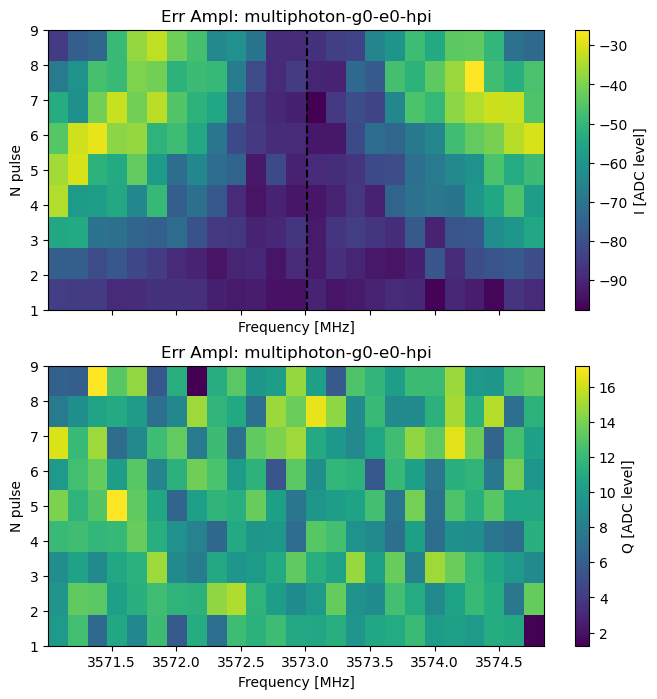

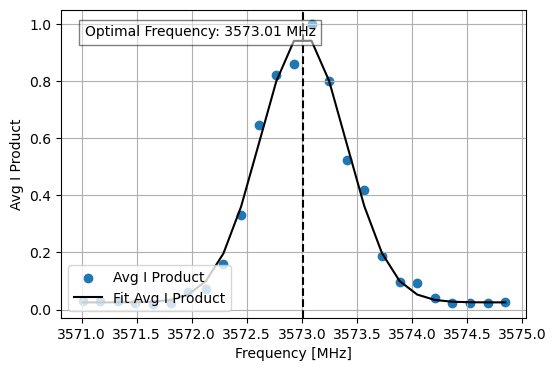

In [48]:
err_amp_pi2_freq.analyze()
err_amp_pi2_freq.display()

In [49]:
print("Qubit pi frequency before update:",expts_base_inst.config_thisrun.device.multiphoton['hpi'][_transition]['frequency'][i])
expts_base_inst.config_thisrun.device.multiphoton['hpi'][_transition]['frequency'][i] = err_amp_pi2_freq.data['fit_avgi'][2]
print("Qubit pi frequency after update:",expts_base_inst.config_thisrun.device.multiphoton['hpi'][_transition]['frequency'][i])

Qubit pi frequency before update: 3573.00785430557
Qubit pi frequency after update: 3573.0083971326158


### Amplitude

In [50]:
band = 1000
expts = 25
# gain_start = 18000/2 - band
gain_start = expts_base_inst.config_thisrun.device.multiphoton['hpi'][_transition]['gain'][i] - band
step = 2 * band / expts
print(f'Gain start: {gain_start}, Step: {step}')

err_amp_pi2_gain = do_error_amplification(
    config_thisrun=expts_base_inst.config_thisrun,
    expt_path=expts_base_inst.expt_path,
    config_path=expts_base_inst.config_file,
    reps=100,
    rounds=1,
    n_pulses = 10,
    expts=expts,
    start=gain_start,
    step=step,
    pulse_type=['multiphoton', transition, 'hpi', 0],
    parameter_to_test='gain',
)

Gain start: 7833, Step: 80.0
{'start': 2, 'step': 0.1, 'qubits': [0], 'expts': 25, 'reps': 300, 'rounds': 1, 'gain': 8000, 'freq': 2011.7147366265876, 'use_arb_waveform': 0, 'pi_ge_before': 0, 'pi_ef_before': 0, 'pi_ge_after': 0, 'pi_ef_after': 0, 'normalize': 0, 'active_reset': 0, 'check_man_reset': [0, 0], 'swap_lossy': 0, 'check_man_reset_pi': [], 'prepulse': 1, 'pre_sweep_pulse': [[3579.4384683413878, 3428.2303438452373, 2011.4000000000008, 3571.9213048825372, 3423.7266366015674], [18962, 2767, 8000, 10566, 9159], [0, 0, 0.5452584298467464, 0, 0], [0, 0, 0, 0, 0], [2, 2, 0, 2, 2], ['gauss', 'gauss', 'flat_top', 'gauss', 'gauss'], [0.007, 0.035, 0.005, 0.035, 0.035]], 'err_amp_reps': 0, 'length_placeholder': 4.4}


  0%|          | 0/9 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00243_ErrorAmplificationExperiment.h5


fitparams [-2.986372414411342e-06, 1.0000029863724145, 8873.0, 192.0]


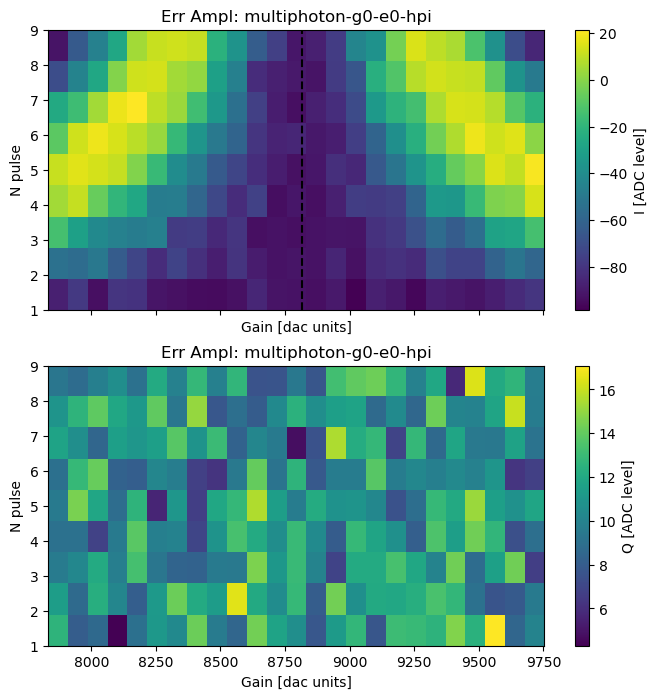

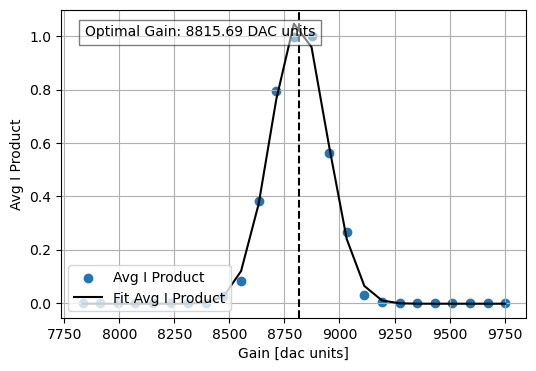

In [51]:
err_amp_pi2_gain.analyze()
err_amp_pi2_gain.display()

In [52]:
print("Qubit hpi gain before update:",expts_base_inst.config_thisrun.device.multiphoton['hpi'][_transition]['gain'][i])
expts_base_inst.config_thisrun.device.multiphoton['hpi'][_transition]['gain'][i] = int(err_amp_pi2_gain.data['fit_avgi'][2])
print("Qubit hpi gain after update:",expts_base_inst.config_thisrun.device.multiphoton['hpi'][_transition]['gain'][i])

Qubit hpi gain before update: 8833
Qubit hpi gain after update: 8815


## Define the sideband we want to calibrate

In [95]:
sideband = 'f3-g4'
_sideband = sideband[0] + 'n' + '-' + sideband[3] + 'n+1'
i = int(sideband[1])
pre_sweep_pulse = mm_base_calib.prep_man_photon(man_no=1, photon_no=i)
print(f"pre_sweep_pulse: {pre_sweep_pulse}")
pre_sweep_pulse.append(['multiphoton', 'g'+str(i)+'-e'+str(i), 'pi', 0])
pre_sweep_pulse.append(['multiphoton', 'e'+str(i)+'-f'+str(i), 'pi', 0])
# pre_sweep_pulse = mm_base_calib.get_prepulse_creator(pre_sweep_pulse, multiphoton_cfg_thisrun).pulse.tolist()
pre_sweep_pulse = mm_base_calib.get_prepulse_creator(pre_sweep_pulse, expts_base_inst.config_thisrun).pulse.tolist()
# print(f"pre_sweep_pulse: {pre_sweep_pulse}")

pre_sweep_pulse: [['multiphoton', 'g0-e0', 'pi', 0], ['multiphoton', 'e0-f0', 'pi', 0], ['multiphoton', 'f0-g1', 'pi', 0], ['multiphoton', 'g1-e1', 'pi', 0], ['multiphoton', 'e1-f1', 'pi', 0], ['multiphoton', 'f1-g2', 'pi', 0], ['multiphoton', 'g2-e2', 'pi', 0], ['multiphoton', 'e2-f2', 'pi', 0], ['multiphoton', 'f2-g3', 'pi', 0]]


### Pulse probe sideband

In [267]:
def do_pulse_probe_any(
    config_thisrun,
    ds_thisrun,
    man_mode_no=1,
    start=2009,
    step=0.01,
    expts=500,
    reps=100,
    rounds=1,
    length=1,
    gain=5000,
    pulse_type='gaussian',
    qubit_f=False,
    qubits=[0],
    prepulse=True,
    pre_sweep_pulse=pre_sweep_pulse,
    relax_delay=200
):
    """
    Run the Pulse Probe F0g1 Spectroscopy experiment with configurable parameters.
    """
    qspec = expts_base_inst.meas.single_qubit.pulse_probe_f0g1_spectroscopy.PulseProbeF0g1SpectroscopyExperiment(
        soccfg=expts_base_inst.soc, path=expts_base_inst.expt_path, prefix='PulseProbeF0g1SpectroscopyExperiment', config_file=expts_base_inst.config_file
    )

    qspec.cfg = AttrDict(deepcopy(config_thisrun))

    if start is None:
        start = ds_thisrun.get_freq('M' + str(man_mode_no)) - 5
    if pre_sweep_pulse is None:
        pre_sweep_pulse = [[3569.4827896982997], [11161], [0], [0], [2], ['g'], [0.035]]

    qspec.cfg.expt = {
        'start': start,
        'step': step,
        'expts': expts,
        'reps': reps,
        'rounds': rounds,
        'length': length,
        'gain': gain,
        'pulse_type': pulse_type,
        'qubit_f': qubit_f,
        'qubits': qubits,
        'prepulse': prepulse,
        'pre_sweep_pulse': pre_sweep_pulse
    }

    qspec.cfg.device.readout.relax_delay = [relax_delay]
    qspec.go(analyze=False, display=False, progress=True, save=True)
    return qspec

def analyze_and_display_pulse_probe_any(qspec):
    from multimode_expts.fit_display_classes import Spectroscopy
    spec_analysis = Spectroscopy(
        qspec.data)
    spec_analysis.analyze(fit=True)
    spec_analysis.display()

In [189]:
man_spec = do_pulse_probe_any(expts_base_inst.config_thisrun,
                                expts_base_inst.ds_thisrun, 
                                man_mode_no = 1, 
                                start = 2009, 
                                step=0.01,
                                expts=500,
                                length=0.8,
                                prepulse = True, pre_sweep_pulse=pre_sweep_pulse)
analyze_and_display_pulse_probe_any(man_spec)

KeyboardInterrupt: 

In [98]:
# print("Transition frequency before update:",  multiphoton_cfg_thisrun.pulses['pi_' + sideband]['frequency'])
# multiphoton_cfg_thisrun.pulses['pi_' + sideband]['frequency'] =  man_spec.data['fit_avgi'][2]
# print('Updated transition frequency to:',  multiphoton_cfg_thisrun.pulses['pi_' + sideband]['frequency'])
print("Transition frequency before update:",  expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['frequency'][i])
expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['frequency'][i] = man_spec.data['fit_avgi'][2]
print('Updated transition frequency to:',  expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['frequency'][i])

Transition frequency before update: 2010.9292508443893
Updated transition frequency to: 2010.9292508443893


### Quick chevron

In [268]:
def do_length_rabi_any_sweep(
    config_thisrun,
    expt_path,
    config_path,
    freq_start,
    freq_stop,
    freq_step,
    start=2,
    step=0.1,
    qubits=[0],
    expts=25,
    reps=100,
    rounds=1,
    gain=8000,
    ramp_sigma=0.005,
    use_arb_waveform=False,
    pi_ge_before=False,
    pi_ef_before=False,
    pi_ge_after=False,
    normalize=False,
    active_reset=False,
    check_man_reset=[False, 0],
    check_man_reset_pi=[],
    prepulse=True,
    postpulse=postpulse,
    pre_sweep_pulse=None,
    post_sweep_pulse=post_pulse,
    err_amp_reps=0
):
    """Run the Length Rabi General F0g1 Experiment Sweep with configurable parameters."""
    from multimode_expts.sequential_experiment_classes import man_f0g1_class
    experiment_class = man_f0g1_class
    sweep_experiment_name = 'length_rabi_f0g1_sweep'
    class_for_exp = experiment_class(
        soccfg=expts_base_inst.soc,
        path=expt_path,
        prefix=sweep_experiment_name,
        config_file=config_path,
        exp_param_file=expts_base_inst.exp_param_file,
        config_thisrun=config_thisrun
    )

    class_for_exp.loaded[sweep_experiment_name] = {
        'freq_start': freq_start,
        'freq_stop': freq_stop,
        'freq_step': freq_step,
        'start': start,
        'step': step,
        'qubits': qubits,
        'expts': expts,
        'reps': reps,
        'rounds': rounds,
        'gain': gain,
        'ramp_sigma': ramp_sigma,
        'use_arb_waveform': use_arb_waveform,
        'pi_ge_before': pi_ge_before,
        'pi_ef_before': pi_ef_before,
        'pi_ge_after': pi_ge_after,
        'normalize': normalize,
        'active_reset': active_reset,
        'check_man_reset': check_man_reset,
        'check_man_reset_pi': check_man_reset_pi,
        'prepulse': prepulse,
        'postpulse': postpulse,
        'post_sweep_pulse': post_pulse,
        'pre_sweep_pulse': pre_sweep_pulse,
        'err_amp_reps': err_amp_reps,
    }
    return eval('class_for_exp.run_sweep')(sweep_experiment_name=sweep_experiment_name)


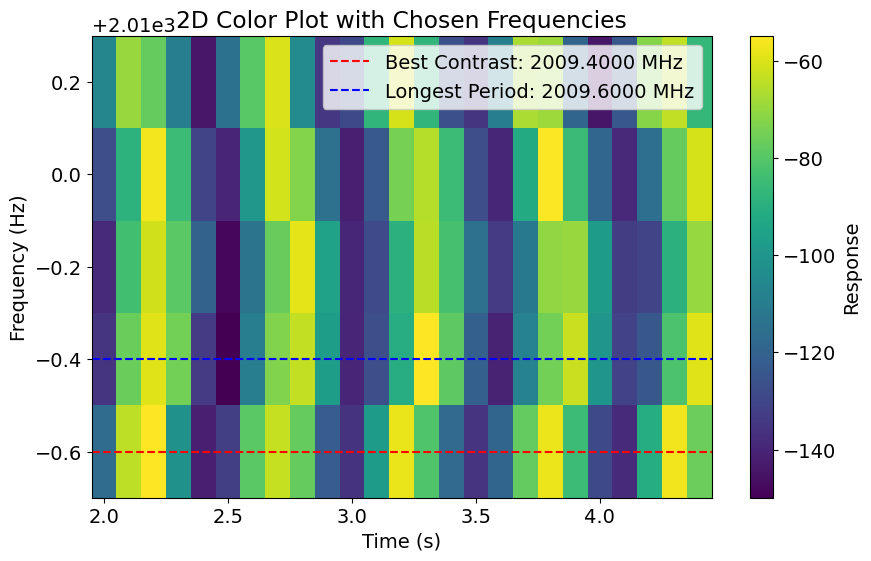

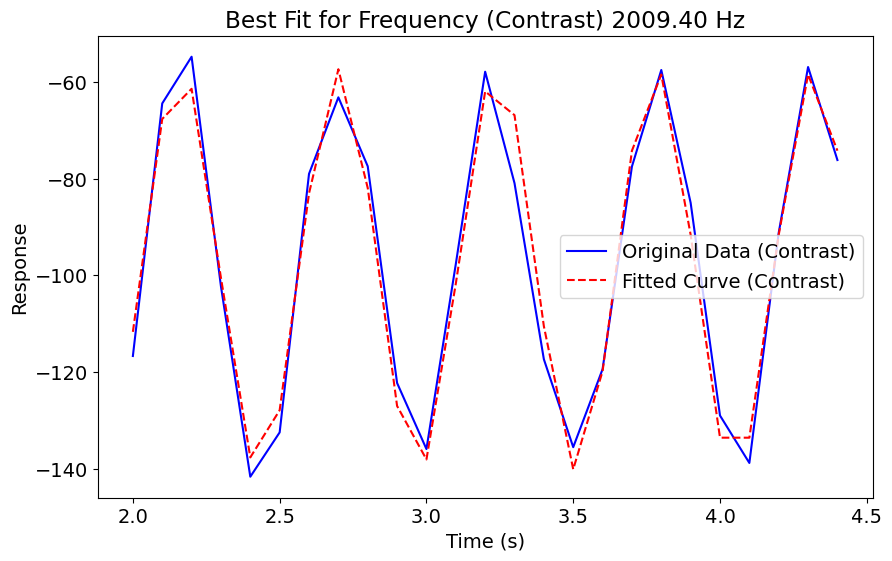

In [269]:
# guess_freq =  multiphoton_cfg_thisrun.pulses['pi_' + sideband]['frequency']
guess_freq = expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['frequency'][i]
freq_start = guess_freq- 0.5
freq_stop = guess_freq + 0.5
# freq_start = guess_freq- 0.1
# freq_stop = guess_freq + 0.1
freq_step = 0.2
man_chevrons = do_length_rabi_any_sweep(expts_base_inst.config_thisrun, expts_base_inst.expt_path, expts_base_inst.config_file, 
                                                freq_start, freq_stop, freq_step,
                                                prepulse = True, 
                                                pre_sweep_pulse= pre_sweep_pulse,
                                                postpulse = postpulse ,
                                                post_sweep_pulse=post_pulse,
                                                )

In [270]:
# print("Transition frequency before update:",  multiphoton_cfg_thisrun.pulses['pi_' + sideband]['frequency'])
# multiphoton_cfg_thisrun.pulses['pi_' + sideband]['frequency'] =  man_chevrons.results['best_frequency_contrast']
# print('Updated transition frequency to:',  multiphoton_cfg_thisrun.pulses['pi_' + sideband]['frequency'])

print("Transition frequency before update:",  expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['frequency'][i])
expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['frequency'][i] = man_chevrons.results['best_frequency_contrast']
print('Updated transition frequency to:',  expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['frequency'][i])

Transition frequency before update: 2009.9
Updated transition frequency to: 2009.4


### Length rabi first round

In [271]:
def do_length_rabi_f0g1_general(
    config_thisrun,
    ds_thisrun,
    expt_path,
    config_path,
    man_mode_no=1,
    start=None,
    step=0.045,
    qubits=[0],
    expts=50,
    reps=100,
    rounds=1,
    gain=8000,
    freq=None,
    use_arb_waveform=False,
    pi_ge_before=False,
    pi_ef_before=False,
    pi_ge_after=False,
    normalize=False,
    active_reset=False,
    man_reset=True,
    stor_reset=True,
    check_man_reset=[False, 0],
    swap_lossy=False,
    check_man_reset_pi=[],
    prepulse=True,
    postpulse=postpulse,
    post_sweep_pulse=None,
    pre_sweep_pulse=None,
    err_amp_reps=0,
    relax_delay=2500
):
    """
    Run the Length Rabi General F0g1 Experiment with all config params as function arguments.
    """
    length_rabi = expts_base_inst.meas.single_qubit.length_rabi_f0g1_general.LengthRabiGeneralF0g1Experiment(
        soccfg=expts_base_inst.soc, path=expt_path, prefix='LengthRabiGeneralF0g1Experiment', config_file=config_path
    )

    length_rabi.cfg = AttrDict(deepcopy(config_thisrun))

    if freq is None:
        freq = ds_thisrun.get_freq('M' + str(man_mode_no))
    if start is None:
        start = expts_base_inst.soc.cycles2us(3)
    if pre_sweep_pulse is None:
        pre_sweep_pulse = []

    length_rabi.cfg.expt = dict(
        start=start,
        step=step,
        qubits=qubits,
        expts=expts,
        reps=reps,
        rounds=rounds,
        gain=gain,
        freq=freq,
        use_arb_waveform=use_arb_waveform,
        pi_ge_before=pi_ge_before,
        pi_ef_before=pi_ef_before,
        pi_ge_after=pi_ge_after,
        normalize=normalize,
        active_reset=active_reset,
        man_reset=man_reset,
        stor_reset=stor_reset,
        check_man_reset=check_man_reset,
        swap_lossy=swap_lossy,
        check_man_reset_pi=check_man_reset_pi,
        prepulse=prepulse,
        pre_sweep_pulse=pre_sweep_pulse,
        postpulse=postpulse,
        post_sweep_pulse= post_sweep_pulse,
        err_amp_reps=err_amp_reps,
    )

    length_rabi.cfg.device.readout.relax_delay = [relax_delay]
    length_rabi.go(analyze=False, display=False, progress=True, save=True)

    from multimode_expts.fit_display_classes import LengthRabiFitting
    length_rabi_analysis = LengthRabiFitting(length_rabi.data, config=length_rabi.cfg)
    length_rabi_analysis.analyze()
    length_rabi_analysis.display(title_str='Length Rabi General F0g1')

    return length_rabi_analysis

  0%|          | 0/50 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00110_LengthRabiGeneralF0g1Experiment.h5
p1: 1.8393387610098262
p2: 97.81461855582491
Pi length: 0.260035147615347
Pi/2 length: 0.12411673753261379
p1: 1.8439916191319619
p2: 92.57420274069268
Pi length: 0.26727314360756826
Pi/2 length: 0.13169769011516863


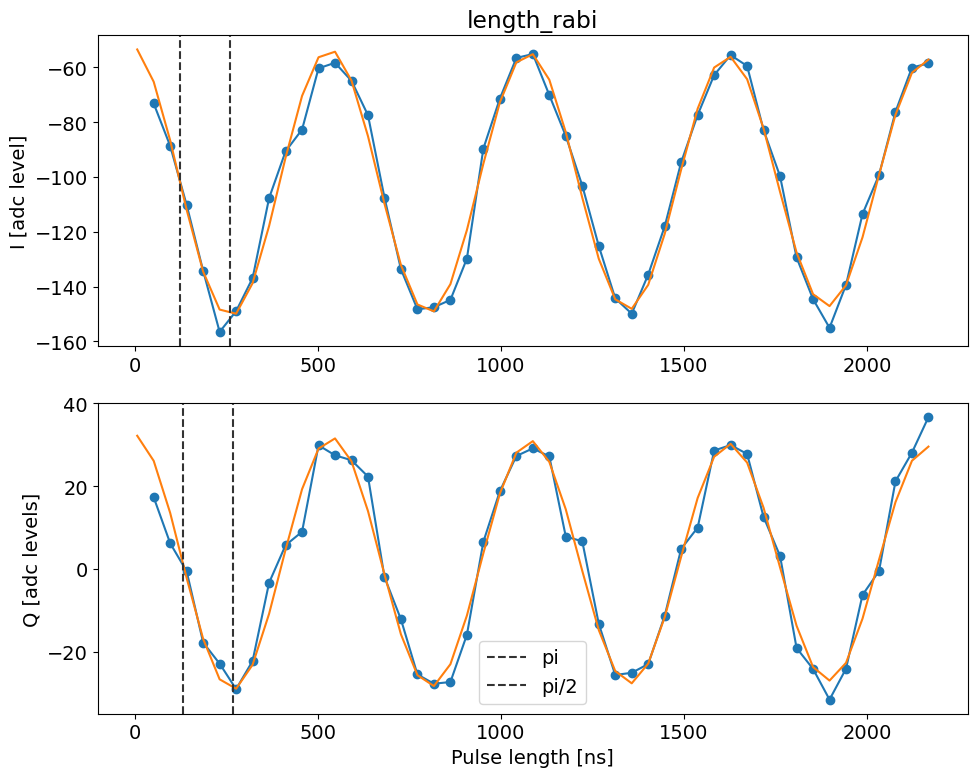

supertitle is  None
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-07-17_11-29-53_Length_Rabi_General_F0g1.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-07-17.md


In [272]:

len_rabis_mans = do_length_rabi_f0g1_general(expts_base_inst.config_thisrun, expts_base_inst.ds_thisrun,
                                              expts_base_inst.expt_path, expts_base_inst.config_file, man_mode_no= 1,
                                            #   freq =  multiphoton_cfg_thisrun.pulses['pi_' + sideband]['frequency'],
                                              freq = expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['frequency'][i],
                                              prepulse=True,pre_sweep_pulse=pre_sweep_pulse, postpulse=postpulse, post_sweep_pulse=post_pulse
                                              )
        

In [274]:
# print("Transition length before update:",  multiphoton_cfg_thisrun.pulses['pi_' + sideband]['length'])
# multiphoton_cfg_thisrun.pulses['pi_' + sideband]['length'] = len_rabis_mans.results['pi_length']
# print('Updated transition length to:',  multiphoton_cfg_thisrun.pulses['pi_' + sideband]['length'])
print("Transition length before update:",  expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['length'][i])
expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['length'][i] = len_rabis_mans.results['pi_length']
print('Updated transition length to:',  expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['length'][i])

Transition length before update: 0.260035147615347
Updated transition length to: 0.260035147615347


### Error amplification

In [96]:
expts = 20
band = 0.75
# band = 0.3
# expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['length'][0] = 0.5491206701698654
freq_start = expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['frequency'][i] - band
# freq_start = 2011 - band
step = 2 * band / expts
print(f'Frequency start: {freq_start}, Step: {step}')

err_amp_man_freq = do_error_amplification(
    config_thisrun=expts_base_inst.config_thisrun,
    expt_path=expts_base_inst.expt_path,
    config_path=expts_base_inst.config_file,
    reps=100,
    rounds=1,
    n_pulses = 7,
    expts=expts,
    start=freq_start,
    step=step,
    pulse_type=['multiphoton', sideband, 'pi', 0],
    parameter_to_test='frequency',
)

Frequency start: 2009.0336365005194, Step: 0.075
{'start': 2, 'step': 0.1, 'qubits': [0], 'expts': 25, 'reps': 300, 'rounds': 1, 'gain': 8000, 'freq': 2011.7147366265876, 'use_arb_waveform': 0, 'pi_ge_before': 0, 'pi_ef_before': 0, 'pi_ge_after': 0, 'pi_ef_after': 0, 'normalize': 0, 'active_reset': 0, 'check_man_reset': [0, 0], 'swap_lossy': 0, 'check_man_reset_pi': [], 'prepulse': 1, 'pre_sweep_pulse': [[3579.4384683413878, 3428.2303438452373, 2011.4000000000008, 3571.9213048825372, 3423.7266366015674], [18962, 2767, 8000, 10566, 9159], [0, 0, 0.5452584298467464, 0, 0], [0, 0, 0, 0, 0], [2, 2, 0, 2, 2], ['gauss', 'gauss', 'flat_top', 'gauss', 'gauss'], [0.007, 0.035, 0.005, 0.035, 0.035]], 'err_amp_reps': 0, 'length_placeholder': 4.4}


  0%|          | 0/6 [00:00<?, ?it/s]

post_pulse: [[3580.3825840728755, 3428.2303438452373, 2011.6658682784348, 3571.5382408986256, 3427.977089804622, 2011.134436736124, 3571.543042357372, 3427.712094472353, 2010.595323987349, 3571.299620008302, 3427.4772366132443], [18554, 2759, 8000, 3456, 2760, 8000, 3449, 2763, 8000, 3430, 2768], [0, 0, 0.5358111825204673, 0, 0, 0.38504166408699336, 0, 0, 0.31584821479967073, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2], ['gauss', 'gauss', 'flat_top', 'gauss', 'gauss', 'flat_top', 'gauss', 'gauss', 'flat_top', 'gauss', 'gauss'], [0.007, 0.035, 0.005, 0.035, 0.035, 0.005, 0.035, 0.035, 0.005, 0.035, 0.035]]
post_pulse: [[3580.3825840728755, 3428.2303438452373, 2011.6658682784348, 3571.5382408986256, 3427.977089804622, 2011.134436736124, 3571.543042357372, 3427.712094472353, 2010.595323987349, 3571.299620008302, 3427.4772366132443], [18554, 2759, 8000, 3456, 2760, 8000, 3449, 2763, 8000, 3430, 2768], [0, 0, 0.5358111825204673, 0, 0, 0.38504166408699336, 0, 

fitparams [0.0006616641570645461, 0.9993383358429354, 2010.0836365005193, 0.14249999999999546]


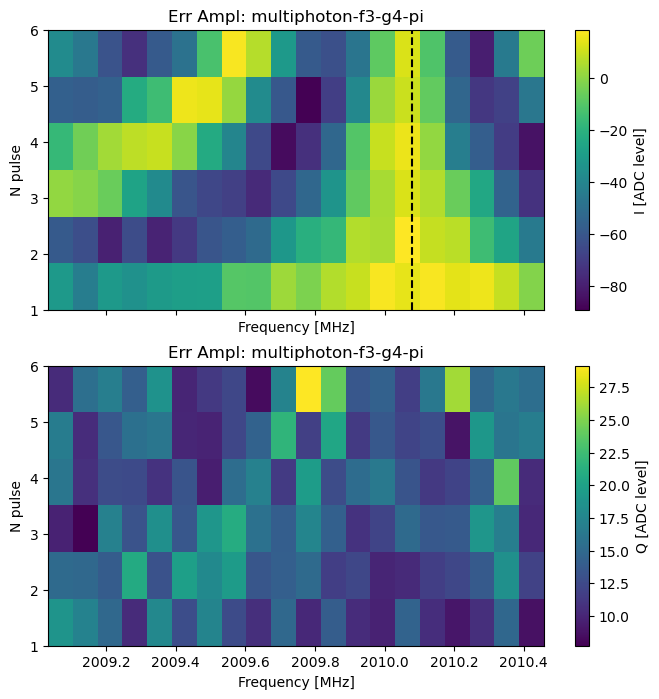

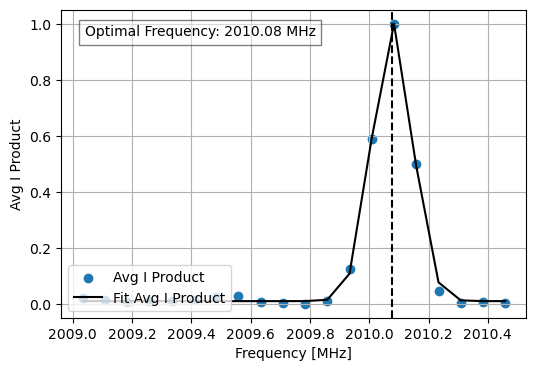

In [97]:
err_amp_man_freq.analyze(state_fin='e')
err_amp_man_freq.display()

In [ ]:
print(f"Man {sideband} pi frequency before update:", expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['frequency'][i])
expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['frequency'][i] = err_amp_man_freq.data['fit_avgi'][2]
print(f"Man {sideband} pi frequency before update:", expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['frequency'][i])

Qubit pi frequency before update: 2009.7836365005194
Qubit pi frequency after update: 2010.07793195468


### Length Rabi

  0%|          | 0/100 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00111_LengthRabiGeneralF0g1Experiment.h5
p1: 1.8229275375457523
p2: 93.87418666208535
Pi length: 0.26838059127779085
Pi/2 length: 0.13123855197513126
p1: 1.8399428308143198
p2: 91.98655131804429
Pi length: 0.2687484597961526
Pi/2 length: 0.13287467295172367


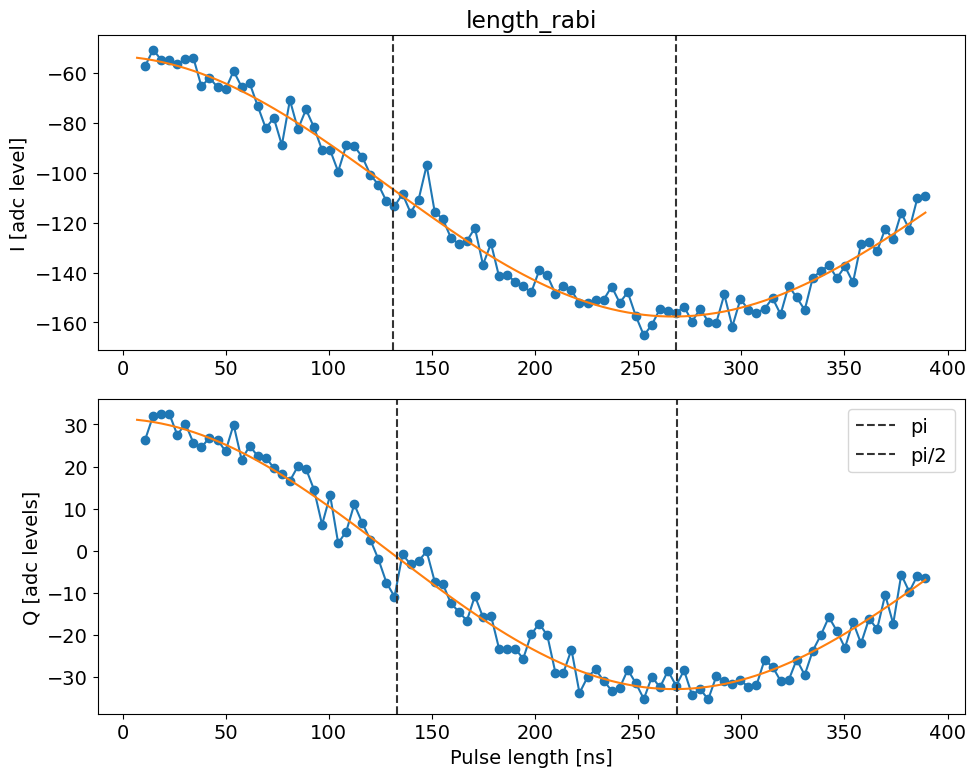

supertitle is  None
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-07-17_11-32-21_Length_Rabi_General_F0g1.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-07-17.md


In [278]:
stop = 1.5 * expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['length'][i]
expts = 100
step = stop / expts


len_rabis_mans = do_length_rabi_f0g1_general(expts_base_inst.config_thisrun, expts_base_inst.ds_thisrun,
                                              expts_base_inst.expt_path, expts_base_inst.config_file, man_mode_no= 1,
                                              step=step, expts=expts,
                                            #   freq =  multiphoton_cfg_thisrun.pulses['pi_' + sideband]['frequency'],
                                              freq = expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['frequency'][i],
                                              prepulse=True,pre_sweep_pulse=pre_sweep_pulse, postpulse=postpulse, post_sweep_pulse=post_pulse
                                              )

In [280]:
# print("Transition length before update:",  multiphoton_cfg_thisrun.pulses['pi_' + sideband]['length'])
# multiphoton_cfg_thisrun.pulses['pi_' + sideband]['length'] = len_rabis_mans.results['pi_length']
# print('Updated transition length to:',  multiphoton_cfg_thisrun.pulses['pi_' + sideband]['length'])
print("Transition length before update:",  expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['length'][i])
expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['length'][i] = len_rabis_mans.results['pi_length']
print('Updated transition length to:',  expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['length'][i])

Transition length before update: 0.26838059127779085
Updated transition length to: 0.26838059127779085


## Single shot
To check broadband pulses and recalibrate phase

In [79]:
def do_single_shot(
    config_thisrun,
    expt_path,
    config_path,
    qubits=[0],
    reps=5000,
    check_f=False,
    active_reset=True,
    man_reset=False,
    storage_reset=False,
    qubit=0,
    pulse_manipulate=False,
    cavity_freq=4984.373226159381,
    cavity_gain=800,
    cavity_length=2,
    prepulse=False,
    pre_sweep_pulse=None,
    gate_based=True,
    relax_delay=250
):
    """Run the single shot experiment with configurable parameters."""

   
    hstgrm = expts_base_inst.meas.single_qubit.single_shot.HistogramExperiment(
        soccfg=expts_base_inst.soc, path=expt_path, prefix='HistogramExperiment', config_file=config_path
    )

    hstgrm.cfg = AttrDict(deepcopy(config_thisrun))

    hstgrm.cfg.expt = {
        'qubits': qubits,
        'reps': reps,
        'check_f': check_f,
        'active_reset': active_reset,
        'man_reset': man_reset,
        'storage_reset': storage_reset,
        'qubit': qubit,
        'pulse_manipulate': pulse_manipulate,
        'cavity_freq': cavity_freq,
        'cavity_gain': cavity_gain,
        'cavity_length': cavity_length,
        'prepulse': prepulse,
        'pre_sweep_pulse': pre_sweep_pulse,
        'gate_based': gate_based,
    }

    hstgrm.cfg.device.readout.relax_delay = [relax_delay]  # Wait time between experiments [us]
    hstgrm.go(analyze=False, display=False, progress=True, save=True)
    from multimode_expts.fit_display_classes import Histogram
    
    hist_analysis = Histogram(
            hstgrm.data, verbose=True, threshold=None, config=hstgrm.cfg,
        )
    return hstgrm, hist_analysis


def update_single_shot(hist_analysis, config_thisrun):
    """Update the configuration based on single shot experiment results."""
    
    hist_analysis.analyze(plot = True)
    fids = hist_analysis.results['fids']
    confusion_matrix = hist_analysis.results['confusion_matrix']
    thresholds_new = hist_analysis.results['thresholds']
    angle = hist_analysis.results['angle']
    print(fids)

    config_thisrun.device.readout.phase = [config_thisrun.device.readout.phase[0] + angle]
    config_thisrun.device.readout.threshold = thresholds_new
    config_thisrun.device.readout.threshold_list = [thresholds_new]
    config_thisrun.device.readout.Ie = np.median(hist_analysis.data['Ie_rot'])
    config_thisrun.device.readout.Ig = np.median(hist_analysis.data['Ig_rot'])
    if hist_analysis.cfg.expt.active_reset:
        config_thisrun.device.readout.confusion_matrix_with_active_reset = confusion_matrix
    else:
        config_thisrun.device.readout.confusion_matrix_without_reset = confusion_matrix
    print('Updated readout!')

In [28]:
# freq_AC = expts_base_inst.config_thisrun.device.manipulate.revival_stark_shift[0]
# revival_time = expts_base_inst.config_thisrun.device.manipulate.revival_time[0]
# theta_2 = 0 + 2*np.pi*freq_AC * revival_time * 180/np.pi
# theta_2 = theta_2 % 360

parity_str = [['multiphoton', 'g0-e0', 'pi', 0],
              ['multiphoton', 'e0-f0', 'pi', 0],
              ['multiphoton', 'f0-g1', 'pi', 0],
              ['multiphoton', 'g1-e1', 'pi', 0],
              ['multiphoton', 'e1-f1', 'pi', 0],
              ['multiphoton', 'f1-g2', 'pi', 0],
              ['multiphoton', 'g2-e2', 'pi', 0],
              ['multiphoton', 'e2-f2', 'pi', 0],
              ['multiphoton', 'f2-g3', 'pi', 0],
            #   ['multiphoton', 'g3-e3', 'pi', 0],
            #   ['multiphoton', 'e3-f3', 'pi', 0],
            #   ['multiphoton', 'f3-g4', 'pi', 0],
            #   ['multiphoton', 'g0-e0', 'hpi', 0],
            #   ['multiphoton', 'g0-e0', 'hpi', 180]
              ]

# parity_str = [['qubit', 'ge', 'hpi', 0],
#         ['qubit', 'ge', 'hpi', 180]]

In [29]:
hstgrm = do_single_shot(config_thisrun=expts_base_inst.config_thisrun,expt_path=expts_base_inst.expt_path,config_path=expts_base_inst.config_file, 
                        reps = 5000, active_reset=False,
                        prepulse=False,
                        gate_based=True,
                        pre_sweep_pulse=parity_str,
                        relax_delay = 2500)

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00178_HistogramExperiment.h5
{'device': {'qubit': {'T1': [486.46448644846816], 'f_ge': [3571.6994214615424], 'f_ef': [3428.4457610447353], 'ramp_sigma': [0.005], 'ramp_sigma_num': [3.0], 'pulses': {'pi_ge': {'gain': [3429], 'sigma': [0.035], 'length': [0.0], 'type': ['gauss']}, 'hpi_ge': {'gain': [1655], 'length': [0.0], 'sigma': [0.035], 'type': ['gauss']}, 'pi_ef': {'gain': [2770], 'length': [0.0], 'sigma': [0.035], 'type': ['gauss']}, 'hpi_ef': {'gain': [1318], 'sigma': [0.035], 'type': ['gauss']}}, 'T1_ef': [144.16571854782674]}, 'readout': {'trig_offset': [450], 'frequency': [749.0683556354792], 'gain': [800], 'phase': [-84.71479445079655], 'threshold': [-40.26385339368932], 'threshold_list': [[-40.26385339368932]], 'man1_drive_list': [0.0], 'man2_drive_list': [0.0], 'readout_length': [1.5], 'relax_delay': [2500], 'confusion_matrix_with_reset': [0.9964530022802125, 0.0035469977197875036, 0.013768302080657598, 0.98

Unrotated:
Ig 66.69913419913419 +/- 32.47460578703553 	 Qg 66.89285714285714 +/- 34.23759806230984 	 Amp g 94.46390231008247
Ie 1.5898268398268398 +/- 33.596034905380186 	 Qe -21.25865800865801 +/- 35.294456070429625 	 Amp e 21.31802265008913
updating temp data
Rotated:
Ig -93.79288583654709 +/- 35.52530239846207 	 Qg 13.795926927993333 +/- 31.060683051044922 	 Amp g 94.80207293804332
Ie 16.829338123619216 +/- 37.68394102043531 	 Qe 13.705548712499795 +/- 30.891953318612973 	 Amp e 21.704116825842235


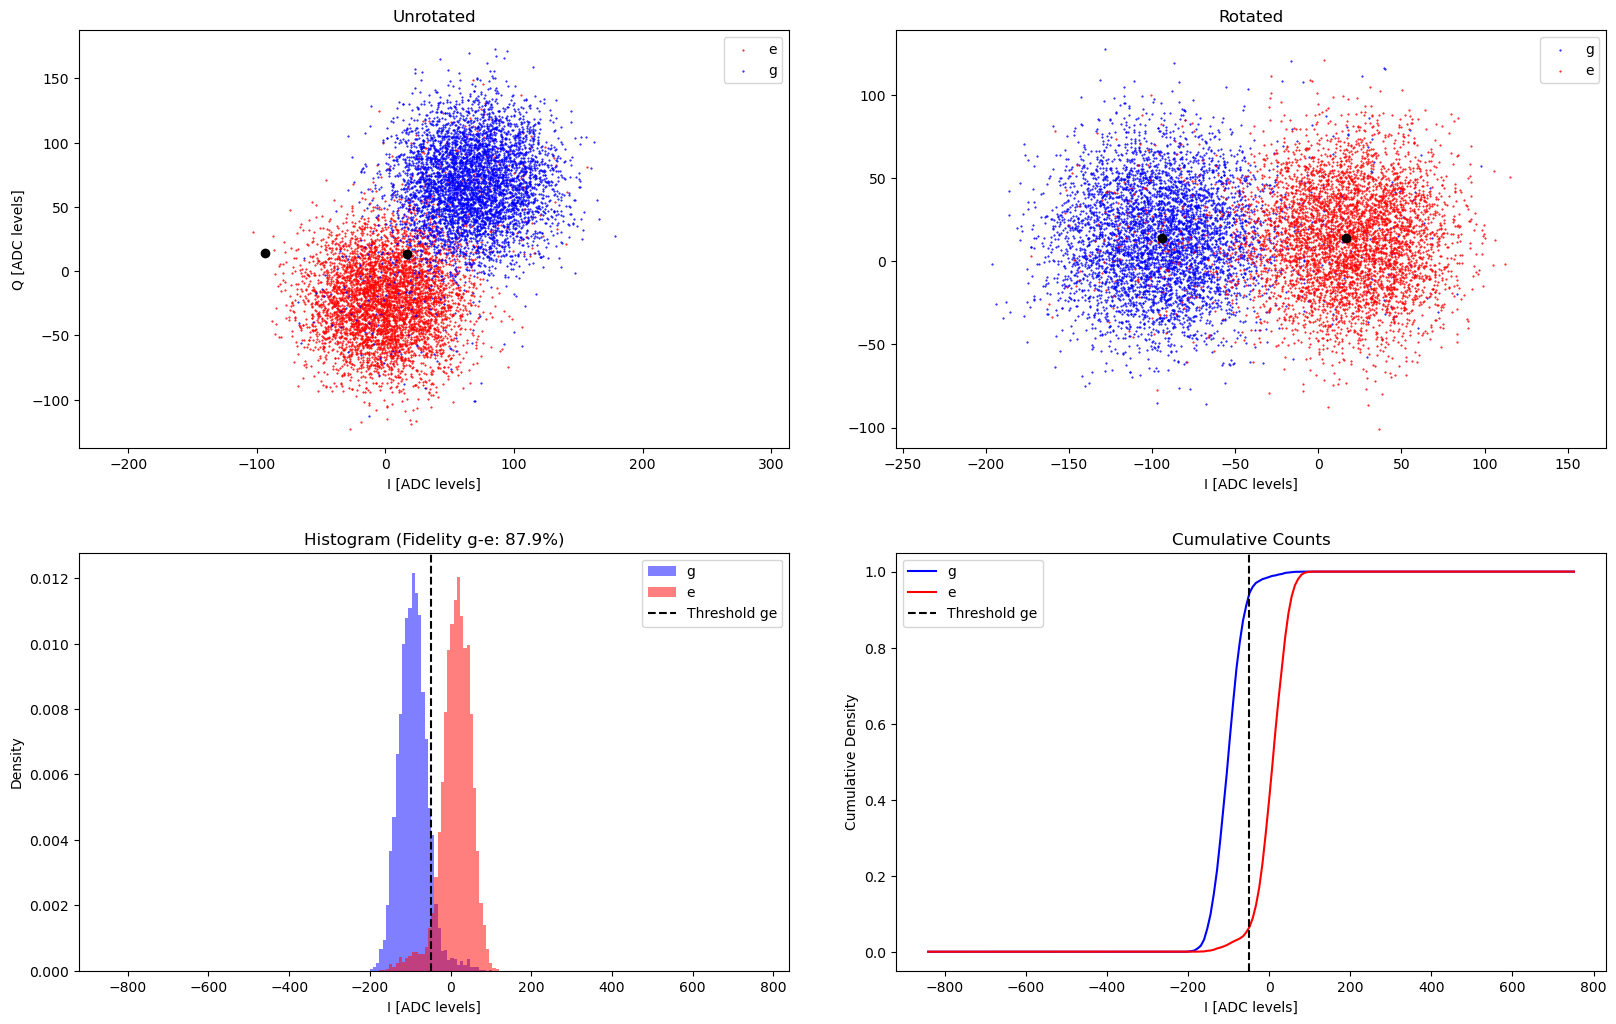

supertitle is  None
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-07-22_14-53-30_histogram.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-07-22.md


In [32]:
hstgrm[1].analyze(plot = True)

Unrotated:
Ig -162.46320346320346 +/- 29.127006427634477 	 Qg -21.9512987012987 +/- 23.836288279164005 	 Amp g 163.9394766192691
Ie -46.3517316017316 +/- 31.4340526726622 	 Qe -20.932900432900432 +/- 23.175761176693342 	 Amp e 50.85930930530503
updating temp data
Rotated:
Ig -162.7235526469161 +/- 29.13582762913487 	 Qg -20.577405445089724 +/- 23.82550504665562 	 Amp g 164.01946287220088
Ie -46.47586975546049 +/- 31.43995438115376 	 Qe -20.574699956752184 +/- 23.167754359406494 	 Amp e 50.826417814330625


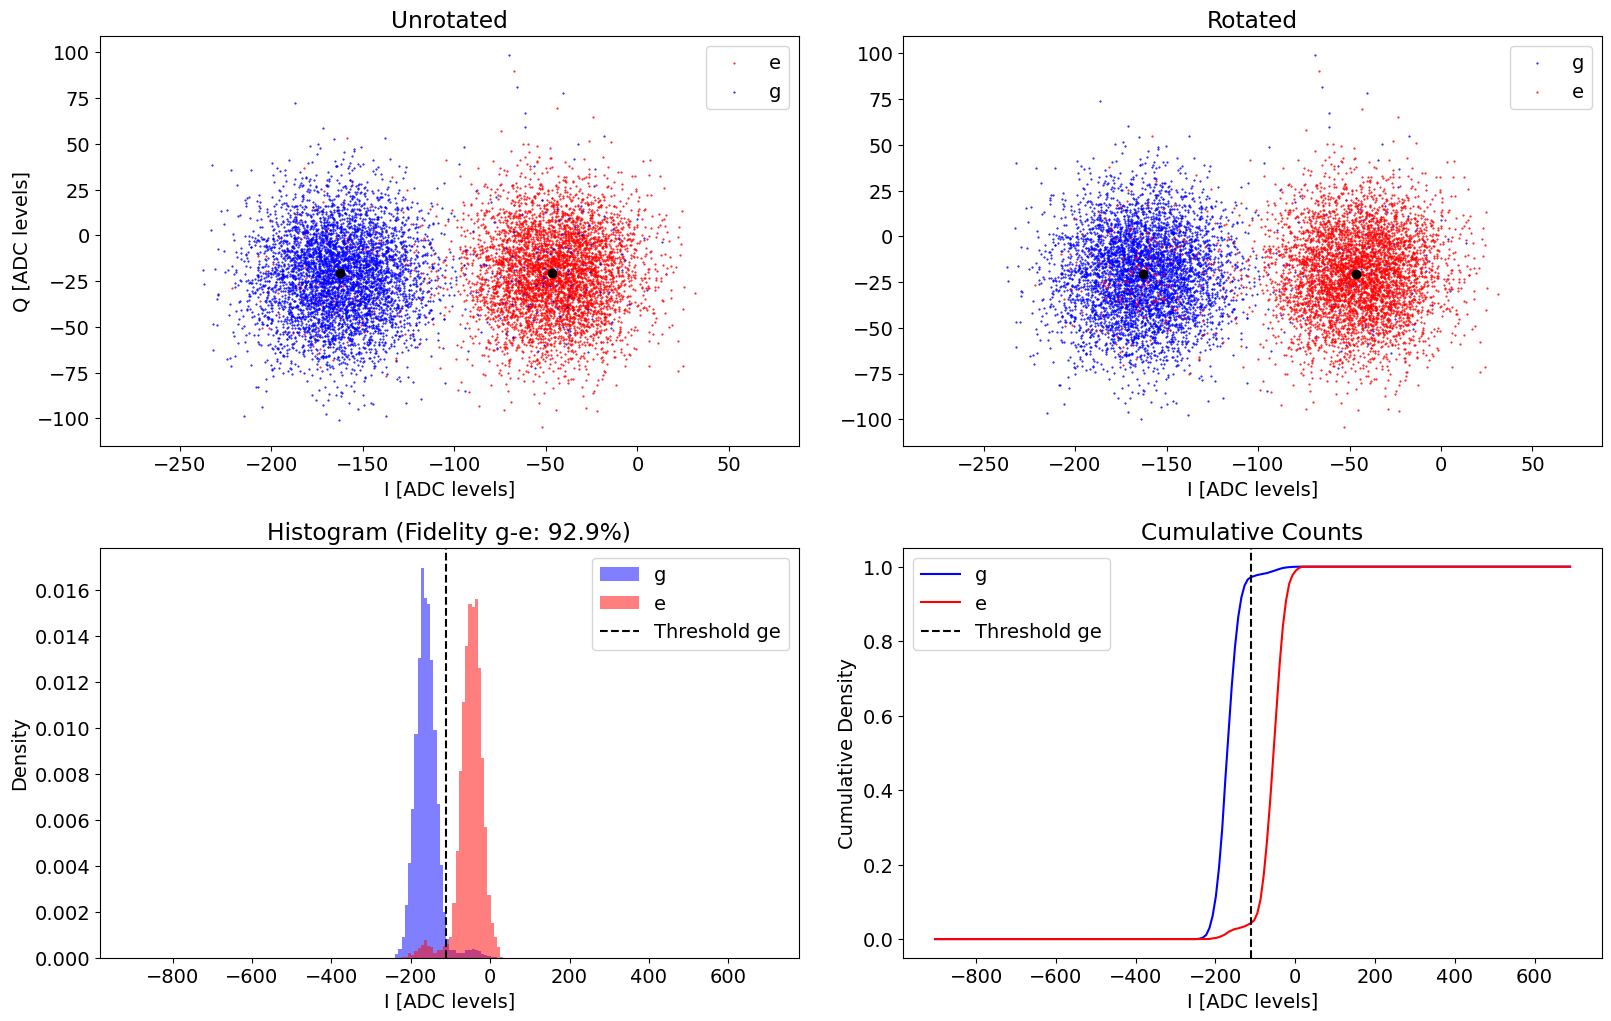

supertitle is  None
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-07-18_09-11-10_histogram.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-07-18.md
[0.9288]
Updated readout!
Single shot done!


In [752]:
update_single_shot(hstgrm[1], expts_base_inst.config_thisrun)
print('Single shot done!')

## Photon Number Resolved  Spectroscopy

This is used to check that the fock states are well prepared before we do the tomography

In [655]:
def do_pulse_probe(
    config_thisrun, 
    start=3560,  # [MHz]
    step=0.1,  # min step ~1 MHz
    expts=200,  # Number of experiments stepping from start
    reps=2000,  # Number of averages per point
    rounds=1,  # Number of start to finish sweeps to average over
    length=1,  # Qubit probe constant pulse length [us]
    gain=400,  # Qubit pulse gain
    sigma=0.1,  # Qubit flat top sigma
    qubit=0,
    prepulse=False,
    pre_sweep_pulse=[],
    gate_based=False,
    relax_delay=250,  # Wait time between experiments [us]
    ): 
    qspec = expts_base_inst.meas.single_qubit.pulse_probe_spectroscopy.PulseProbeSpectroscopyExperiment(
        soccfg=expts_base_inst.soc, path=expts_base_inst.expt_path, prefix='PulseProbeSpectroscopyExperiment', 
        config_file=expts_base_inst.config_file
    )

    qspec.cfg = AttrDict(deepcopy(config_thisrun))

    qspec.cfg.expt = dict(
        qubits = [0],
        start=start,
        step=step,
        expts=expts,
        reps=reps,
        rounds=rounds,
        length=length,
        gain=gain,
        sigma=sigma,
        qubit=qubit,
        prepulse = prepulse, 
        pre_sweep_pulse = pre_sweep_pulse,
        gate_based = gate_based,
    )

    qspec.cfg.device.readout.relax_delay = [relax_delay] # Wait time between experiments [us]
    qspec.go(analyze=True, display=True, progress=True, save=True)
    return qspec

In [666]:
pre_sweep_pulse = mm_base_calib.prep_man_photon(man_no=1, photon_no=1)
# pre_sweep_pulse = mm_base_calib.get_prepulse_creator(pre_sweep_pulse, multiphoton_cfg_thisrun).pulse.tolist()
pre_sweep_pulse = mm_base_calib.get_prepulse_creator(pre_sweep_pulse, expts_base_inst.config_thisrun).pulse.tolist()
print(f"pre_sweep_pulse: {pre_sweep_pulse}")

pre_sweep_pulse: [[3579.9600164369886, 3428.2303438452373, 2011.3740763005724], [18768, 2759, 8000], [0, 0, 0.5358111825204673], [0, 0, 0], [2, 2, 0], ['gauss', 'gauss', 'flat_top'], [0.007, 0.035, 0.005]]


pulssing on channel:  2
qubit register page: 1, frequency register: 22


  0%|          | 0/4000 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00154_PulseProbeSpectroscopyExperiment.h5
Found peak in amps at [MHz] 3571.4281784781083, HWHM 0.24396216095598283
Found peak in I at [MHz] 3571.42679808881, HWHM 0.24400641681382323
Found peak in Q at [MHz] 3570.7139823572134, HWHM 1.2302215157808964


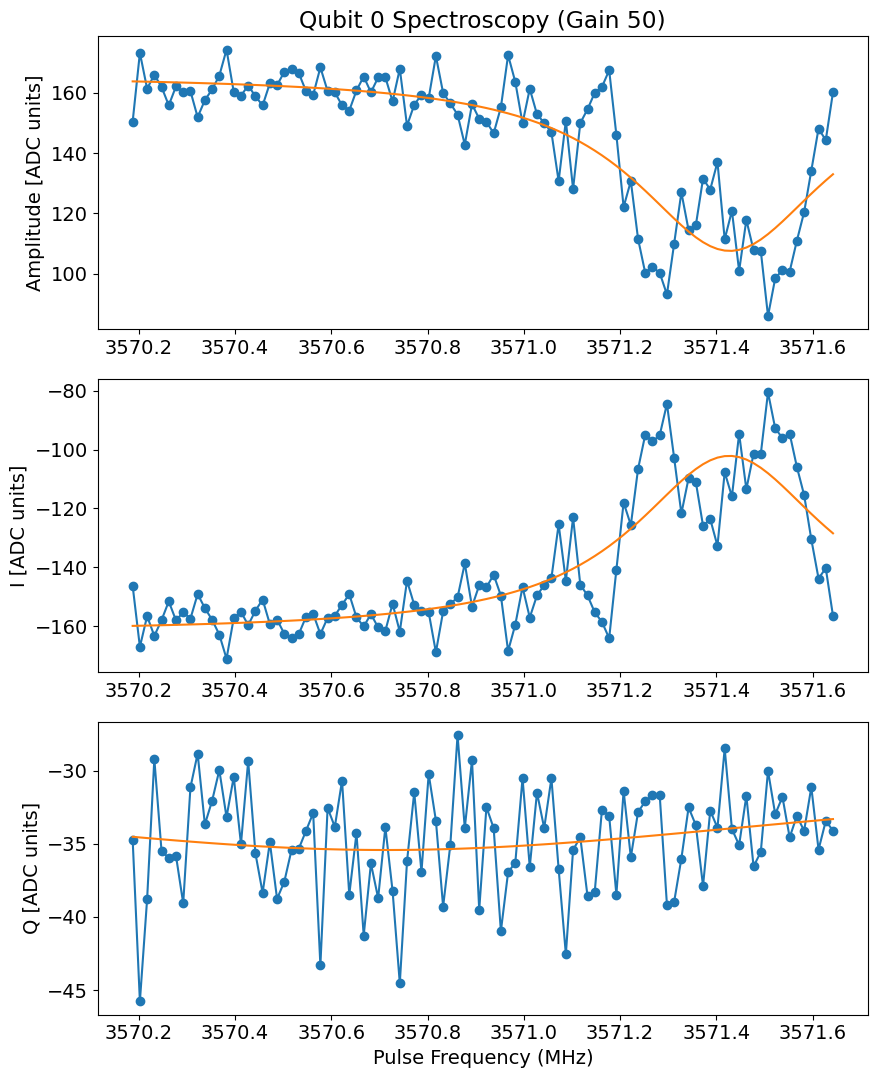

In [668]:
qspec= do_pulse_probe(
    config_thisrun=expts_base_inst.config_thisrun,
    start=expts_base_inst.config_thisrun.device.qubit.f_ge[0]-1.5,  # [MHz]
    step=0.015,  # min step ~1 MHz
    expts=100,  # Number of experiments stepping from start
    reps=20*2,  # Number of averages per point
    rounds=1,  # Number of start to finish sweeps to average over
    length=6.3,  # Qubit probe constant pulse length [us]
    gain=50,  # Qubit pulse gain
    sigma=0.1,  # Qubit flat top sigma
    qubit=0,
    prepulse=True,
    pre_sweep_pulse=pre_sweep_pulse,
    gate_based=False,
    relax_delay=8000  # Wait time between experiments [us]
)

# Setting up the Wigner tomography

## Parity Delay

In [796]:
def do_parity_delay(
    config_thisrun,
    expt_path,
    config_path,
    start=0.01,
    step=0.05,
    expts=50,
    reps=250,
    rounds=1,
    qubits=[0],
    prepulse=True,
    parity_fast=True,
    normalize=False,
    active_reset=False,
    man_reset=True,
    gate_based=False,
    storage_reset=True,
    pre_sweep_pulse=[],
    man_mode_no=1,
    relax_delay=2500
):

    pre_sweep_pulse = mm_base_calib.prep_man_photon(man_no=0, photon_no=4)
    pre_sweep_pulse = mm_base_calib.get_prepulse_creator(pre_sweep_pulse, expts_base_inst.config_thisrun).pulse.tolist()
    expt_cfg = {
        'start': start,
        'step': step,
        'expts': expts,
        'reps': reps,
        'rounds': rounds,
        'qubits': qubits,
        'prepulse': prepulse,
        'normalize': normalize,
        'active_reset': active_reset,
        'parity_fast': parity_fast,
        'man_reset': man_reset,
        'gate_based': gate_based,
        'storage_reset': storage_reset,
        'pre_sweep_pulse': pre_sweep_pulse,
    }
    # print("expt_path:", expt_path)
    # print("config_path:", config_path)
    
    
    parity_delay_exp = expts_base_inst.meas.single_qubit.parity_delay.ParityDelayExperiment(
        soccfg=expts_base_inst.soc, path=expt_path, prefix='ParityDelayExperiment', config_file=config_path
    )
    parity_delay_exp.cfg = AttrDict(deepcopy(config_thisrun))
    parity_delay_exp.cfg.expt = expt_cfg
    parity_delay_exp.cfg.device.readout.relax_delay = [relax_delay] 
    parity_delay_exp.go(analyze=False, display=False, progress=True, save=True)
    return parity_delay_exp


In [797]:
parity_delay_exp = do_parity_delay(
    config_thisrun=expts_base_inst.config_thisrun,
    expt_path=expts_base_inst.expt_path,
    parity_fast=True,
    config_path=expts_base_inst.config_file)

  0%|          | 0/50 [00:00<?, ?it/s]

theta_2: 175.2711480219824 degrees
theta_2: 151.6268881318944 degrees
theta_2: 127.9826282418064 degrees
theta_2: 104.33836835171837 degrees
theta_2: 80.69410846163039 degrees
theta_2: 57.049848571542356 degrees
theta_2: 33.40558868145436 degrees
theta_2: 9.761328791366338 degrees
theta_2: 346.11706890127834 degrees
theta_2: 322.4728090111904 degrees
theta_2: 298.82854912110236 degrees
theta_2: 275.1842892310143 degrees
theta_2: 251.5400293409263 degrees
theta_2: 227.89576945083837 degrees
theta_2: 204.25150956075032 degrees
theta_2: 180.60724967066244 degrees
theta_2: 156.96298978057428 degrees
theta_2: 133.31872989048634 degrees
theta_2: 109.67447000039829 degrees
theta_2: 86.03021011031029 degrees
theta_2: 62.385950220222355 degrees
theta_2: 38.741690330134304 degrees
theta_2: 15.09743044004631 degrees
theta_2: 351.45317054995826 degrees
theta_2: 327.8089106598702 degrees
theta_2: 304.1646507697824 degrees
theta_2: 280.52039087969433 degrees
theta_2: 256.8761309896063 degrees
theta_

p1: 1.1874076459924536
p2: -77.4972128598726
Pi length: 0.3918368197241887
Pi/2 length: 0.18129412965160951
p1: 3.2948286824284474
p2: 90.45258550695236
Pi length: 0.15137139624165405
Pi/2 length: 0.0754949170385721


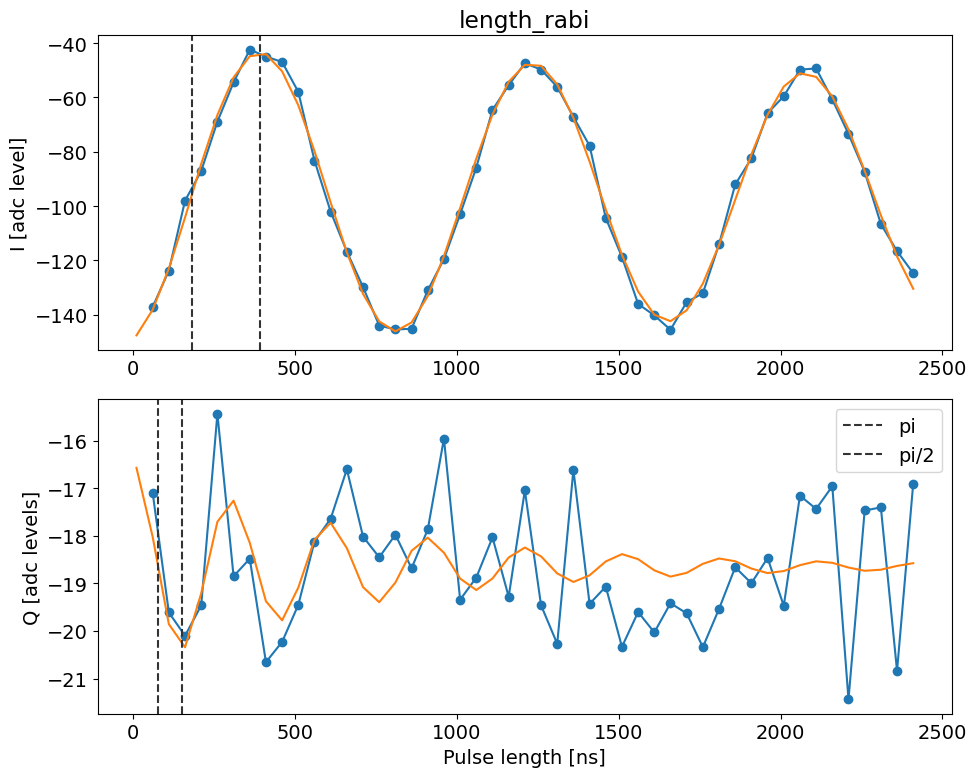

supertitle is  None
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-07-18_09-40-41_Length_Rabi_General_F0g1.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-07-18.md
-42.39829437229437 -145.4923376623377


In [798]:
from multimode_expts.fit_display_classes import LengthRabiFitting
# Analyze the data
length_rabi_analysis = LengthRabiFitting(parity_delay_exp.data, config = parity_delay_exp.cfg)
# length_rabi_analysis.analyze(fitparams = [100, 0.05, -500, None, None, None])
length_rabi_analysis.analyze()
length_rabi_analysis.display(title_str='Length Rabi General F0g1')
print(np.max(parity_delay_exp.data['avgi']), np.min(parity_delay_exp.data['avgi']))

In [ ]:
# freq = length_rabi_analysis.data['fit_avgi'][1]
# print('AC Stark frequency:', freq)
# # expts_base_inst.config_thisrun.device.manipulate.revival_stark_shift[0] = 3579.4384683413878 - 3571.672429380876
# expts_base_inst.config_thisrun.device.manipulate.revival_stark_shift[0] = -freq

AC Stark frequency: 1.313569993893778


In [477]:
## Assign to config 
expts_base_inst.config_thisrun.device.manipulate.revival_time[0] = length_rabi_analysis.results['pi_length']
# expts_base_inst.config_thisrun.device.manipulate.revival_time[0] = 1.584663918482869

In [478]:
expts_base_inst.config_thisrun.device.manipulate.revival_time[0]

1.6383629929445498

## Manipulate Parity Spectroscopy

In [299]:
def do_parity_freq_experiment(
    start=4960,
    stop=5020,
    step=0.10,
    reps=500,
    rounds=1,
    qubit=[0],
    normalize=False,
    single_shot=False,
    singleshot_reps=10000,
    span=20,
    manipulate_no=1,
    displace=(True, 0.1, 1000),
    const_pulse=(False, 1),
    f0g1_cavity=0,
    prepulse=False,
    pre_sweep_pulse=None,
    relax_delay=2500
):
    """
    Run the Parity Frequency Experiment with configurable parameters.
    """
    
    expt_cfg = {
        'start': start,
        'stop': stop,
        'step': step,
        'reps': reps,
        'rounds': rounds,
        'qubits': qubit,
        'normalize': normalize,
        'single_shot': single_shot,
        'singleshot_reps': singleshot_reps,
        'span': span,
        'manipulate': manipulate_no,
        'displace': list(displace),
        'const_pulse': list(const_pulse),
        'f0g1_cavity': f0g1_cavity,
        'prepulse': prepulse,
        'pre_sweep_pulse': pre_sweep_pulse
    }
    # Example usage of relax_delay in experiment config:
    parity_freq_exp = expts_base_inst.meas.single_qubit.parity_freq.ParityFreqExperiment(
        soccfg=expts_base_inst.soc, path=expts_base_inst.expt_path, 
        prefix='ParityFreqExperiment', config_file=expts_base_inst.config_file
    )
    parity_freq_exp.cfg = AttrDict(deepcopy(expts_base_inst.config_thisrun))
    parity_freq_exp.cfg.expt = expt_cfg
    parity_freq_exp.cfg.device.readout.relax_delay = [relax_delay]
    parity_freq_exp.go(analyze=False, display=False, progress=True, save=True)
    return parity_freq_exp


In [563]:
parity_freq_exp = do_parity_freq_experiment()

  0%|          | 0/600 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00016_ParityFreqExperiment.h5


Found peak in amps at [MHz] 4985.028775197992, HWHM 1.6711539154782773
Found peak in I at [MHz] 4985.058525893208, HWHM 1.7151612703152272
Found peak in Q at [MHz] 4976.302454143664, HWHM -1.3071762523986217


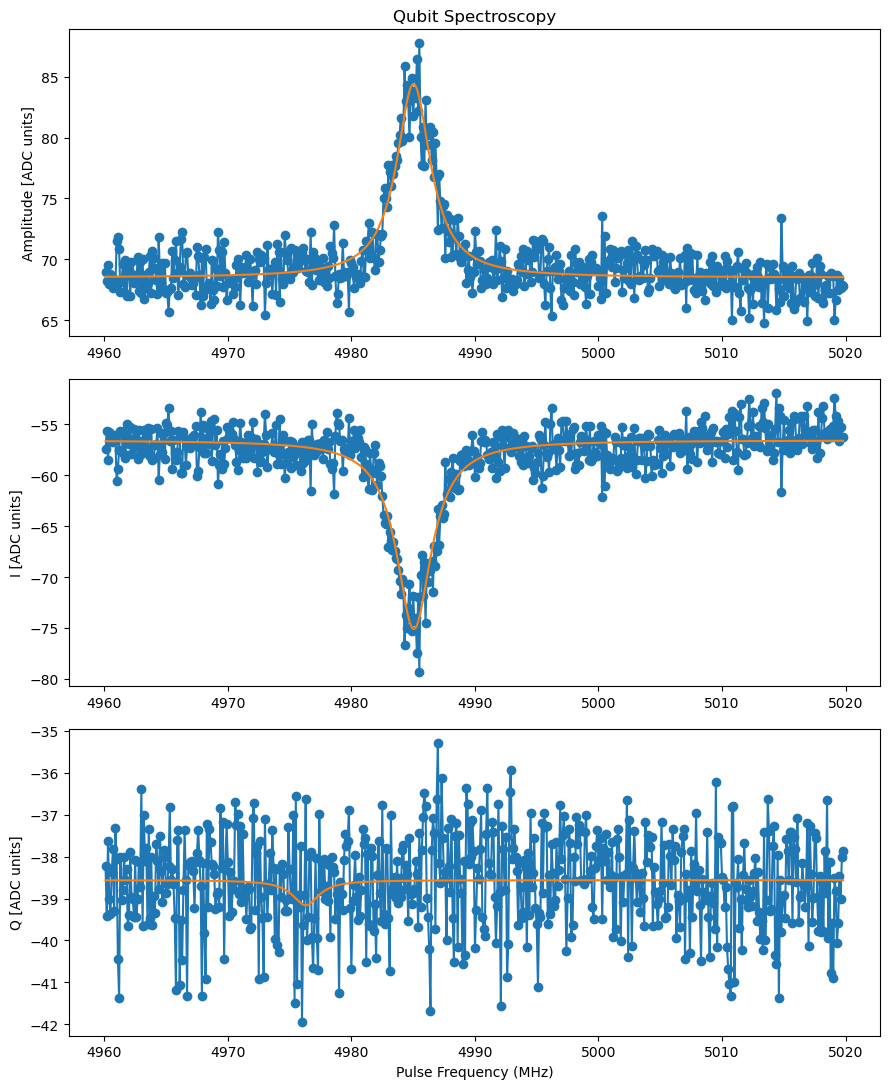

In [564]:
from fit_display_classes import Spectroscopy
spec = Spectroscopy(parity_freq_exp.data, config=parity_freq_exp.cfg)
spec.analyze()
spec.display()

In [565]:
spec.data['fit_avgi'][2]

4985.058525893208

In [566]:
expts_base_inst.config_thisrun.device.manipulate.f_ge[0] = spec.data['fit_avgi'][2]

## Manipulate SPectroscopy (Abandoned)

In [ ]:
def do_cavity_spectroscopy(
    config_thisrun,
    expt_path,
    config_path,
    start=4975,
    step=0.01,
    expts=2000,
    reps=100,
    pulse_e=False,
    pulse_f=False,
    cavity_name='manipulate',
    drive_gain=500,
    qubit=0,
    RF_modulation=[False, 1055, 5000, 'high'],
    relax_delay=200
):
    """Run the Cavity Spectroscopy experiment with configurable parameters."""
    expt_cfg = {
        'start': start,
        'step': step,
        'expts': expts,
        'reps': reps,
        'pulse_e': pulse_e,
        'pulse_f': pulse_f,
        'cavity_name': cavity_name,
        'drive_gain': drive_gain,
        'qubit': qubit,
        'RF_modulation': RF_modulation
    }
    cavity_spec_exp = expts_base_inst.meas.single_qubit.cavity_spectroscopy.CavitySpectroscopyExperiment(
        soccfg=expts_base_inst.soc, path=expt_path, prefix='CavitySpectroscopyExperiment', config_file=config_path
    )
    cavity_spec_exp.cfg = AttrDict(deepcopy(config_thisrun))
    cavity_spec_exp.cfg.expt = expt_cfg
    cavity_spec_exp.cfg.device.readout.relax_delay = [relax_delay]
    cavity_spec_exp.go(analyze=False, display=False, progress=True, save=True)
    return cavity_spec_exp


def update_res_spec(rspec, config_thisrun):
    config_thisrun.device.manipulate.f_ge[0] = [rspec.data['fit'][0]]
    print('Updated man_freq frequency!')

In [ ]:
cav_spec = do_cavity_spectroscopy(
    config_thisrun=expts_base_inst.config_thisrun,
    expt_path=expts_base_inst.expt_path,
    config_path=expts_base_inst.config_file,
    start=4980,
    step=0.01,
    expts=2000,
    reps=100,
    drive_gain=500,
    pulse_e=False,
    pulse_f=False)

  0%|          | 0/2000 [00:00<?, ?it/s]

generator 3 doesn't have a digital mixer, but mixer_freq was defined
ro_ch was defined for generator 3, but it's not multiplexed and doesn't have a mixer, so it will do nothing
generator 2 doesn't have a digital mixer, but mixer_freq was defined
generator 1 doesn't have a digital mixer, but mixer_freq was defined
ro_ch was defined for generator 1, but it's not multiplexed and doesn't have a mixer, so it will do nothing
generator 3 doesn't have a digital mixer, but mixer_freq was defined
ro_ch was defined for generator 3, but it's not multiplexed and doesn't have a mixer, so it will do nothing
generator 2 doesn't have a digital mixer, but mixer_freq was defined
generator 1 doesn't have a digital mixer, but mixer_freq was defined
ro_ch was defined for generator 1, but it's not multiplexed and doesn't have a mixer, so it will do nothing
generator 3 doesn't have a digital mixer, but mixer_freq was defined
ro_ch was defined for generator 3, but it's not multiplexed and doesn't have a mixer,

Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00004_CavitySpectroscopyExperiment.h5


Found peak in amps at [MHz] 4997.298904820421, HWHM 3.148540247056339
Found peak in I at [MHz] 4997.009158894696, HWHM 0.013512330957129719
Found peak in Q at [MHz] 4995.719807747144, HWHM -0.226182560741961


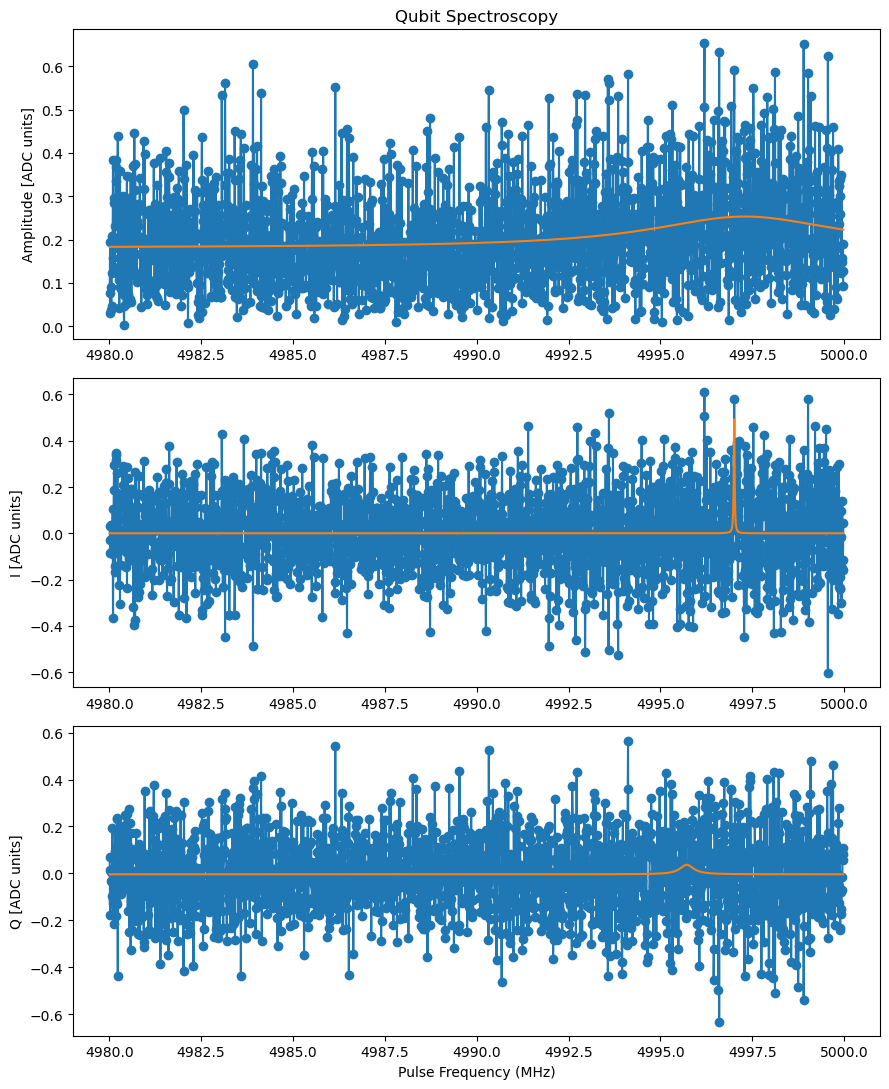

In [ ]:
from fit_display_classes import Spectroscopy
spec = Spectroscopy(cav_spec.data, config=cav_spec.cfg)
spec.analyze()
spec.display()

## Manipulate Ramsey (to finetune frequency)
- This will use displace pulse instead do qubit pi/2 to calibrate; we want fine calibration of manipulate frequency not some fast way of extracting T2 time or finding stark shift on f0g1 transition
- Make sure displacements are small $(\alpha \approx 0.2)$
- Somehow i don't get full contrast, like the lowst i,q value dont correspond to g 




In [640]:
def do_cavity_ramsey(
    config_thisrun,
    expt_path,
    config_path,
    start=0.01,           # start delay
    step=0.05,            # step size
    expts=200,            # number of experiments
    ramsey_freq=3.7,      # Ramsey frequency
    reps=100,              # repetitions
    rounds=1,             # rounds
    qubits=[0],           # qubits
    checkEF=False,        # check EF
    f0g1_cavity=0,        # f0g1 cavity
    init_gf=False,        # initialize gf
    active_reset=False,   # active reset
    man_reset=True,       # manipulate reset
    storage_reset=True,   # storage reset
    user_defined_pulse=None, # [on/off, freq, gain, sigma (mus), 0, 4] # if off, use config freq
    parity_meas=True,     # parity measurement
    man_mode_no=1,            
    storage_ramsey=[False, 2, True], # storage Ramsey
    man_ramsey=None,      # manipulate Ramsey
    coupler_ramsey=False, # coupler Ramsey
    custom_coupler_pulse=None, # custom coupler pulse
    echoes=[False, 0],    # echoes
    prepulse=False,       # prepulse
    postpulse=False,      # postpulse
    gate_based=False,     # gate based
    pre_sweep_pulse=None, # pre sweep pulse
    post_sweep_pulse=None,# post sweep pulse
    relax_delay=2500      # relax delay
):
    """
    Run the Cavity Ramsey experiment using the specified configuration.
    """
    if user_defined_pulse is None:
        user_defined_pulse = [True, config_thisrun.device.manipulate.f_ge[man_mode_no-1], 1000, 
                                config_thisrun.device.manipulate.displace_sigma[man_mode_no-1], 0,
                                  4]
    #[on/off, freq, gain, sigma (mus), phase, channel] 
    if man_ramsey is None:
        man_ramsey = [False, man_mode_no -1]
    if custom_coupler_pulse is None:
        custom_coupler_pulse = [[944.25], [1000], [0.316677658], [0], [1], ['flat_top'], [0.005]]
    if pre_sweep_pulse is None:
        pre_sweep_pulse = []
    if post_sweep_pulse is None:
        post_sweep_pulse = []

    cavity_ramsey = expts_base_inst.meas.single_qubit.t2_cavity.CavityRamseyExperiment(
        soccfg=expts_base_inst.soc, path=expt_path, prefix='CavityRamseyExperiment', config_file=config_path
    )

    cavity_ramsey.cfg = AttrDict(deepcopy(config_thisrun))

    cavity_ramsey.cfg.expt = dict(
        start=start,                    # start delay
        step=step,                      # step size
        expts=expts,                    # number of experiments
        ramsey_freq=ramsey_freq,        # Ramsey frequency
        reps=reps,                      # repetitions
        rounds=rounds,                  # rounds
        qubits=qubits,                  # qubits
        checkEF=checkEF,                # check EF
        f0g1_cavity=f0g1_cavity,        # f0g1 cavity
        init_gf=init_gf,                # initialize gf
        active_reset=active_reset,      # active reset
        man_reset=man_reset,            # manipulate reset
        storage_reset=storage_reset,    # storage reset
        user_defined_pulse=user_defined_pulse, # [on/off, freq, gain, sigma (mus), 0, 4] # if off, use config freq
        parity_meas=parity_meas,        # parity measurement
        man_mode_no=man_mode_no,                # manipulate index
        storage_ramsey=storage_ramsey,  # storage Ramsey
        man_ramsey=man_ramsey,          # manipulate Ramsey
        coupler_ramsey=coupler_ramsey,  # coupler Ramsey
        custom_coupler_pulse=custom_coupler_pulse, # custom coupler pulse
        echoes=echoes,                  # echoes
        prepulse=prepulse,              # prepulse
        postpulse=postpulse,            # postpulse
        gate_based=gate_based,          # gate based
        pre_sweep_pulse=pre_sweep_pulse,# pre sweep pulse
        post_sweep_pulse=post_sweep_pulse # post sweep pulse
    )

    cavity_ramsey.cfg.device.readout.relax_delay = [relax_delay]
    cavity_ramsey.go(analyze=False, display=False, progress=True, save=True)
    return cavity_ramsey


In [649]:
cavity_ramsey = do_cavity_ramsey(
    config_thisrun=expts_base_inst.config_thisrun,
    expt_path=expts_base_inst.expt_path,
    config_path=expts_base_inst.config_file,
    man_mode_no=1, 
    ramsey_freq=0.2,
    step = 0.2, 
    expts = 100, 
    reps = 500,
    user_defined_pulse=[True, expts_base_inst.config_thisrun.device.manipulate.f_ge[0], 1000, 
                                expts_base_inst.config_thisrun.device.manipulate.displace_sigma[0],
                                  0, 4])
    #user defined pulse [on/off, freq, gain, sigma (mus), phase, channel] )

phase update channel: [3]
This is designed for displacing manipulate mode, not for swapping pi/2 into man
if user length is 0, then it is a gaussian pulse with sigma 20 cycles
user length: 0
phase step deg: 14.4
phase step logic: +
inide t2 cavity acquire
100


  0%|          | 0/50000 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00046_CavityRamseyExperiment.h5


No echoes in the data
Current pi pulse frequency: 4985.067071108202
Fit frequency from I [MHz]: 0.20219557878180694 +/- 0.0012295129282223168
Suggested new pi pulse frequency from fit I [MHz]:
 	4985.0648755294205
 	4985.469266686984
T2 Ramsey from fit I [us]: 56.97023293323749
Fit frequency from Q [MHz]: 0.5664375504096913 +/- 0.011887578233183238
Suggested new pi pulse frequencies from fit Q [MHz]:
 	4984.700633557793
 	4985.833508658612
T2 Ramsey from fit Q [us]: 13.456680558173284


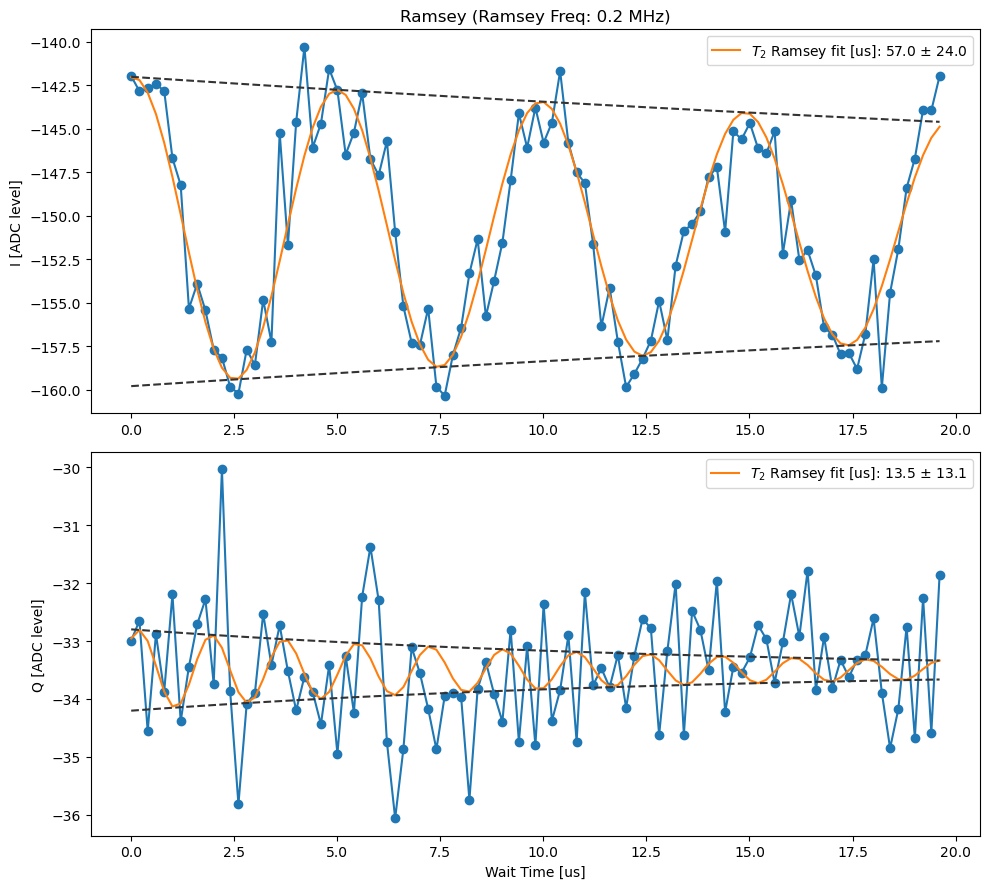

supertitle is  None
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-07-15_12-18-09_Cavity_Ramsey_Analysis.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-07-15.md


In [651]:
from fit_display_classes import RamseyFitting
cavity_ramsey_analysis = RamseyFitting(
        cavity_ramsey.data, config=cavity_ramsey.cfg,
    )
cavity_ramsey_analysis.analyze()
cavity_ramsey_analysis.display(f_test = cavity_ramsey.cfg.expt.user_defined_pulse[1],title_str='Cavity Ramsey Analysis')

In [615]:
#issues with t2_ramsey code:

1- plot shows ramsey freq (0.2 MHz) even if you change the ramsey freq you use \
1b - but more importantly, the calculation of best fit also assumes a ram_freq of 0.2 regardless of actual ram_freq set \
2- code assumes best fit is plus (ignoring minus) of: min(cavity_ramsey_analysis.data['f_adjust_ramsey_avgi']) \
cant seem to find errors in the single_qubit.t2_cavity code though..

In [599]:
expts_base_inst.config_thisrun.device.manipulate.f_ge[0] = 4985.067071108202

## Gain to Alpha Calibration

Will do tomography on the vaccum state 

$W_{\alpha} (|0\rangle\langle0|) = \frac{2}{\pi} e^{-2|\alpha|^2}$

In [489]:
def do_parity_gain_experiment(
    config_thisrun,
    expt_path,
    config_path,
    start=0,
    step=200,
    expts=100,
    reps=500,
    rounds=1,
    qubit=0,
    qubits=[0],
    normalize=False,
    single_shot=False,
    singleshot_reps=1000,
    singleshot_active_reset=False,
    singleshot_man_reset=True,
    singleshot_storage_reset=True,
    active_reset=False,
    man_reset=True,
    storage_reset=True,
    span=1000,
    prep_e=False,
    manipulate=1,
    displace=(True, 0.05),
    const_pulse=(False, 1),
    f0g1_cavity=0,
    prepulse=False,
    pre_sweep_pulse=None,
    relax_delay=2500
):
    """
    Run the Parity Gain Experiment with configurable parameters.
    """
    expt_cfg = {
        'start': start,
        'step': step,
        'expts': expts,
        'reps': reps,
        'rounds': rounds,
        'qubit': qubit,
        'qubits': qubits,
        'normalize': normalize,
        'single_shot': single_shot,
        'singleshot_reps': singleshot_reps,
        'singleshot_active_reset': singleshot_active_reset,
        'singleshot_man_reset': singleshot_man_reset,
        'singleshot_storage_reset': singleshot_storage_reset,
        'active_reset': active_reset,
        'man_reset': man_reset,
        'storage_reset': storage_reset,
        'span': span,
        'prep_e': prep_e,
        'manipulate': manipulate,
        'displace': list(displace),
        'const_pulse': list(const_pulse),
        'f0g1_cavity': f0g1_cavity,
        'prepulse': prepulse,
        'pre_sweep_pulse': pre_sweep_pulse if pre_sweep_pulse is not None else []
    }
    parity_gain_exp = expts_base_inst.meas.single_qubit.parity_gain.ParityGainExperiment(
        soccfg=expts_base_inst.soc, path=expt_path, prefix='ParityGainExperiment', config_file=config_path
    )
    parity_gain_exp.cfg = AttrDict(deepcopy(config_thisrun))
    parity_gain_exp.cfg.expt = expt_cfg
    parity_gain_exp.cfg.device.readout.relax_delay = [relax_delay]
    
    parity_gain_exp.go(analyze=False, display=False, progress=True, save=True)
    return parity_gain_exp


In [480]:
expts_base_inst.config_thisrun.device

{'qubit': {'T1': [351.64566547320703],
  'f_ge': [3571.672429380876],
  'f_ef': [3428.4217571066574],
  'ramp_sigma': [0.005],
  'ramp_sigma_num': [3.0],
  'pulses': {'pi_ge': {'gain': [3454],
    'sigma': [0.035],
    'length': [0.0],
    'type': ['gauss']},
   'hpi_ge': {'gain': [1686],
    'length': [0.0],
    'sigma': [0.035],
    'type': ['gauss']},
   'pi_ef': {'gain': [2770],
    'length': [0.0],
    'sigma': [0.035],
    'type': ['gauss']},
   'hpi_ef': {'gain': [1318], 'sigma': [0.035], 'type': ['gauss']}},
  'T1_ef': [144.16571854782674]},
 'readout': {'trig_offset': [450],
  'frequency': [749.1194783440185],
  'gain': [800],
  'phase': [166.96985733003962],
  'threshold': [-123.97248546223591],
  'threshold_list': [[-123.97248546223591]],
  'man1_drive_list': [0.0],
  'man2_drive_list': [0.0],
  'readout_length': [1.5],
  'relax_delay': [2500],
  'confusion_matrix_with_reset': [0.9964530022802125,
   0.0035469977197875036,
   0.013768302080657598,
   0.9862316979193424],
  '

In [490]:
parity_gain_expt = do_parity_gain_experiment(
    config_thisrun=expts_base_inst.config_thisrun,
    expt_path=expts_base_inst.expt_path,
    config_path=expts_base_inst.config_file
)

[3]
1
theta_2 125.24239201033288
revival_time 1.6383629929445498
freq_AC -1.313569993893778
Parity Gain Program initialized
parity pulse: [[3573.00785430557, 3571.672429380876, 3573.00785430557], [8833, 0, 8833], [0, 1.6383629929445498, 0], [0, 0, 125.24239201033288], [2, 2, 2], ['gauss', 'const', 'gauss'], [0.007, 0.0, 0.007]]
Updating gain register 200


  0%|          | 0/50000 [00:00<?, ?it/s]

avig i: [-156.37309091 -157.81153247 -158.64697835 -157.96919913 -158.76135931
 -156.21598268 -153.03572727 -153.3111645  -149.28175758 -146.82071861
 -143.04463636 -139.10633333 -138.44656277 -132.71421212 -133.85550216
 -128.36521645 -126.23261039 -129.9171039  -123.72654978 -115.52155411
 -120.09427706 -118.92598268 -114.9747013  -119.41163203 -113.04241126
 -114.77702165 -113.96949351 -111.04197835 -111.13975325 -107.97980087
 -110.67272727 -106.93375325 -106.31052814 -111.62372727 -106.16132035
 -111.68862771 -107.65565368 -109.29264502 -106.30764935 -106.12519913
 -111.85328139 -103.13549351 -109.39464069 -112.00154113 -110.68174892
 -109.44712121 -110.26010823 -110.96984416 -109.69964502 -107.49832035
 -108.28493939 -108.09824675 -109.273      -108.72916883 -100.87580519
 -102.91660173 -107.88278355 -111.87305628 -109.14864069 -102.02745887
 -104.1244329  -110.17950649 -107.25674892 -106.47062338 -107.35762338
 -109.91266234 -104.72003896 -104.53713853 -105.95981385 -111.9396796

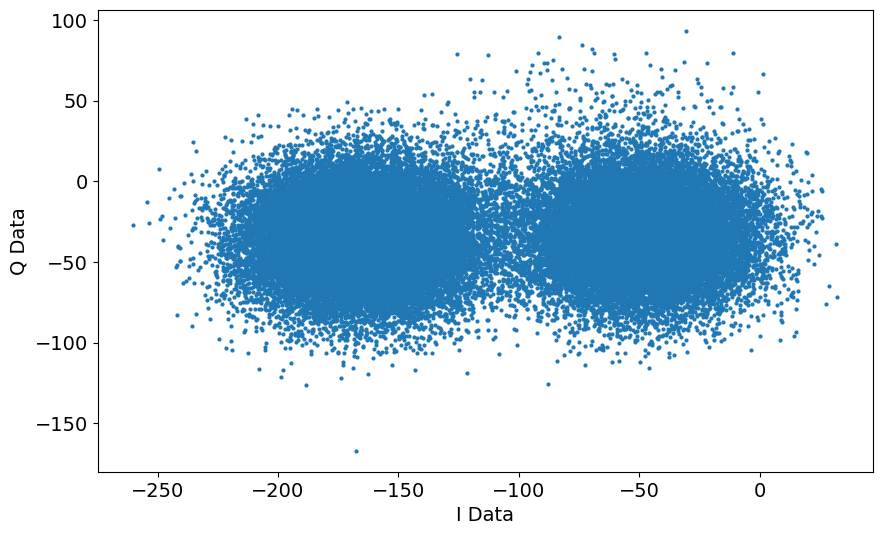

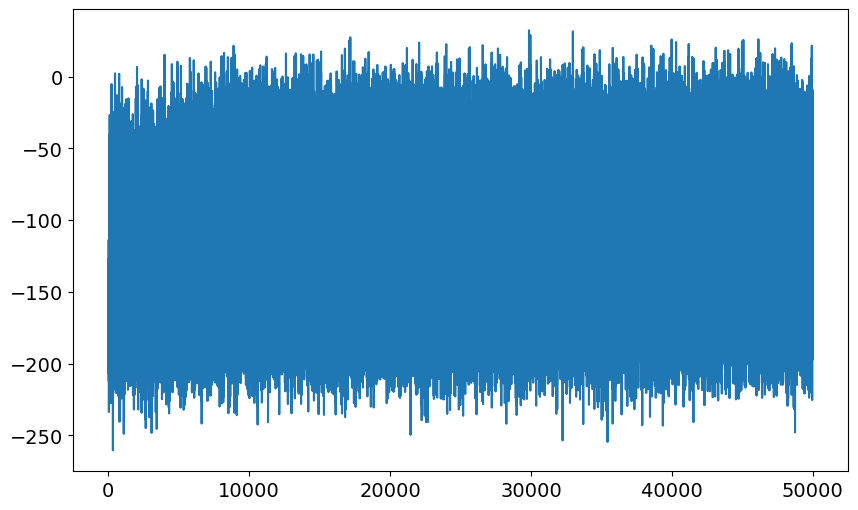

In [491]:
i_data = parity_gain_expt.data['idata']
q_data = parity_gain_expt.data['qdata']

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(i_data, q_data, 'o', markersize=2)
ax.set_xlabel('I Data')
ax.set_ylabel('Q Data')
fig2, ax2 = plt.subplots(1, 1, figsize=(10, 6))
ax2.plot(i_data)


No angle calibration found in data, assuming no rotation
No thresholds found in data, using default threshold
No confusion matrix found in data, using default confusion matrix
Rotating data by -0.0 radians
pe: [0.06808326 0.07025152 0.05941023 0.05290546 0.06808326 0.08976583
 0.11795317 0.11361665 0.14180399 0.15481353 0.21986123 0.22202949
 0.24588031 0.27406765 0.29575022 0.33261058 0.36079792 0.31960104
 0.36947095 0.44102342 0.40416305 0.41066782 0.46921075 0.40633131
 0.45403296 0.45620121 0.45620121 0.48872507 0.48438855 0.50823938
 0.49739809 0.5320902  0.54509974 0.49306158 0.53425846 0.48655681
 0.50607112 0.52124892 0.53425846 0.53642671 0.49522984 0.57328708
 0.50173461 0.48438855 0.50607112 0.50390286 0.49739809 0.49089332
 0.49956635 0.52558543 0.51474415 0.5169124  0.50823938 0.50823938
 0.57111882 0.55160451 0.52775369 0.48005204 0.51257589 0.56461405
 0.56027754 0.50390286 0.50823938 0.5169124  0.52341717 0.49522984
 0.54943625 0.52558543 0.52992194 0.48655681 0.527753

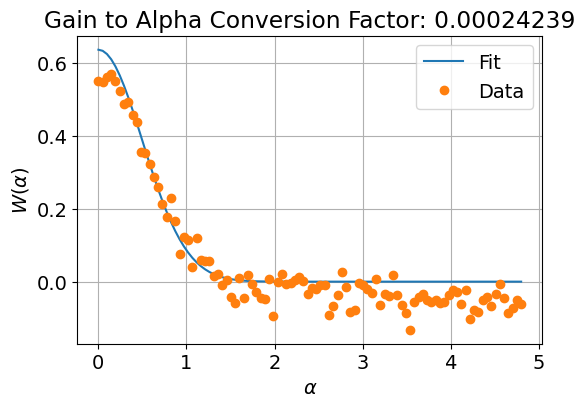

supertitle is  None
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-07-17_13-58-01_Gain_to_Alpha_Conversion_Factor_0.00024239.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-07-17.md
alpha = 1 requires gain of : 4125.49808260


In [492]:
from fitting_folder.wigner import WignerAnalysis
wigner_analysis = WignerAnalysis(parity_gain_expt.data, config=parity_gain_expt.cfg)
gain_to_alpha, result, ydata = wigner_analysis.get_gain_to_alpha(initial_guess=[0.001])

In [495]:
#update device
print(f'Gain to alpha: {gain_to_alpha}')
expts_base_inst.config_thisrun.device.manipulate.gain_to_alpha[0] = gain_to_alpha

Gain to alpha: 0.0002423949738863674


# Wigner Tomography

## Generate Optimal Displacements 

In [494]:
expts_base_inst.path

'H:\\Shared drives\\SLab\\Multimode\\experiment\\250505_craqm'

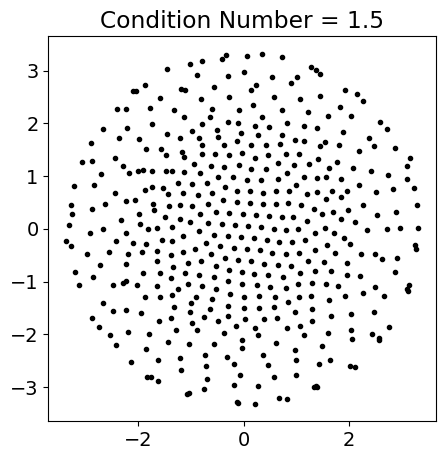

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
Displacements saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\optimized_displacements_39.npy


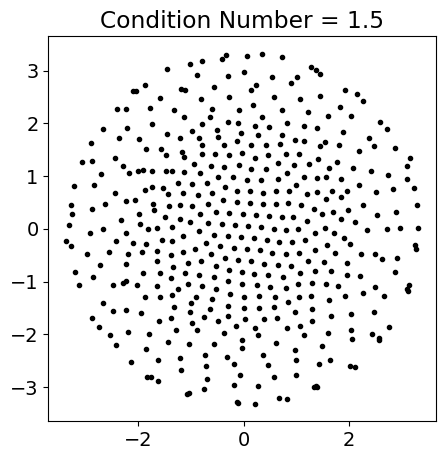

In [688]:
from fitting_folder.wigner import OptimalDisplacementGeneration
# Number of photons 
n_photon = 14
opt_alphas = OptimalDisplacementGeneration(FD = n_photon)
return_dict = opt_alphas.optimize(save_dir = expts_base_inst.expt_path )


In [689]:
# Get frunc from |2>
def do_wigner_tomography_1mode(
    config_thisrun,
    expt_path,
    config_path,
    displace_length=0.05,
    displacement_path=None,
    prepulse=False,
    pre_sweep_pulse=None,
    pre_gate_sweep_pulse=None,
    reps = 1000,
    qubits=[0],
    gate_based=True,
    pulse_correction=False,
    relax_delay=2500
):
    """
    Run the Wigner Tomography 1 Mode Experiment with configurable parameters.
    """
    expt_cfg = {
        'displace_length': displace_length,
        'displacement_path': displacement_path,
        'reps': reps,
        'rounds': 1,
        'prepulse': prepulse,
        'pre_sweep_pulse': pre_sweep_pulse if pre_sweep_pulse is not None else [],
        'pre_gate_sweep_pulse': pre_gate_sweep_pulse if pre_gate_sweep_pulse is not None else [],
        'qubits': qubits,
        'pulse_correction': pulse_correction,
    }
    wigner_exp = expts_base_inst.meas.qubit_cavity.single_mode_wigner_tomography.WignerTomography1ModeExperiment(
        soccfg=expts_base_inst.soc, path=expt_path, prefix='WignerTomography1ModeExperiment', config_file=config_path
    )
    wigner_exp.cfg = AttrDict(deepcopy(config_thisrun))
    wigner_exp.cfg.expt = expt_cfg
    wigner_exp.cfg.expt.gate_based = gate_based  # Set gate_based to False for Wigner tomography
    wigner_exp.cfg.device.readout.relax_delay = [relax_delay]
    # wigner_exp.cfg.device.readout.phase = 90.0  # Set readout phase to 0.0

    wigner_exp.go(analyze=True, display=False, progress=True, save=True)
    return wigner_exp

print(expts_base_inst)
# print(wigner_exp)

## Wigner Tomography

In [753]:
# prep_man_pi = mm_base_calib.prep_man_photon(man_no=1, photon_no=4, hpi= True)
# prep_man_pi = mm_base_calib.prep_man_photon(man_no=1, photon_no=0, hpi= True)
photon_list = [4]
prep_man_pi = mm_base_calib.prep_fock_state(man_no=1, photon_no_list=photon_list,broadband=True)
pulse = mm_base_calib.get_prepulse_creator(prep_man_pi).pulse.tolist()
# post_pulse = [[pulse[i][-1]] for i in range(len(pulse))]  # post pulse is the same as prepulse
# post_pulse
prep_man_pi

[['multiphoton', 'g0-e0', 'pi', 0],
 ['multiphoton', 'e0-f0', 'pi', 0],
 ['multiphoton', 'f0-g1', 'pi', 0],
 ['multiphoton', 'g1-e1', 'pi', 0],
 ['multiphoton', 'e1-f1', 'pi', 0],
 ['multiphoton', 'f1-g2', 'pi', 0],
 ['multiphoton', 'g2-e2', 'pi', 0],
 ['multiphoton', 'e2-f2', 'pi', 0],
 ['multiphoton', 'f2-g3', 'pi', 0],
 ['multiphoton', 'g3-e3', 'pi', 0],
 ['multiphoton', 'e3-f3', 'pi', 0],
 ['multiphoton', 'f3-g4', 'pi', 0]]

In [757]:
wigner = do_wigner_tomography_1mode(
    config_thisrun=expts_base_inst.config_thisrun,
    expt_path=expts_base_inst.expt_path,
    config_path=expts_base_inst.config_file,
    displace_length=0.05,
    reps = 500,
    displacement_path=return_dict['path'], #optimal displacement path
    prepulse=True,
    pre_sweep_pulse=pulse,
    gate_based = False,
    pulse_correction=True,
    relax_delay=2500
)

Pulse correction is applied
gain2alpha: 0.0002423949738863674


  0%|          | 0/20 [00:00<?, ?it/s]

theta_2 125.24239201033288
revival_time 1.6383629929445498
theta_2 180.0
revival_time 0
theta_2 0.0
revival_time 0
theta_2 125.24239201033288
revival_time 1.6383629929445498
theta_2 180.0
revival_time 0
theta_2 0.0
revival_time 0
theta_2 125.24239201033288
revival_time 1.6383629929445498
theta_2 180.0
revival_time 0
theta_2 0.0
revival_time 0
theta_2 125.24239201033288
revival_time 1.6383629929445498
theta_2 180.0
revival_time 0
theta_2 0.0
revival_time 0
theta_2 125.24239201033288
revival_time 1.6383629929445498
theta_2 180.0
revival_time 0
theta_2 0.0
revival_time 0
theta_2 125.24239201033288
revival_time 1.6383629929445498
theta_2 180.0
revival_time 0
theta_2 0.0
revival_time 0
theta_2 125.24239201033288
revival_time 1.6383629929445498
theta_2 180.0
revival_time 0
theta_2 0.0
revival_time 0
theta_2 125.24239201033288
revival_time 1.6383629929445498
theta_2 180.0
revival_time 0
theta_2 0.0
revival_time 0
theta_2 125.24239201033288
revival_time 1.6383629929445498
theta_2 180.0
revival

In [758]:
wigner.analyze()

(500, 20)
(500, 20)
(500, 20)


{'alpha': array([0.        , 0.10526316, 0.21052632, 0.31578947, 0.42105263,
        0.52631579, 0.63157895, 0.73684211, 0.84210526, 0.94736842,
        1.05263158, 1.15789474, 1.26315789, 1.36842105, 1.47368421,
        1.57894737, 1.68421053, 1.78947368, 1.89473684, 2.        ]),
 'avgi': array([-139.66680087, -135.22645455, -113.38174459,  -94.78105195,
         -77.70605195,  -74.71880952,  -79.42866667,  -85.61549351,
         -96.87180519, -103.21986147, -102.78007792,  -96.99562338,
         -90.74535065,  -88.9865974 ,  -82.3850303 ,  -88.75251082,
         -91.64267965,  -98.53333766, -108.79928571, -111.13510823]),
 'avgq': array([-18.67179654, -20.47414286, -18.1922987 , -19.85607359,
        -18.85926407, -17.74293074, -18.40885281, -18.8274026 ,
        -20.62327273, -20.69482251, -17.72226407, -17.66967965,
        -19.63936364, -18.6168961 , -16.46215152, -16.63684848,
        -19.12345455, -18.26048918, -20.28612554, -19.22996537]),
 'amps': array([0.        , 0.1052631

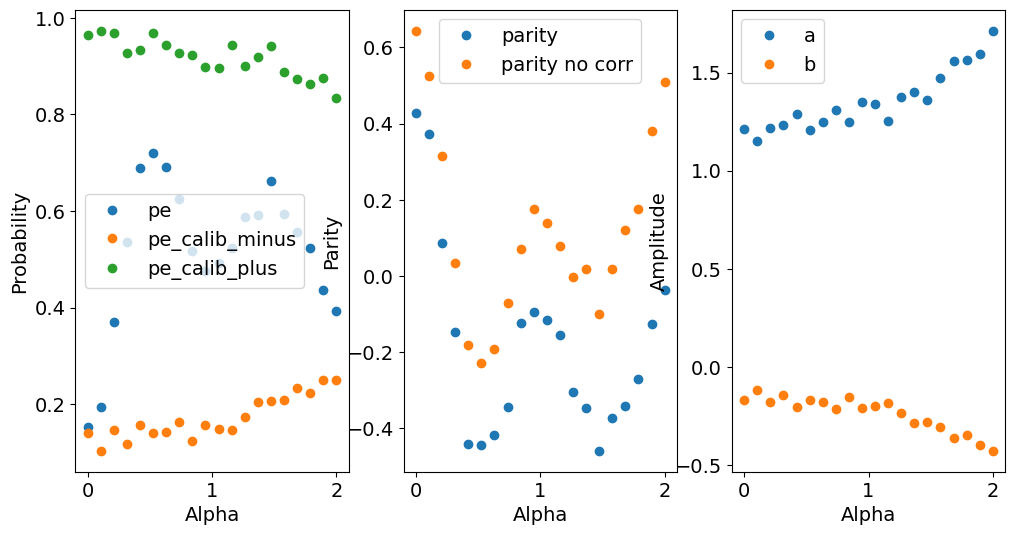

In [760]:
fig, ax = plt.subplots(1, 3, figsize=(12, 6))

# pe_plus = wigner.data['pe_plus']
# pe_minus = wigner.data['pe_minus']
# pe = pe_plus + pe_minus
# ax[0].plot(np.abs(wigner.data['alpha']), pe, 'o')
# ax[0].plot(np.abs(wigner.data['alpha']), pe_plus, 'o', label='pe_plus')
# ax[0].plot(np.abs(wigner.data['alpha']), pe_minus, 'o', label='pe_minus')

# parity_plus = wigner.data['parity_plus']
# parity_minus = wigner.data['parity_minus']
# parity = wigner.data['parity']
# ax[1].plot(np.abs(wigner.data['alpha']), 2 / np.pi *parity, 'o')
# ax[1].plot(np.abs(wigner.data['alpha']), 2 / np.pi *parity_plus, 'o', label='parity_plus')
# ax[1].plot(np.abs(wigner.data['alpha']), 2 / np.pi *parity_minus, 'o', label='parity_minus')

# ax[0].set_xlabel('Alpha')
# ax[0].set_ylabel('Probability')
# ax[1].set_xlabel('Alpha')
# ax[1].set_ylabel('Parity')
# ax[0].legend()
# ax[1].legend()
# plt.tight_layout()


pe = wigner.data['pe']
pe_calib_minus = wigner.data['pe_calib_minus']
pe_calib_plus = wigner.data['pe_calib_plus']
a = wigner.data['a']
b = wigner.data['b']
parity = wigner.data['parity']
parity_no_corr = wigner.data['parity_no_corr']

ax[0].plot(np.abs(wigner.data['alpha']), pe, 'o', label='pe')
ax[0].plot(np.abs(wigner.data['alpha']), pe_calib_minus, 'o', label='pe_calib_minus')
ax[0].plot(np.abs(wigner.data['alpha']), pe_calib_plus, 'o', label='pe_calib_plus')
ax[0].set_xlabel('Alpha')
ax[0].set_ylabel('Probability')
ax[1].plot(np.abs(wigner.data['alpha']), 2 / np.pi * parity, 'o', label='parity')
ax[1].plot(np.abs(wigner.data['alpha']),  2 / np.pi * (parity_no_corr*a -b), 'o', label='parity no corr')
ax[1].set_xlabel('Alpha')
ax[1].set_ylabel('Parity')

ax[2].plot(np.abs(wigner.data['alpha']), a, 'o', label='a')
ax[2].plot(np.abs(wigner.data['alpha']), b, 'o', label='b')
ax[2].set_xlabel('Alpha')
ax[2].set_ylabel('Amplitude')

ax[0].legend()
ax[1].legend()
ax[2].legend()

Keys in data: dict_keys(['alpha', 'avgi', 'avgq', 'amps', 'phases', 'i0', 'q0', 'pe_plus', 'pe_minus', 'parity_plus', 'parity_minus', 'parity'])
Alpha data: [ 0.00000000e+00+0.00000000e+00j  2.29133996e-01+2.59951050e-01j
 -1.00042964e+00-1.40601219e+00j -1.86080242e+00-2.85141653e-01j
 -5.55723438e-01-1.08274474e-01j  2.18735657e-01+1.95834431e+00j
  2.69542634e-02-1.71529949e+00j -1.56048564e+00-2.03062252e-01j
 -2.91860366e+00-8.21204779e-02j -1.64984287e+00-1.08990986e+00j
  8.57077501e-01+7.14702527e-01j  2.43103572e+00-1.98653279e+00j
  1.57201753e+00-3.03346107e-01j  1.66253113e+00-8.05437697e-01j
 -2.24108444e+00-1.54049888e+00j -2.84771622e+00+8.23862764e-01j
  1.20510128e+00+6.61392493e-01j  2.19255080e+00+8.26031928e-01j
  3.61258084e-01+4.64219516e-01j -1.90467225e-01-2.56417655e+00j
 -5.62608220e-02-1.47446885e-01j -6.41921554e-01-1.52020912e+00j
 -1.20192052e+00+1.71826619e+00j  9.92483668e-01-2.48490159e+00j
  6.68643660e-01-2.50493117e-01j  1.13432636e+00-2.01980125e+00

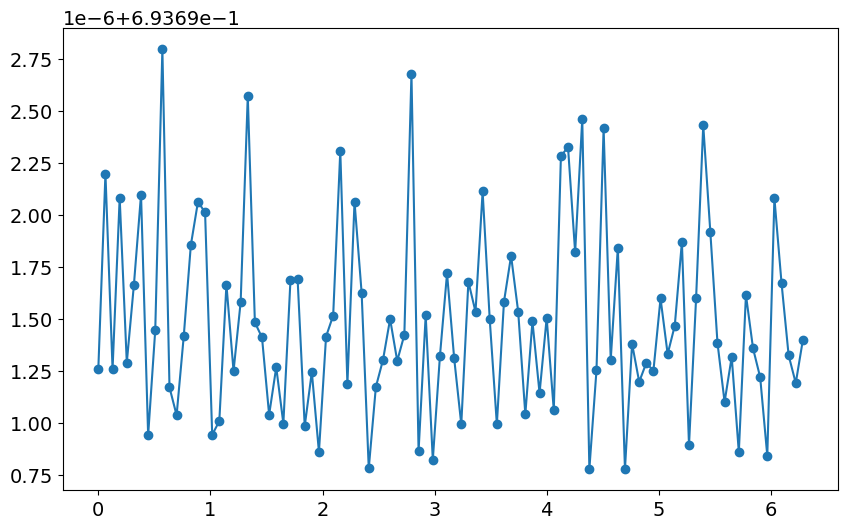

In [702]:
wigner_analysis = WignerAnalysis(wigner.data, config=wigner.cfg, mode_state_num=10, alphas = wigner.data['alpha'])

import qutip as qt
state_list = qt.zero_ket(wigner_analysis.m)  # Initialize the state list with the zero state |0>
for i in photon_list:
    state_list += qt.fock(wigner_analysis.m, i)  # Add states |1>, |2>, ..., |n_photon>
initial_state = state_list.unit()  # Normalize the state
results = wigner_analysis.wigner_analysis_results(parity, initial_state=initial_state, rotate=True)

Time taken for first subplot: 0.04669594764709473
Time taken for second subplot: 0.302013635635376
Time taken for third subplot: 39.135387659072876
MLE Fidelity:  0.6936927960137993
Time taken for fourth subplot: 78.03852486610413
supertitle is  Text(0.5, 0.98, 'MLE Fidelity: 0.6937')
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-07-18_08-32-58_.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-07-18.md


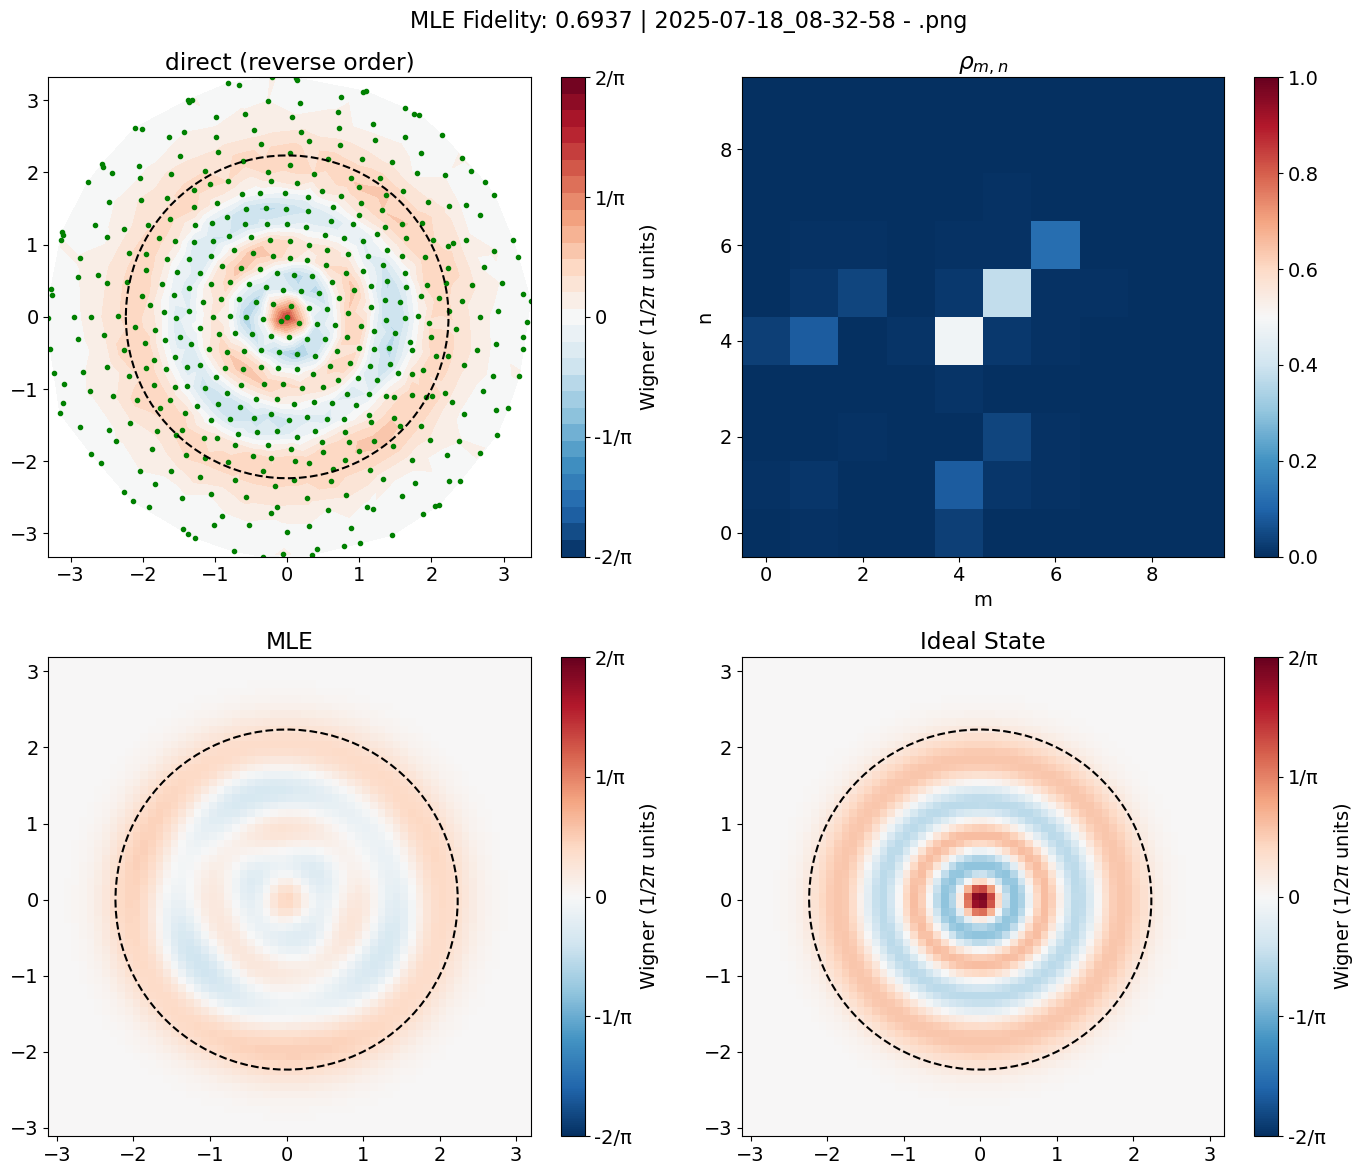

In [703]:
fig = wigner_analysis.plot_wigner_reconstruction_results(results, initial_state=initial_state, state_label = '')

In [95]:
from scipy.linalg import expm
import qutip as qt
theta = np.linspace(0, 2 * np.pi, 100)
rho = results['rho']
rho_ideal = results['rho_ideal']
fid = np.zeros(len(theta))

for i, t in enumerate(theta):
    N = np.diag(np.arange(wigner_analysis.m))
    R = expm(1j * t * N)  # Rotation operator
    rho_rotated = R @ rho @ R.conj().T  # Rotate the density matrix
    fid[i] = qt.fidelity(qt.Qobj(rho_rotated), rho_ideal)


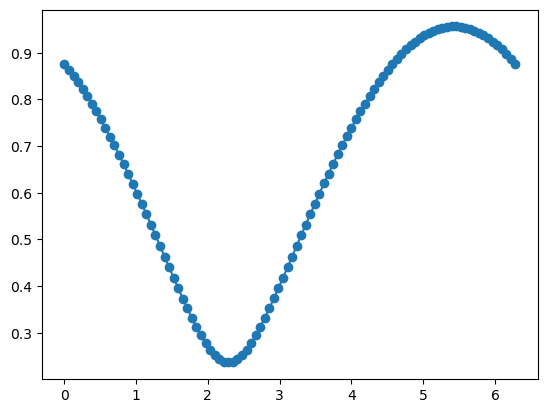

In [96]:
fig, ax = plt.subplots()
ax.plot(theta, fid, marker='o')

In [91]:
R = expm(1j * np.pi * N)
print(R@ R.conj().T)  # Rotate the density matrix by pi

[[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]]


## Swap against fidelity

In [ ]:
## Checking code
# stor = 7 #storage number from 1
# fock_n = 5 #fock numbers from 0
# swap_iter = 6 #even swaps from 0
# swaps_plot = [2*i for i in range(swap_iter)]


# for k in range(stor): #storage number
#     fock_dict = {"fock_"+str(fock_n): [] for fock_n in range(fock_n)}

#     for j in range(fock_n): #fock states 0 to 4
#         photon = j
#         fid_results = []
        
#         for i in range(swap_iter): #even no. of swaps from 0 to 10
#             swaps = 2*i
#             fid_results += [swaps+j+k]

#         print(f'Fidelity-swap results for fock ' +str(j) + ' in storage ' + str(k+1) + ':')
#         print(fid_results)
#         print(swaps_plot)
#         fock_dict['fock_'+str(j)].append(fid_results)

#     print(f'Storage {k+1} swap fidelity results:')
#     print(fock_dict)
#     plt.figure(figsize=(10, 6))    
#     for l in range(fock_n):
#         fock_i = fock_dict['fock_'+str(l)][0]
#         plt.plot(swaps_plot, fock_i, marker='o', label='Fock ' + str(fock_n))
#     # plt.plot(indices, fock_0, marker='o', label='Fock 0')
#     plt.xlabel('Number of Swaps')
#     plt.ylabel('Fidelity')
#     plt.title(f'Fidelity vs Number of Swaps for Fock ' + str(j) + ' in Storage ' + str(k+1))
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()

doing 0 swaps for fock 0 in storage 1
Pulse correction is applied


  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

C:\_Lib\python\multimode_expts\fitting_folder\wigner.py:303: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


Pulse correction is applied


  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

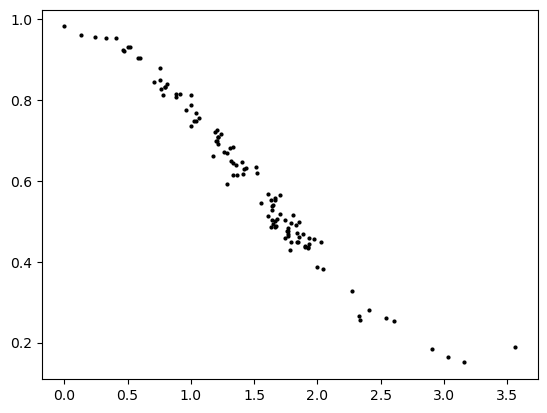

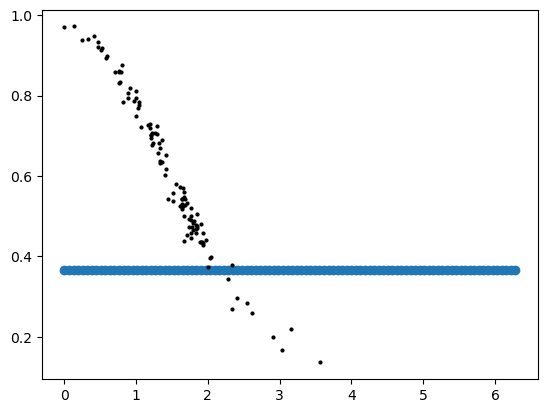

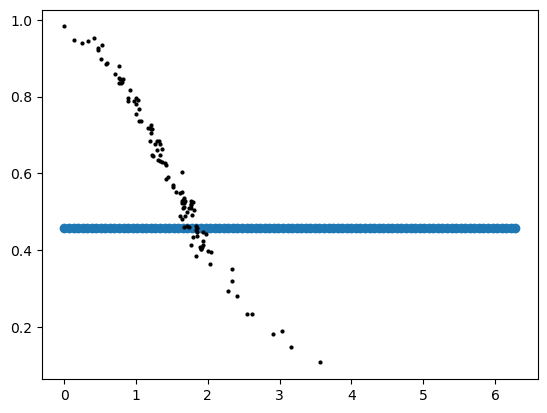

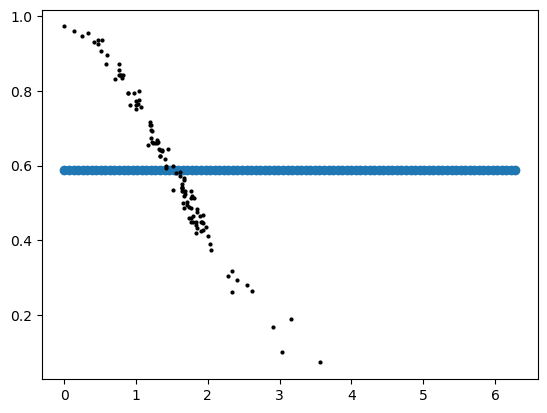

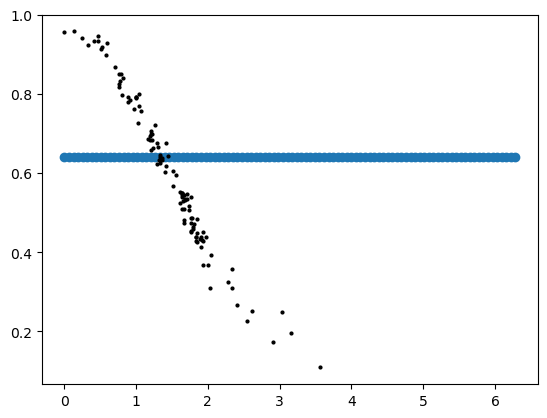

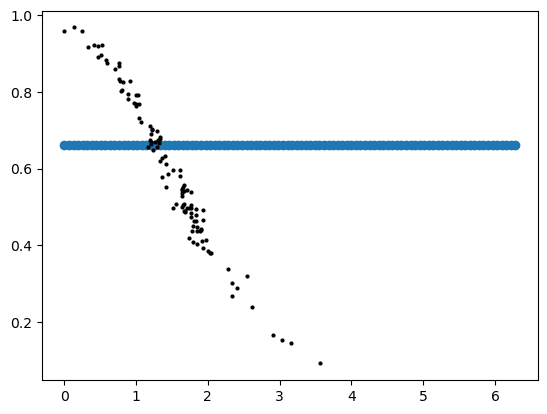

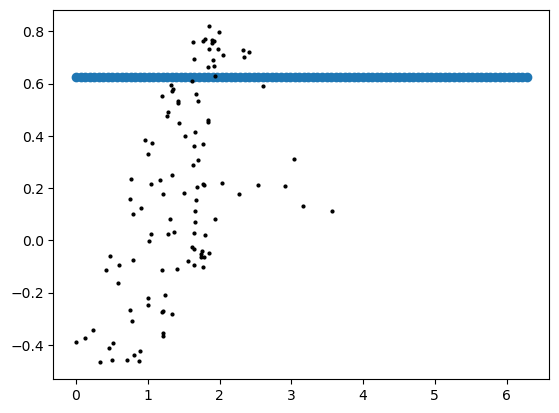

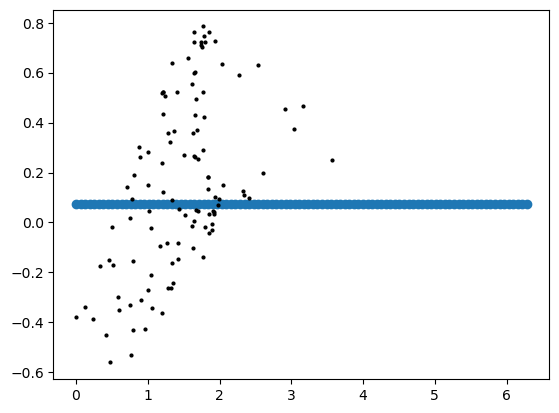

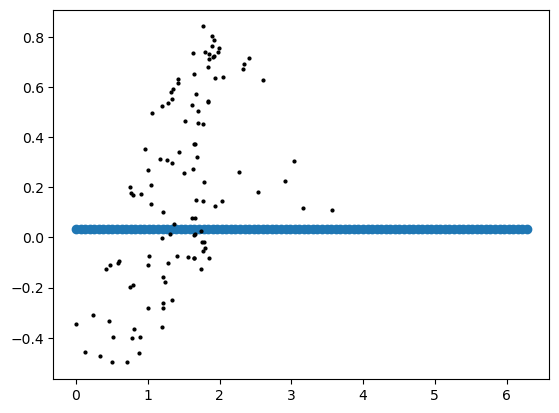

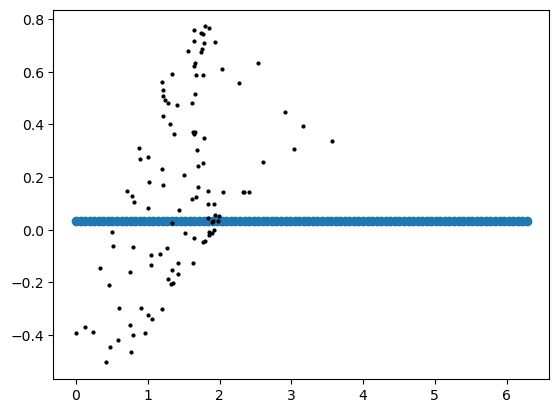

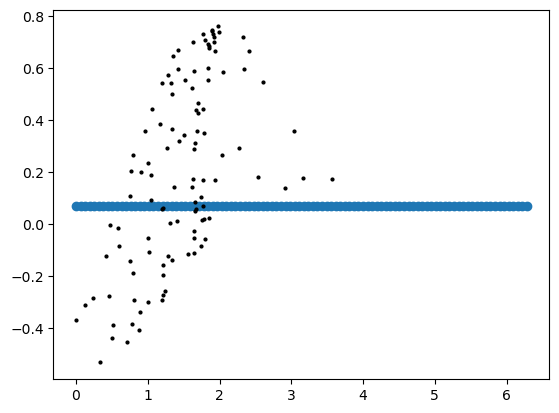

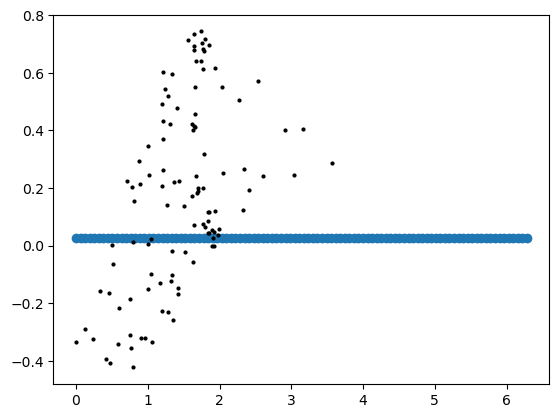

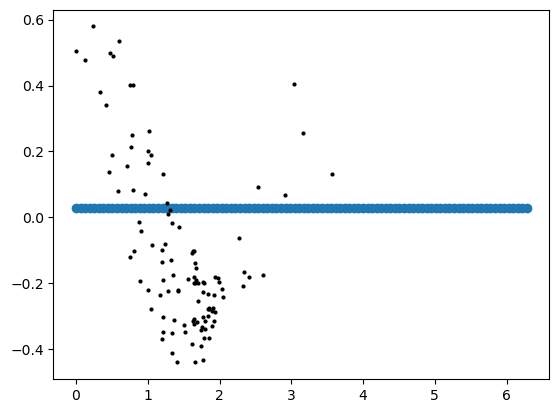

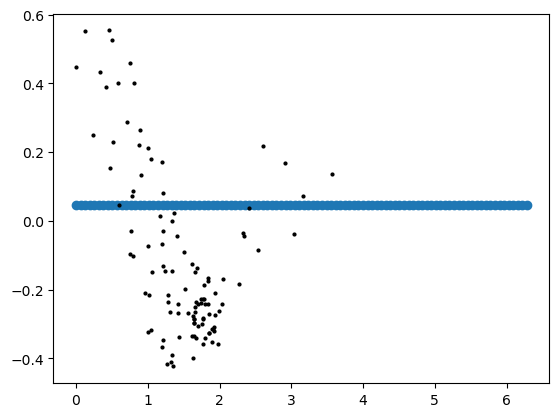

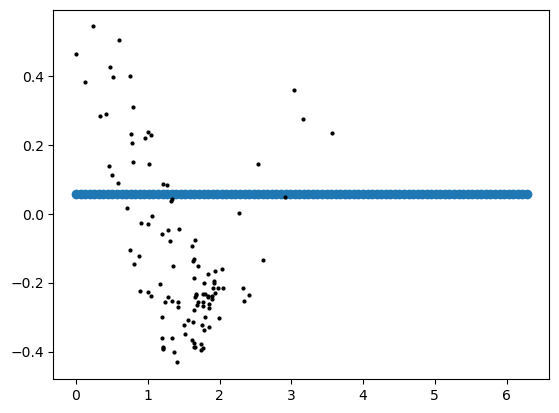

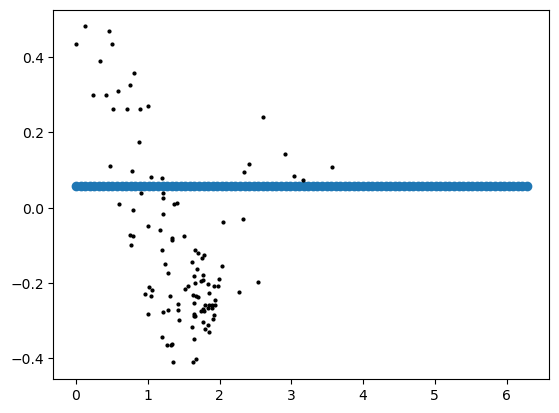

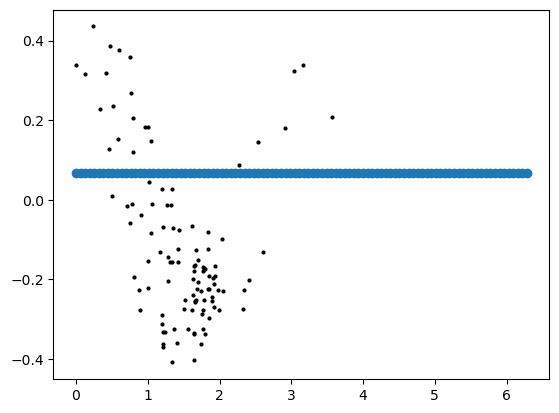

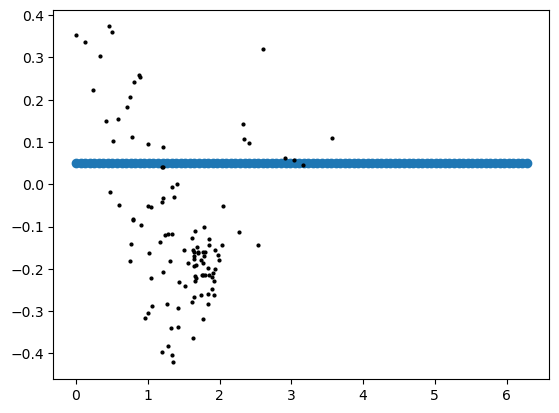

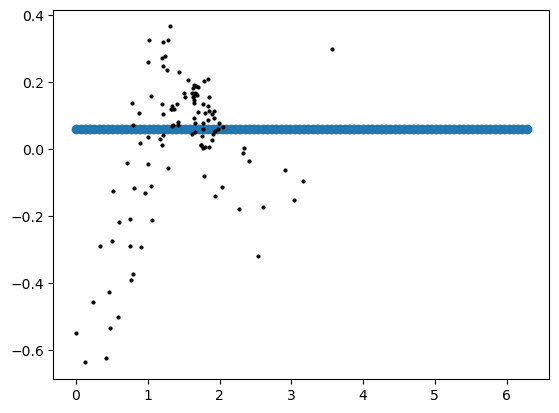

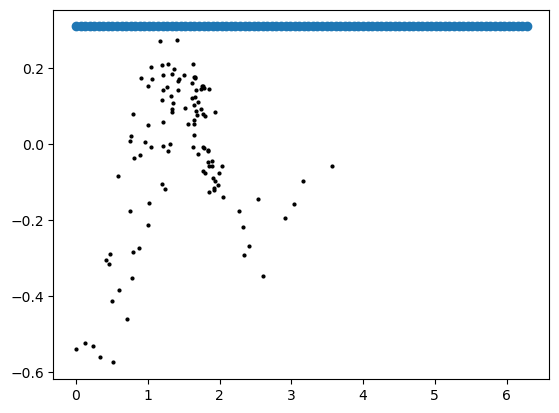

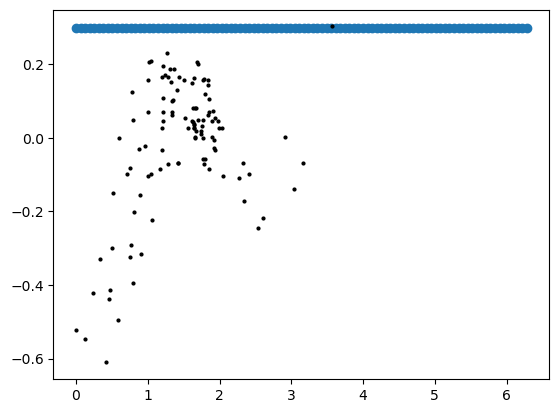

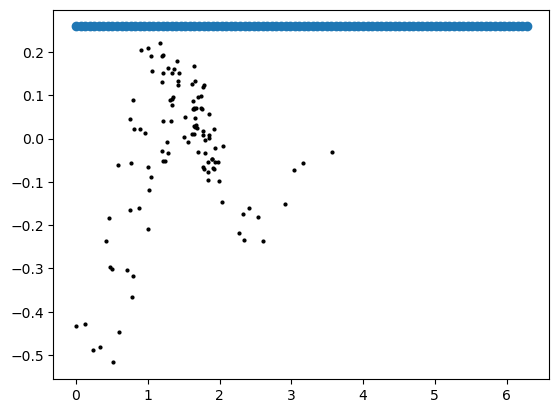

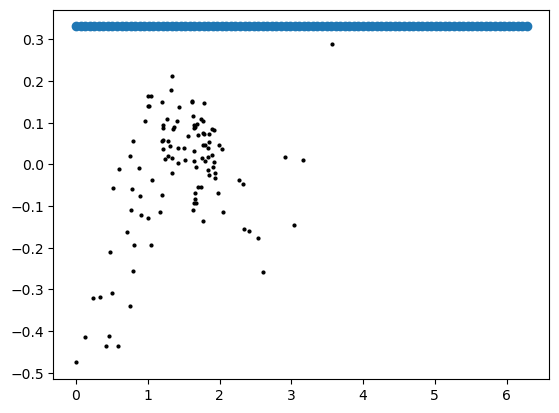

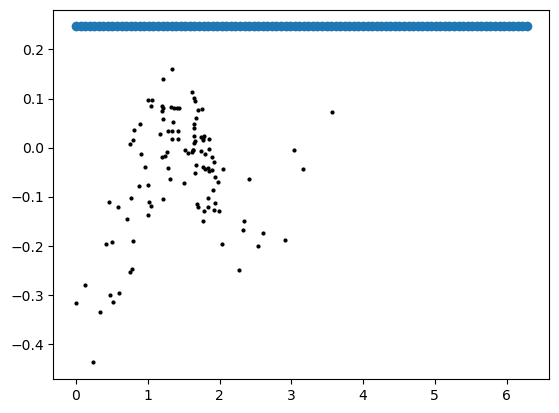

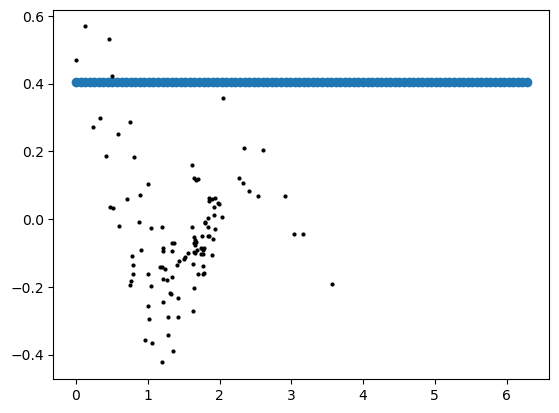

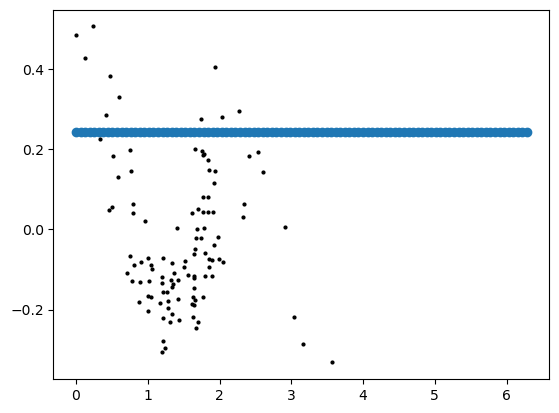

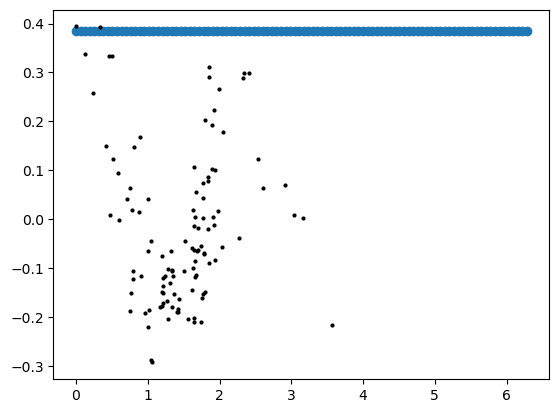

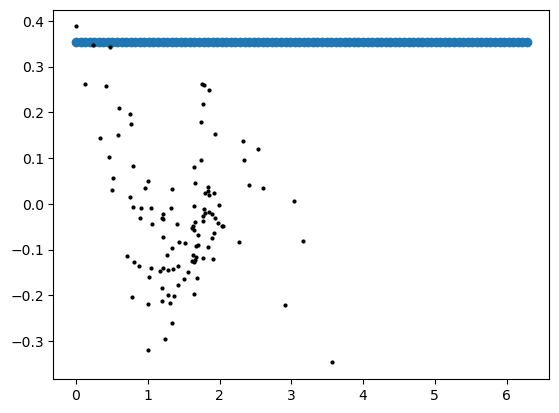

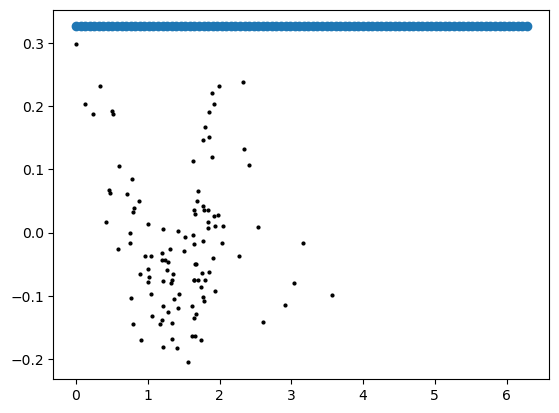

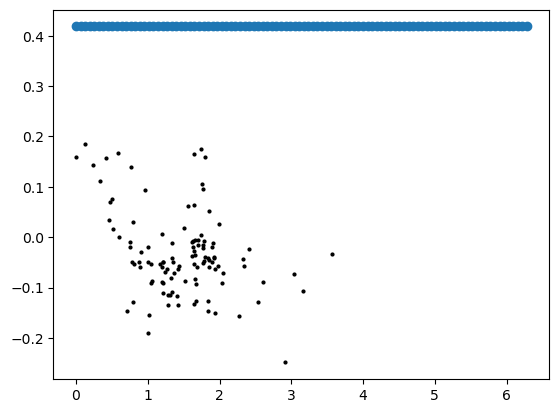

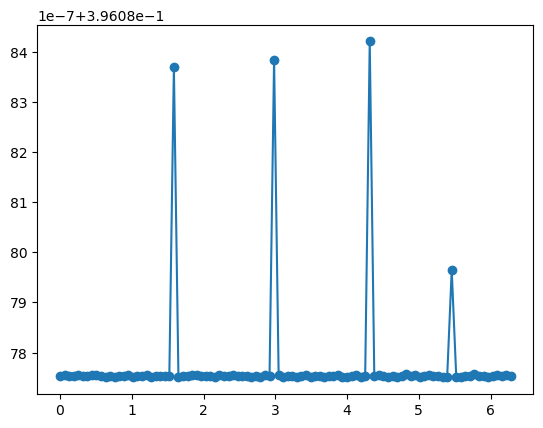

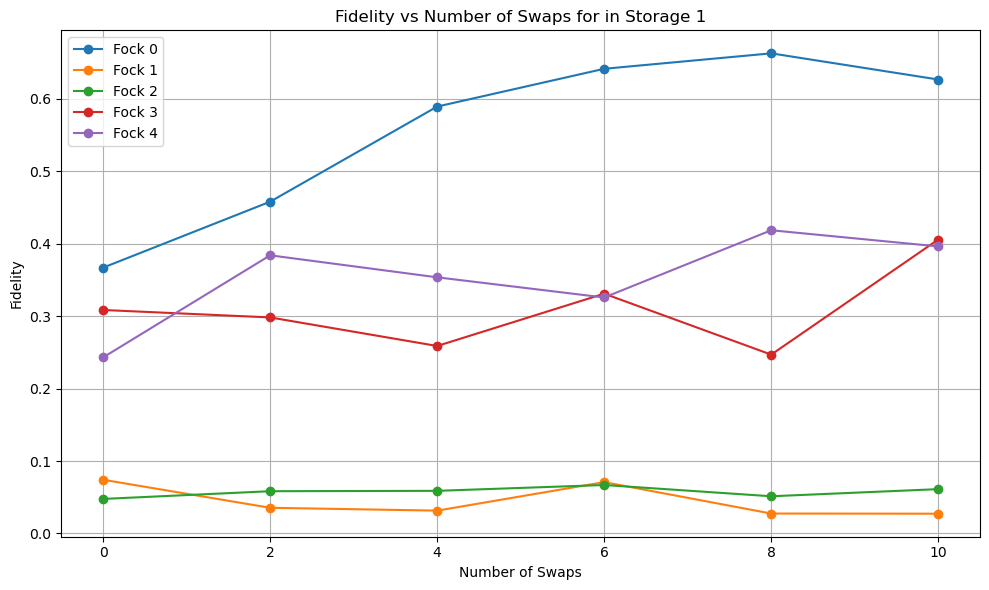

doing 0 swaps for fock 0 in storage 2
Pulse correction is applied


  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

C:\_Lib\python\multimode_expts\fitting_folder\wigner.py:303: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


0.1994093830593503
doing 4 swaps for fock 3 in storage 2
Pulse correction is applied


  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

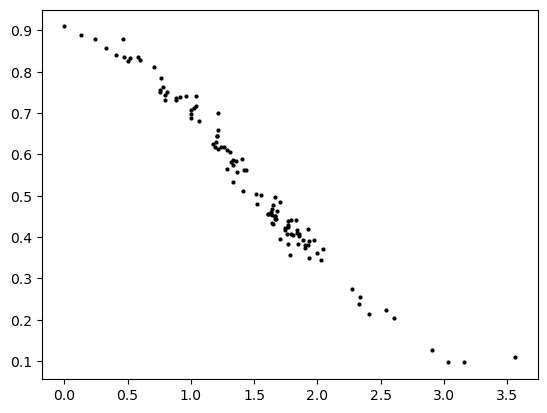

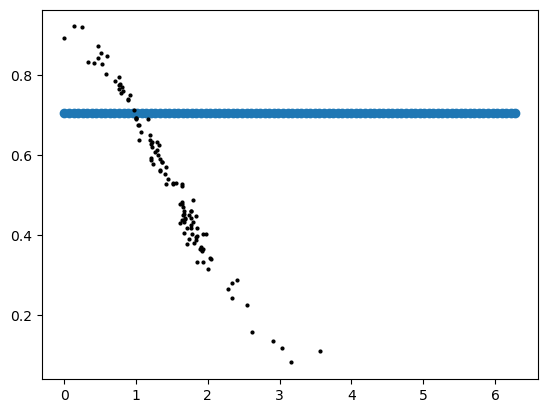

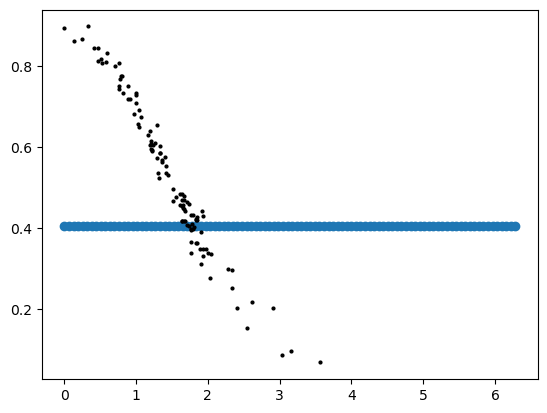

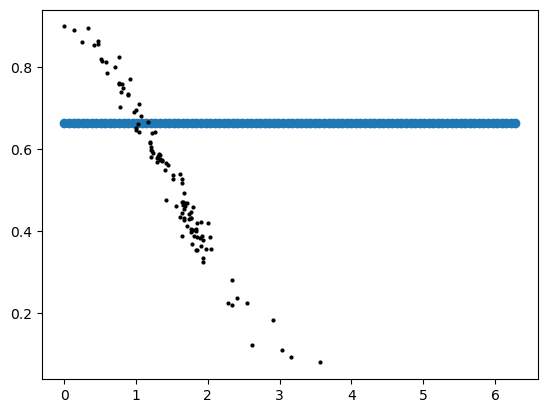

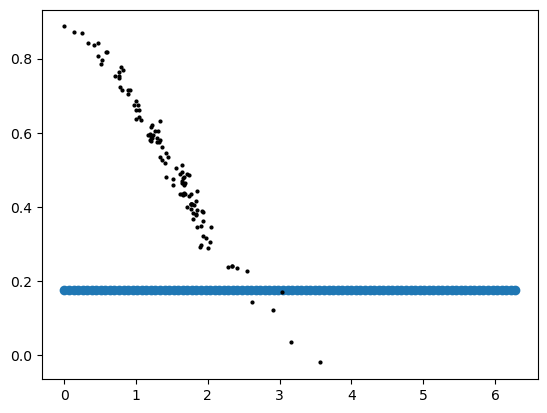

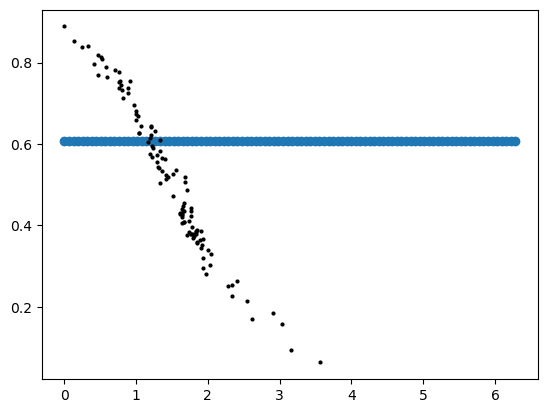

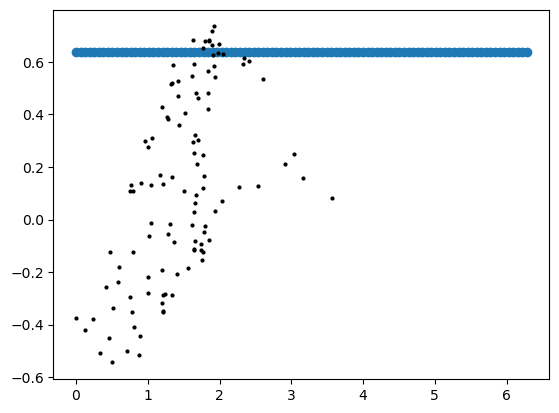

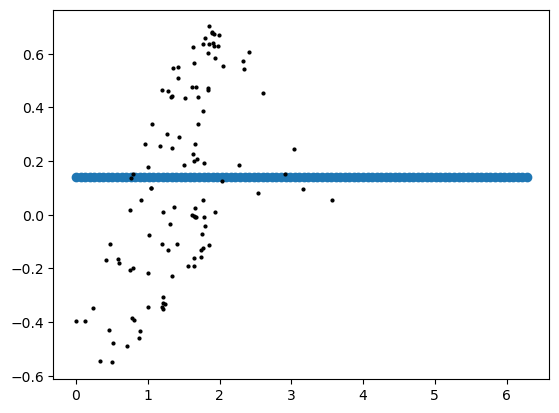

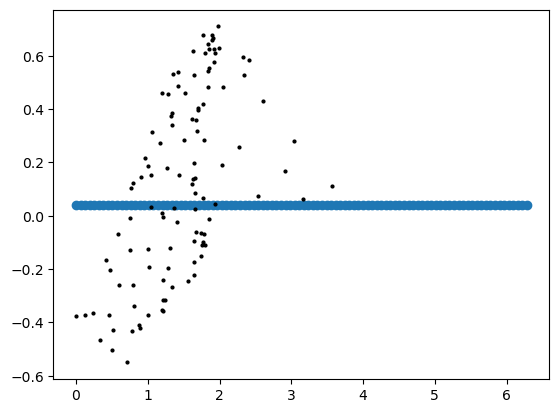

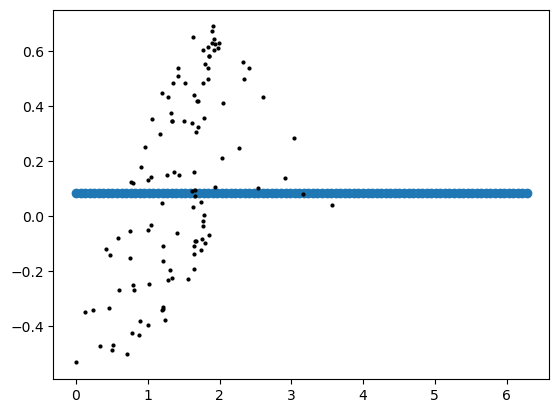

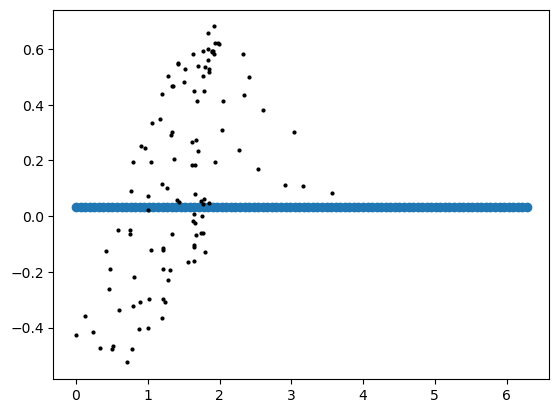

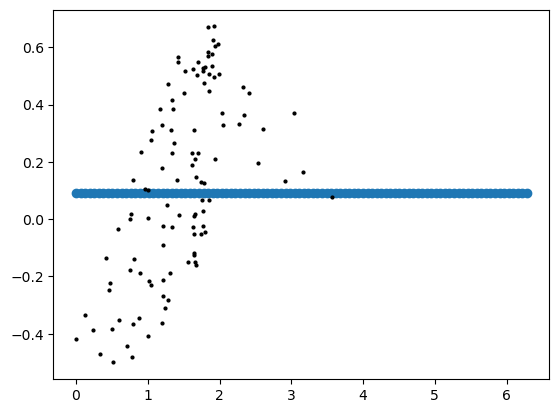

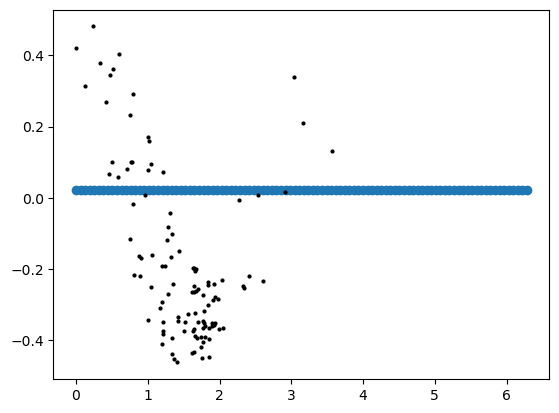

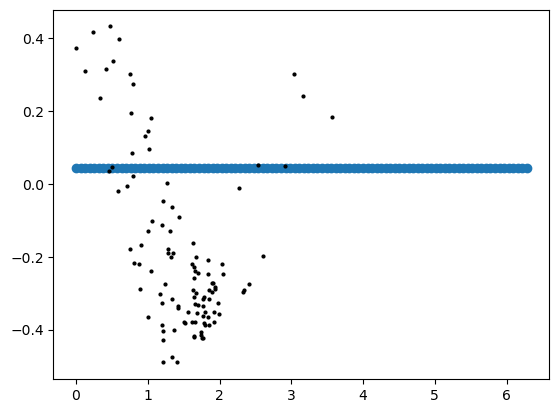

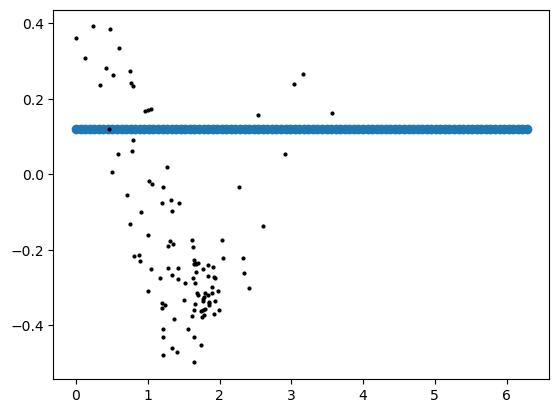

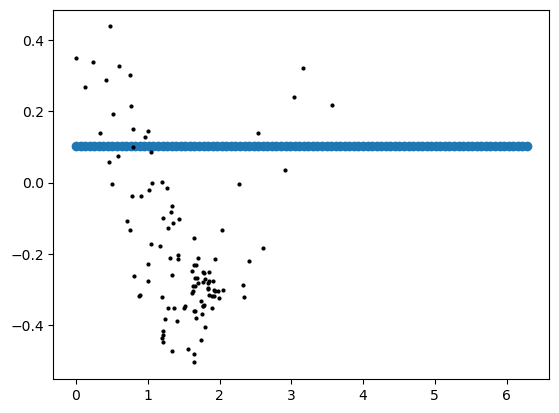

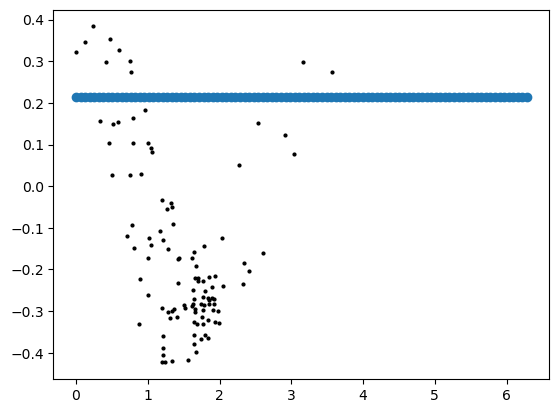

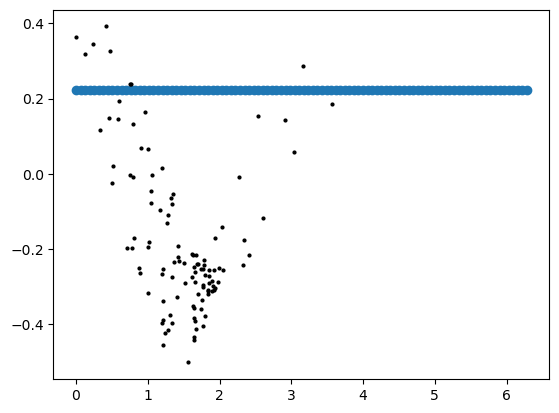

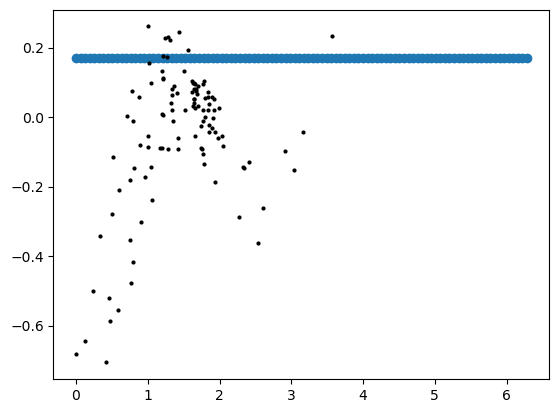

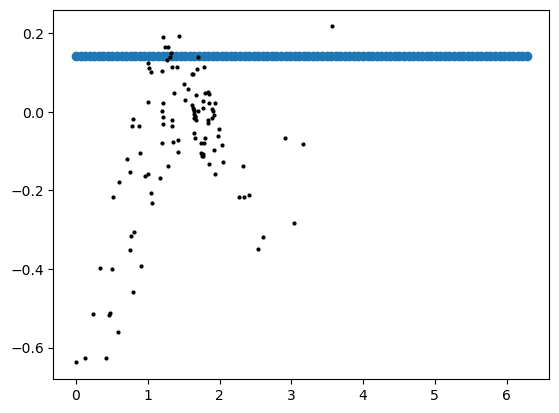

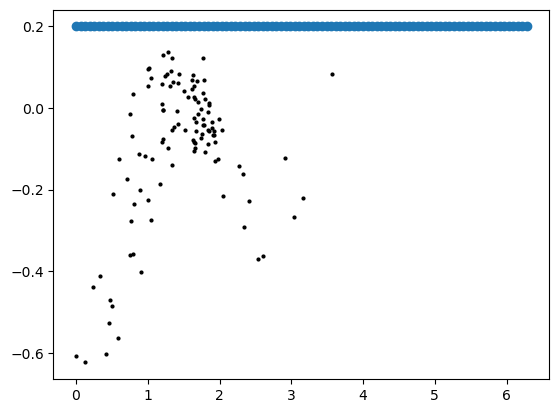

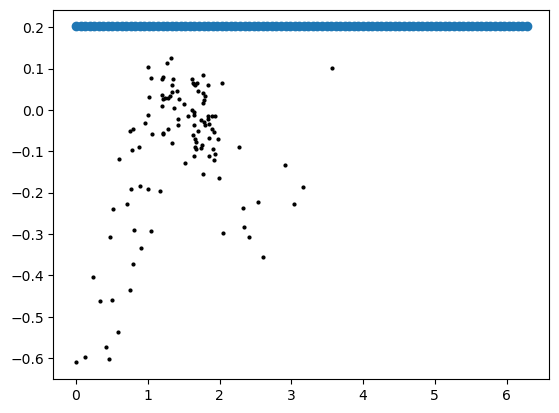

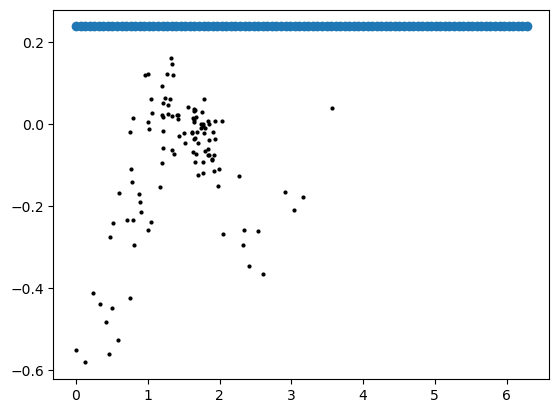

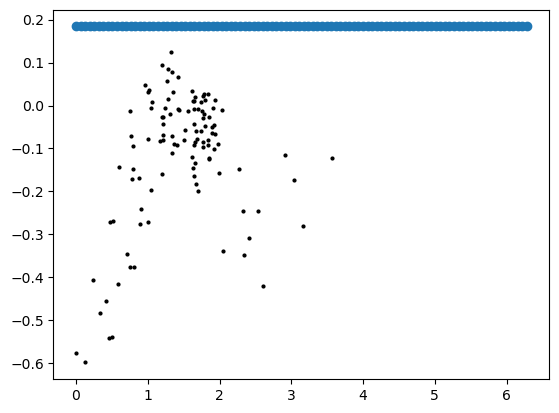

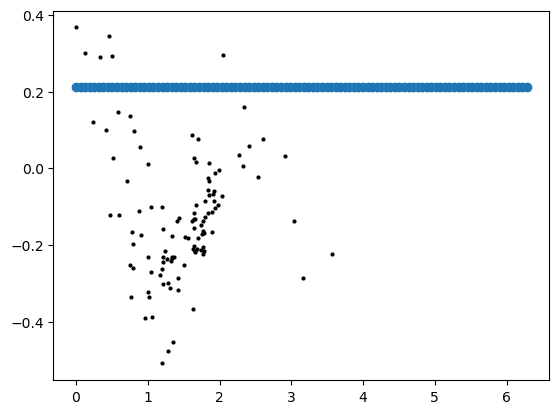

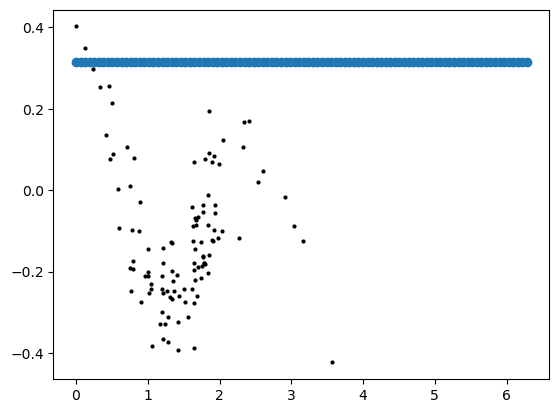

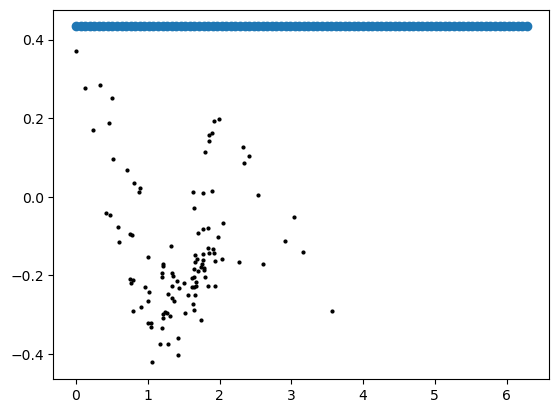

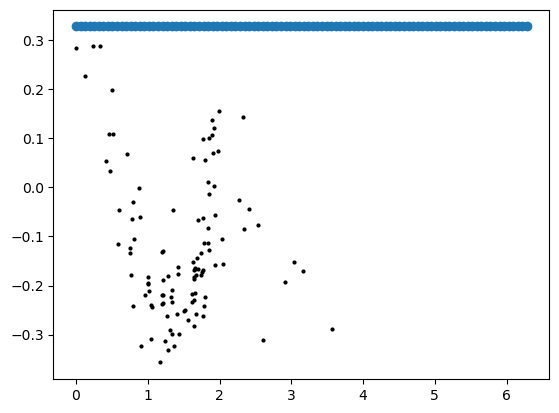

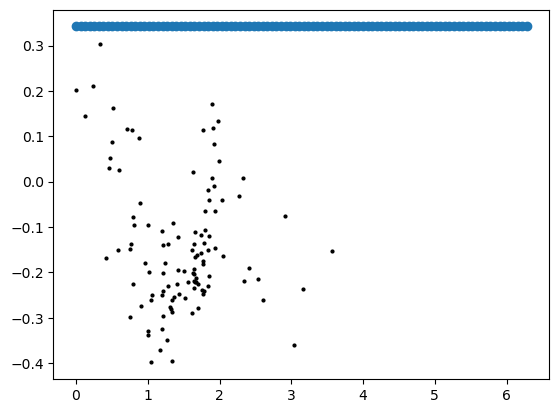

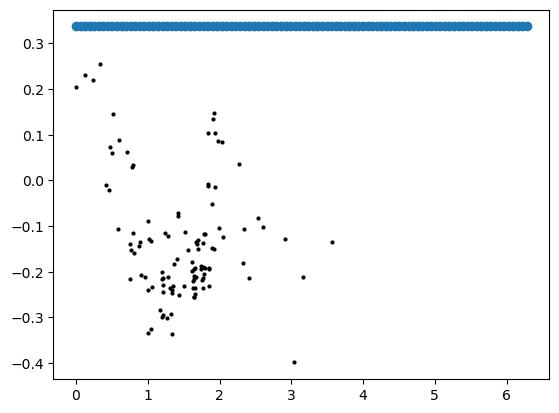

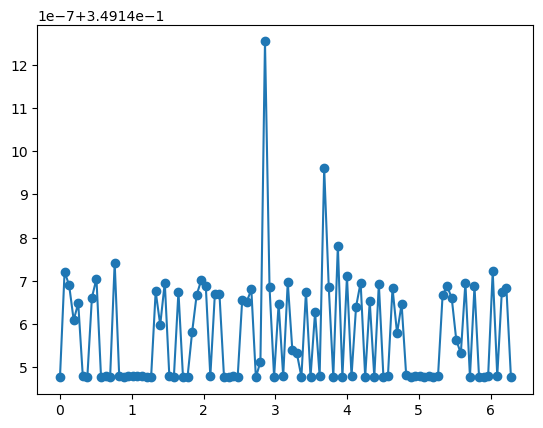

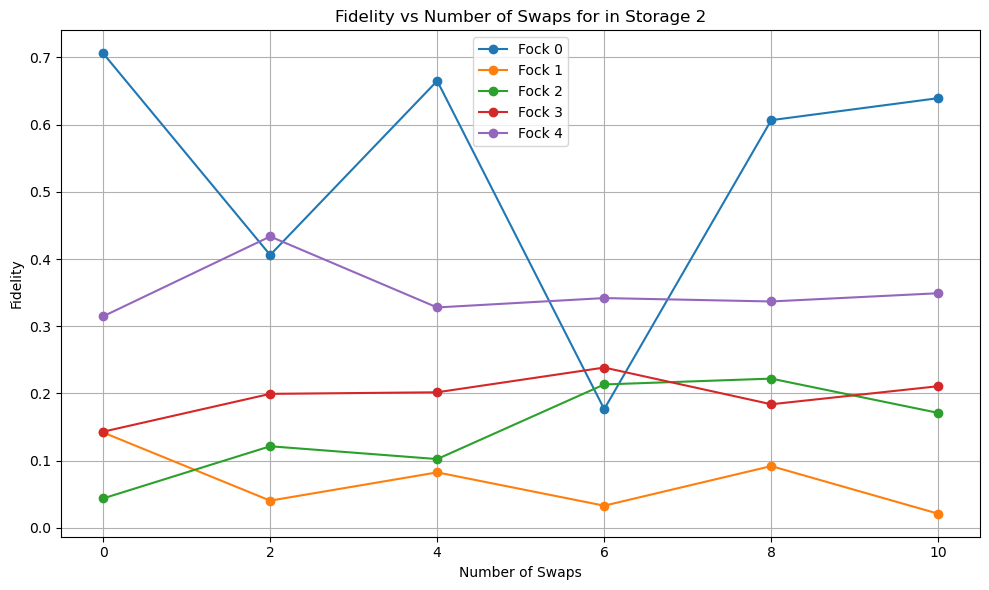

doing 0 swaps for fock 0 in storage 3
Pulse correction is applied


  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

C:\_Lib\python\multimode_expts\fitting_folder\wigner.py:303: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


0.34349873727148655
doing 4 swaps for fock 3 in storage 3
Pulse correction is applied


  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

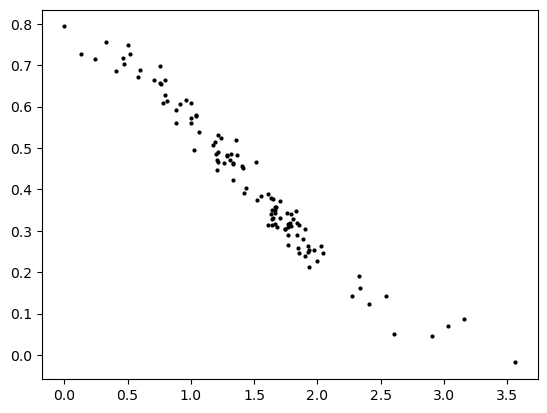

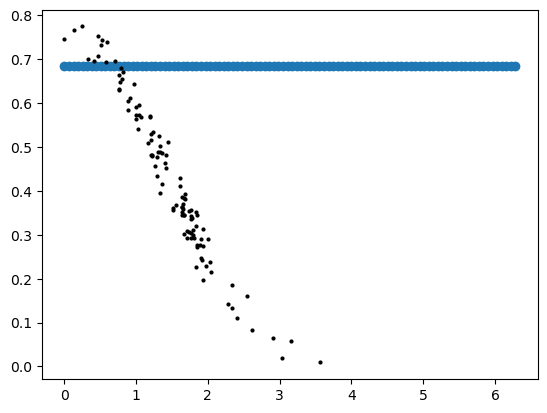

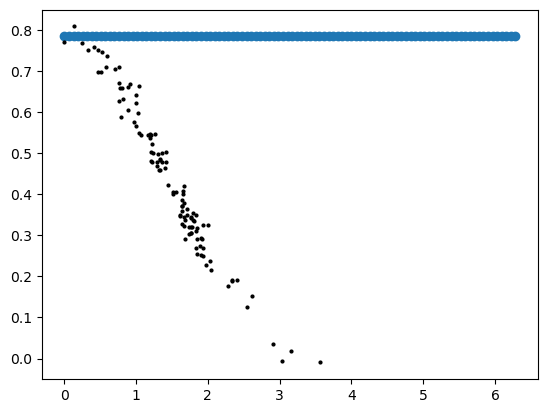

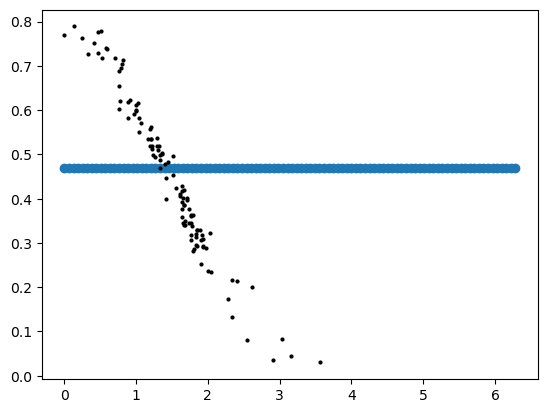

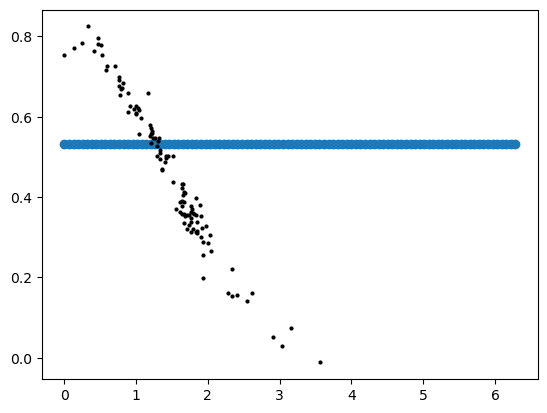

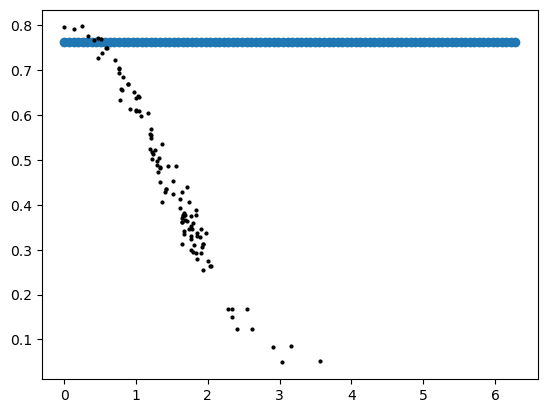

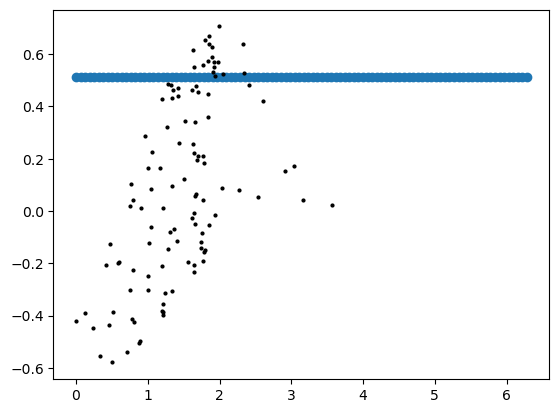

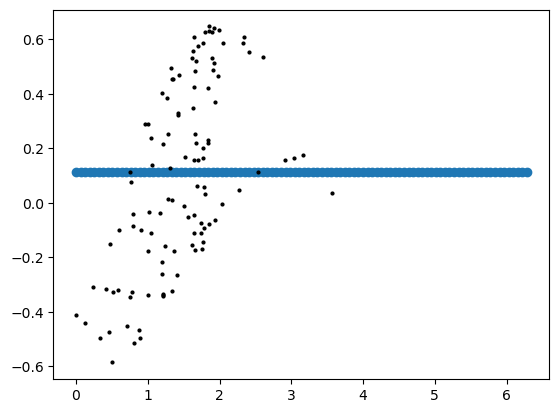

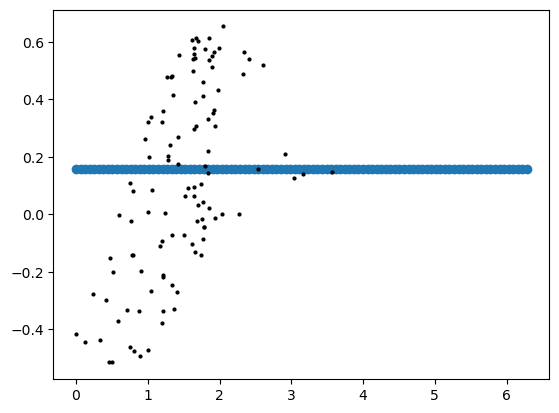

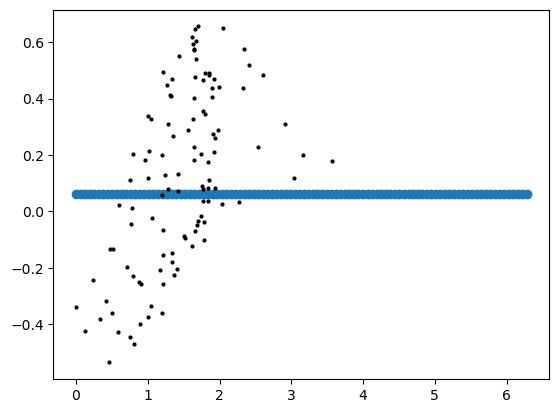

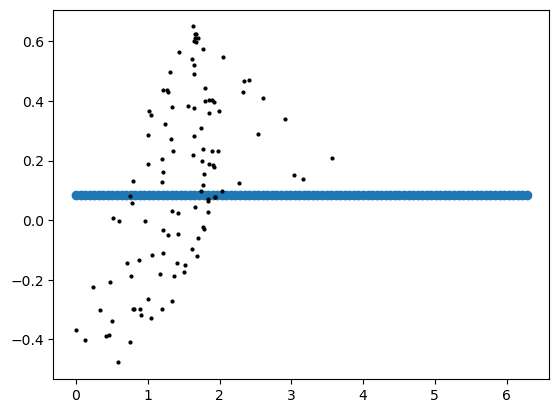

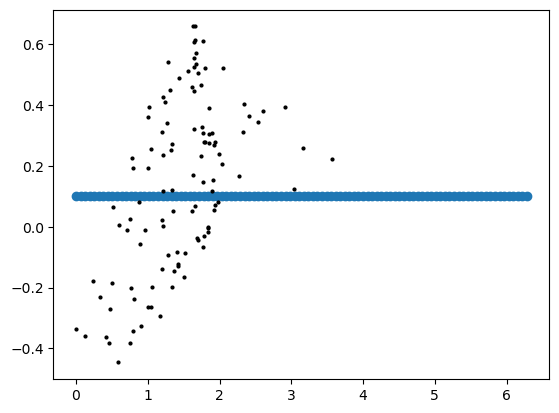

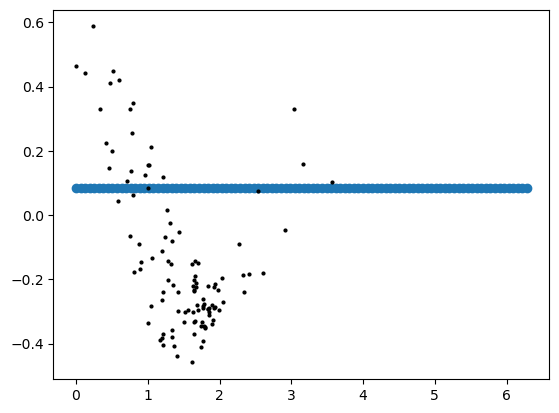

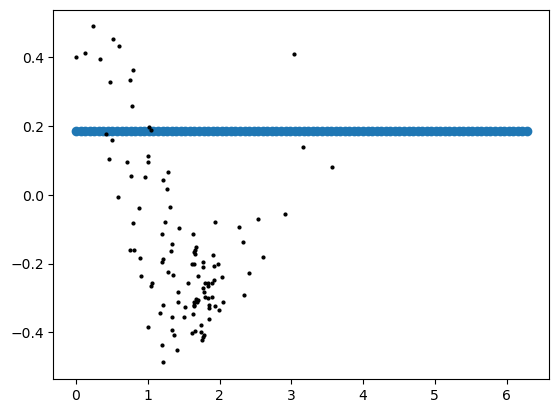

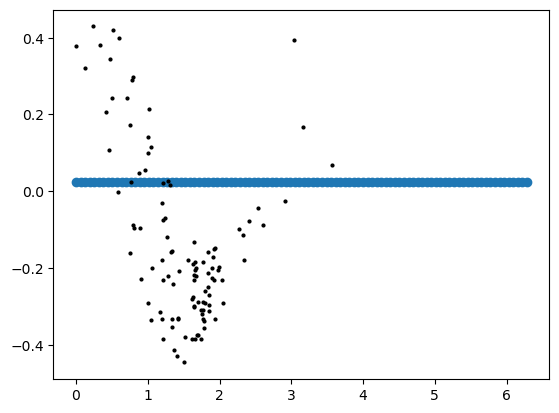

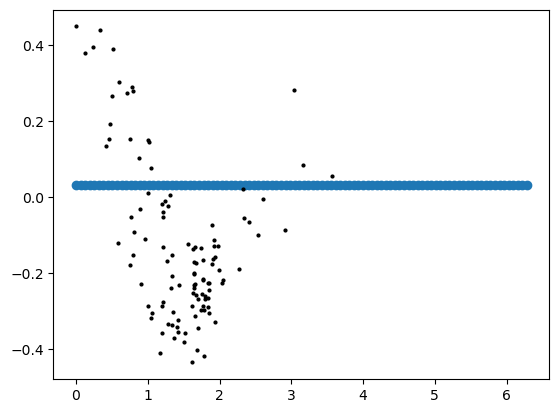

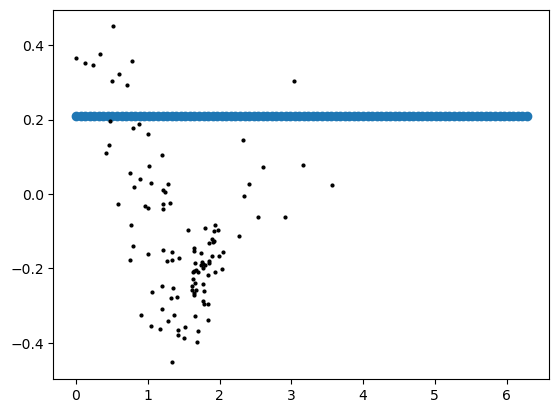

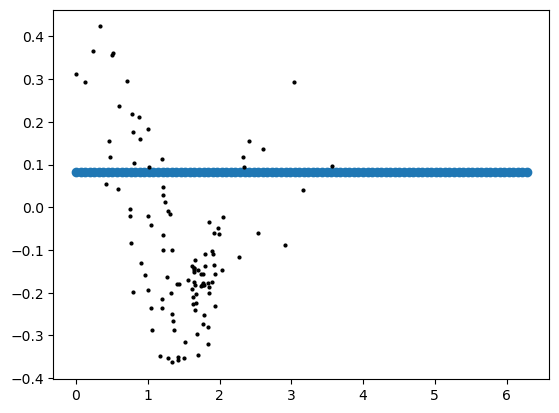

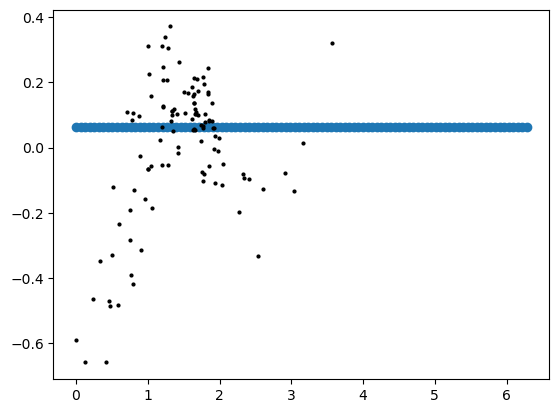

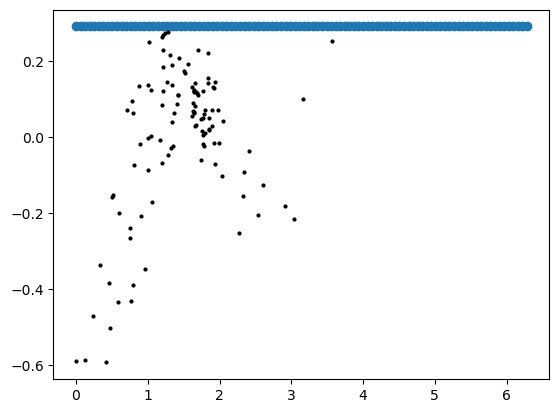

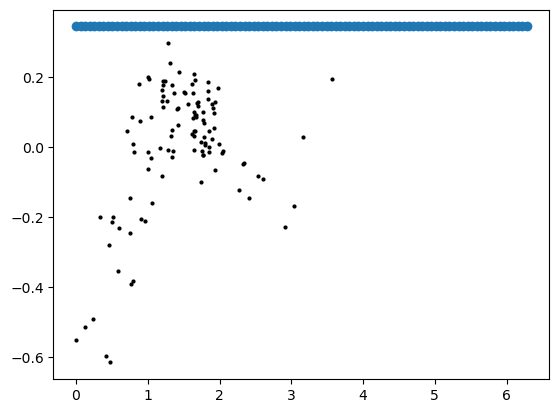

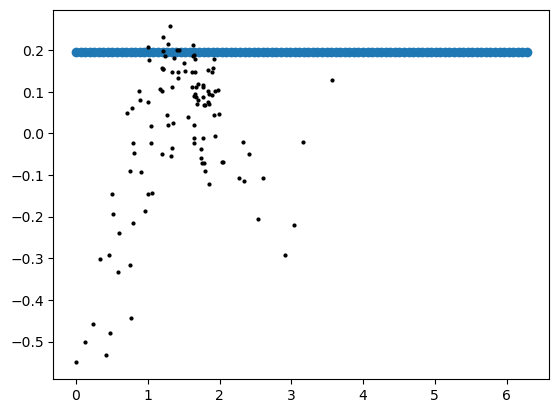

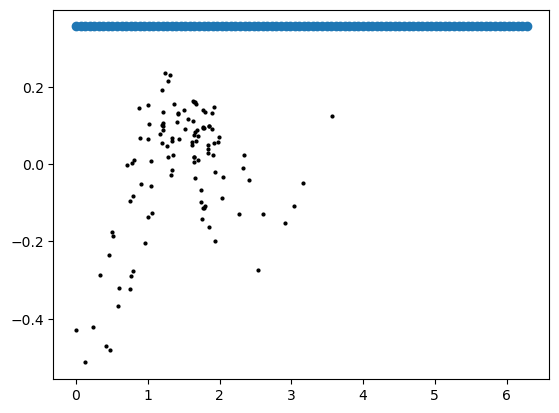

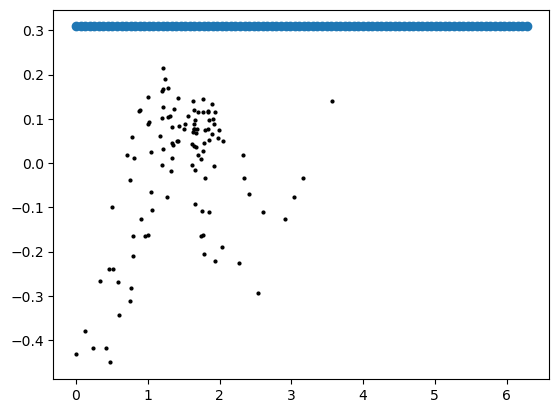

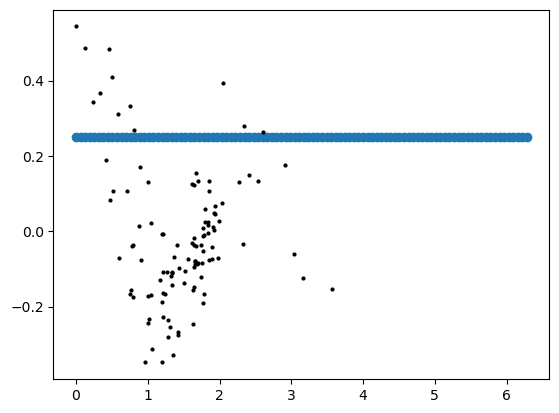

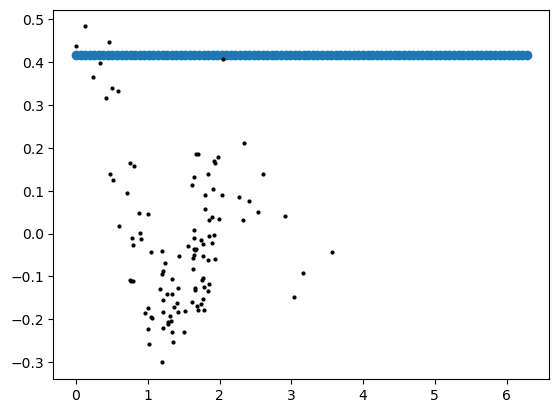

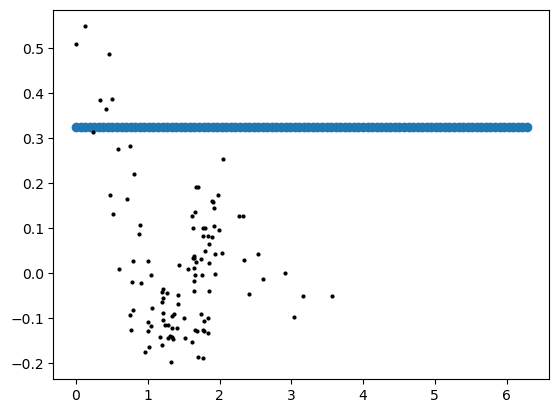

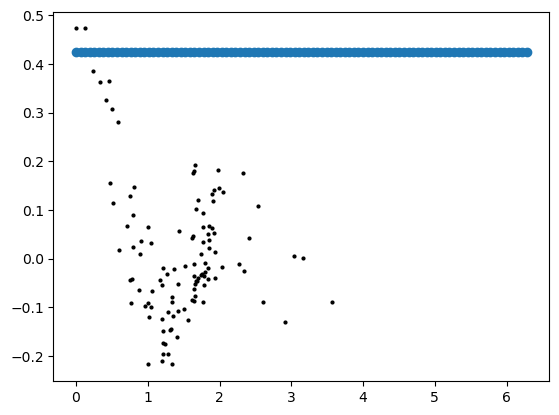

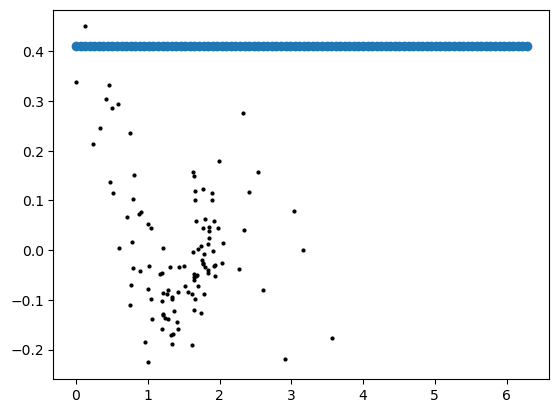

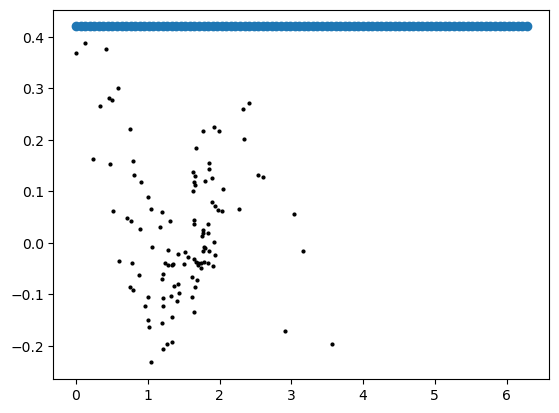

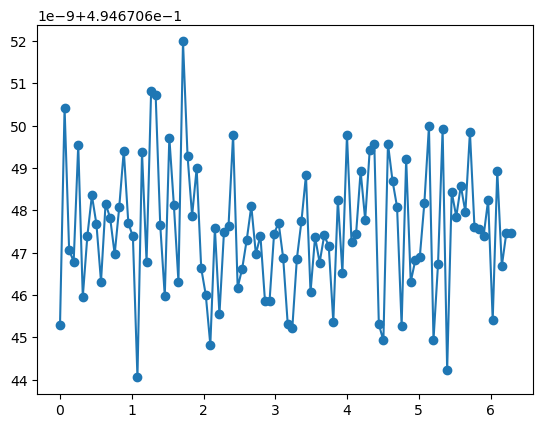

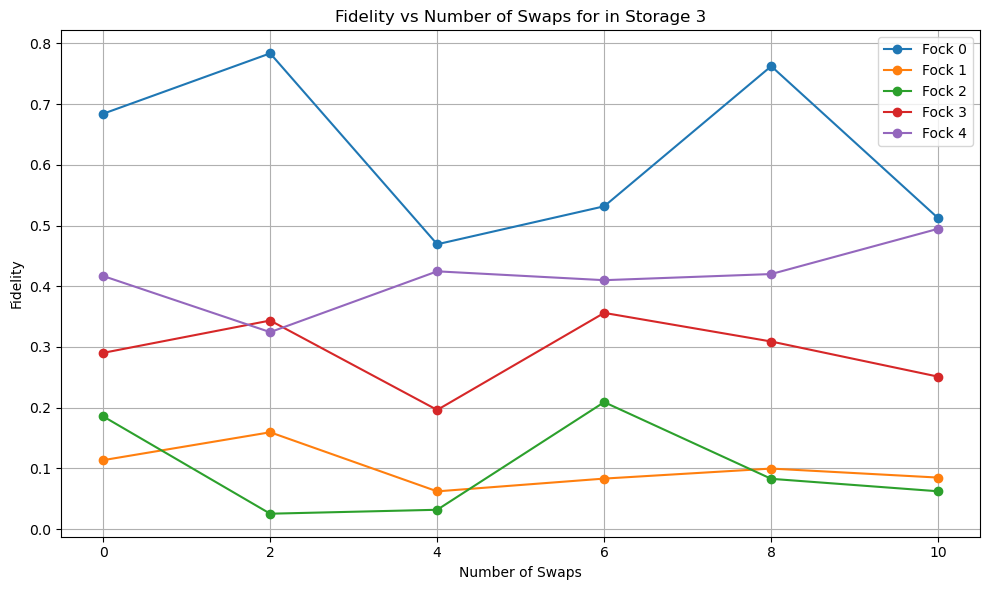

doing 0 swaps for fock 0 in storage 4
Pulse correction is applied


  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

C:\_Lib\python\multimode_expts\fitting_folder\wigner.py:303: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


0.2593804220724623
doing 4 swaps for fock 3 in storage 4
Pulse correction is applied


  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

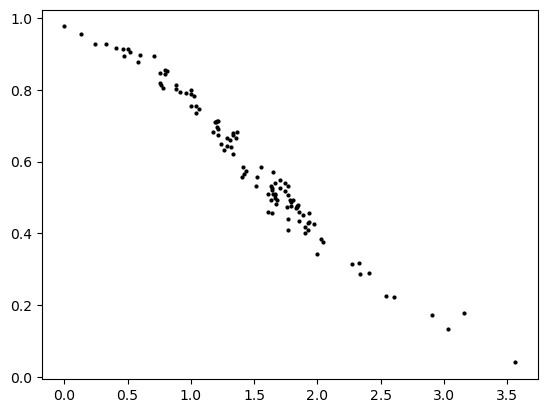

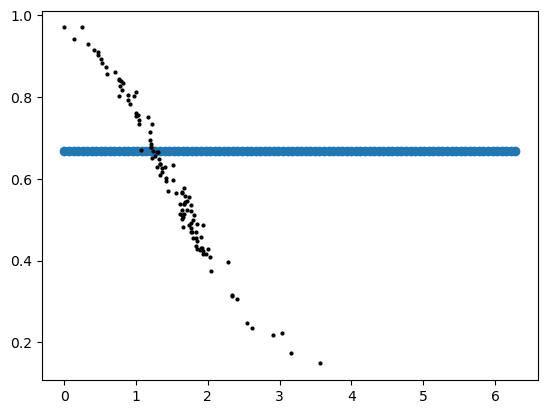

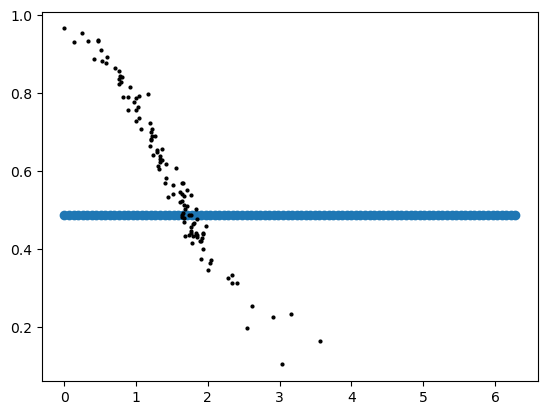

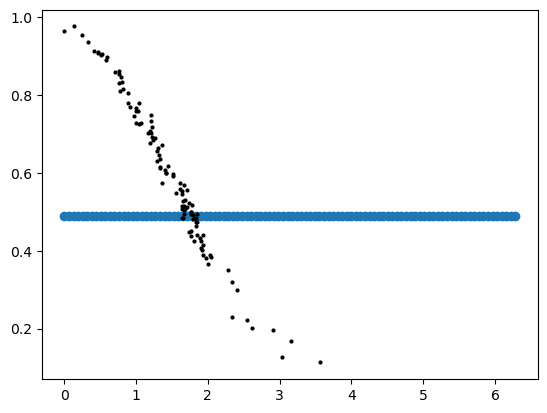

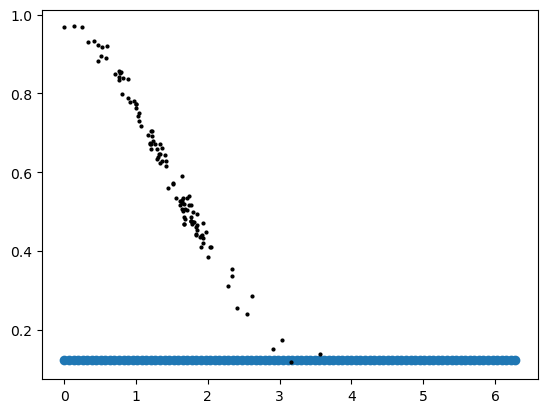

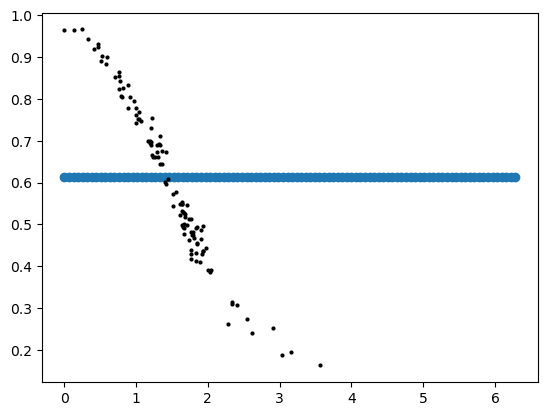

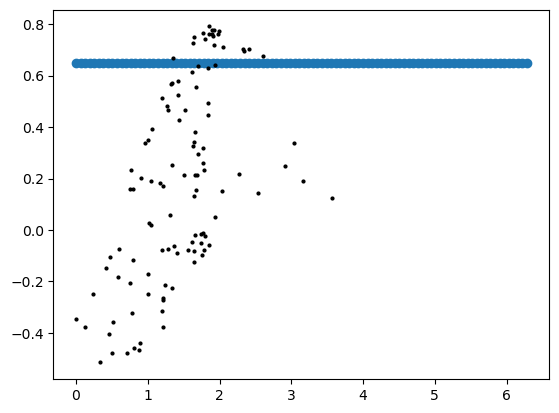

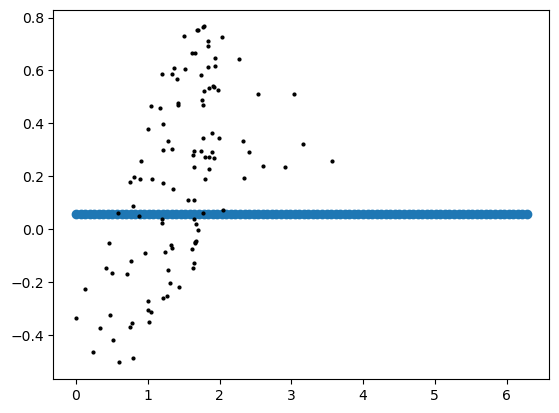

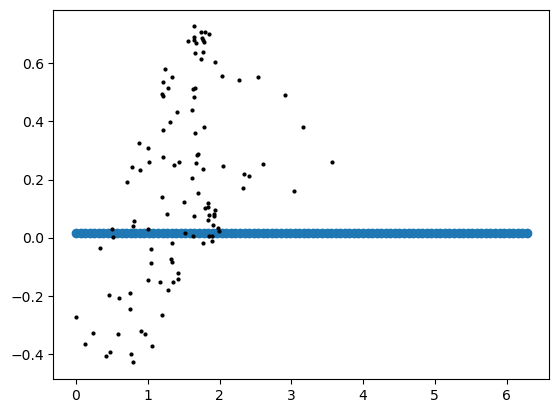

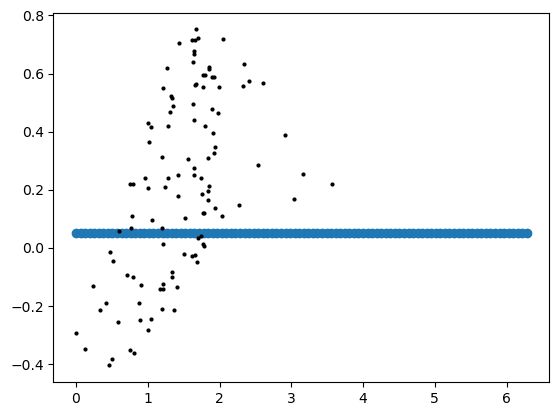

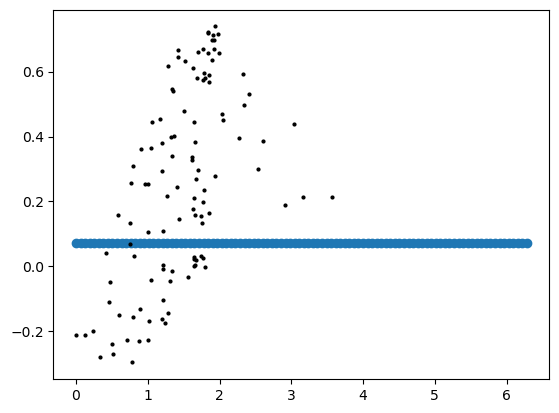

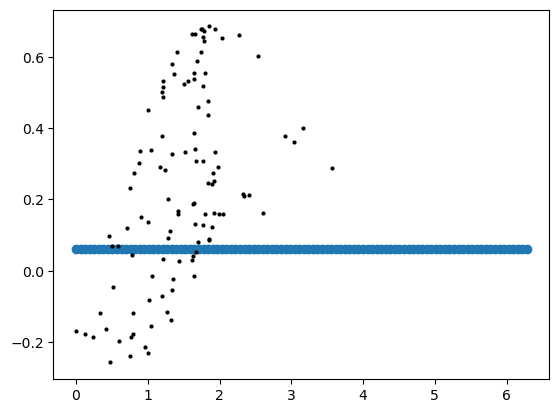

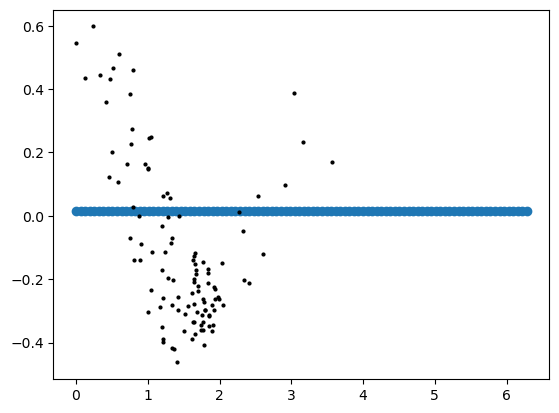

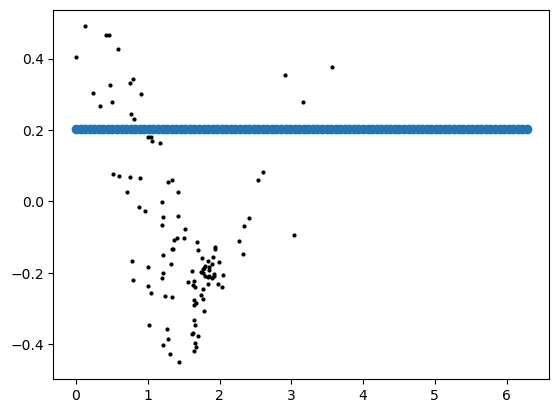

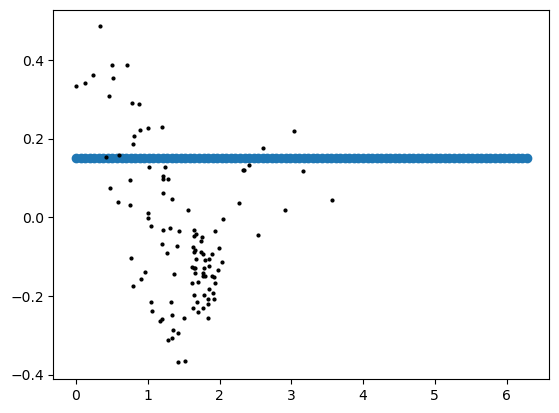

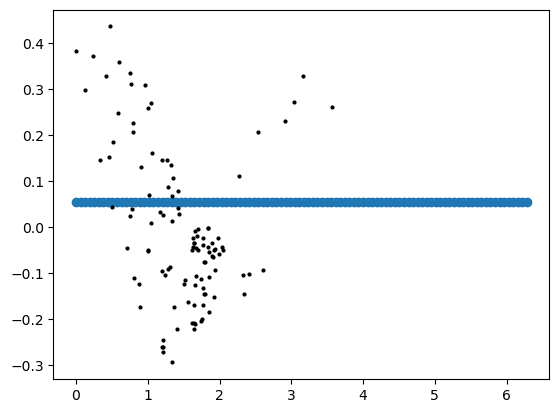

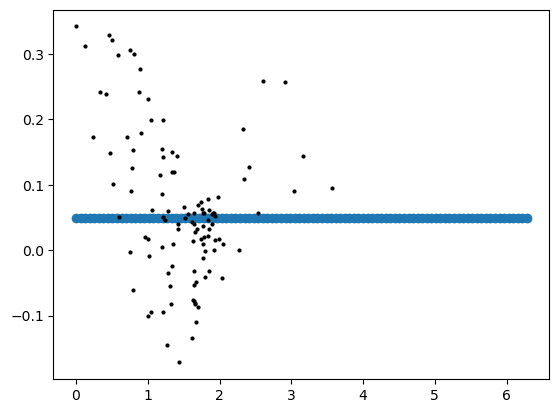

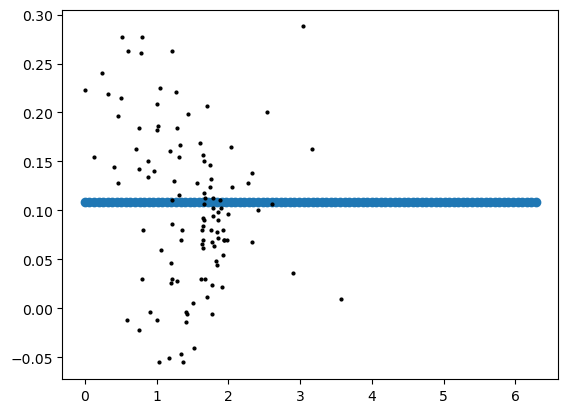

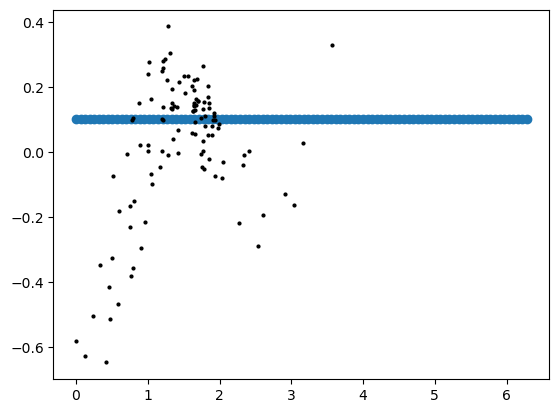

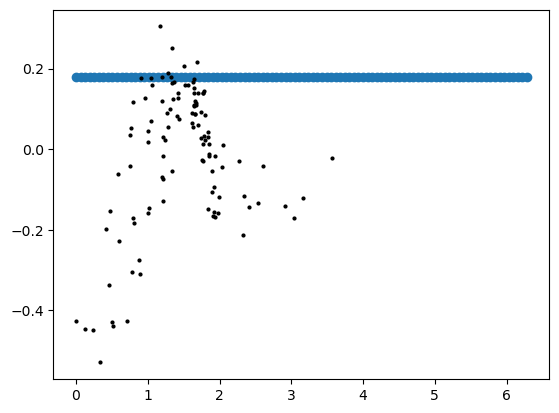

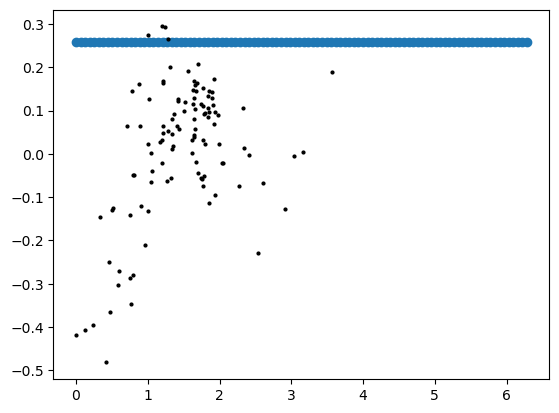

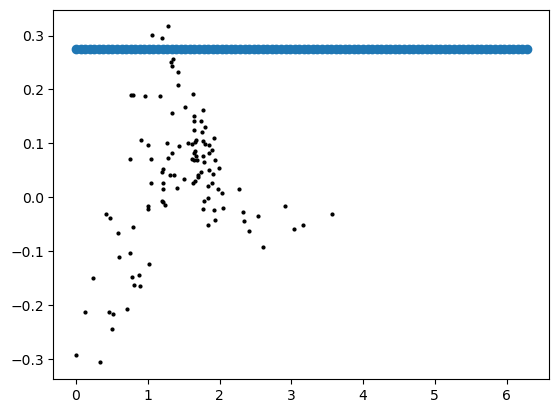

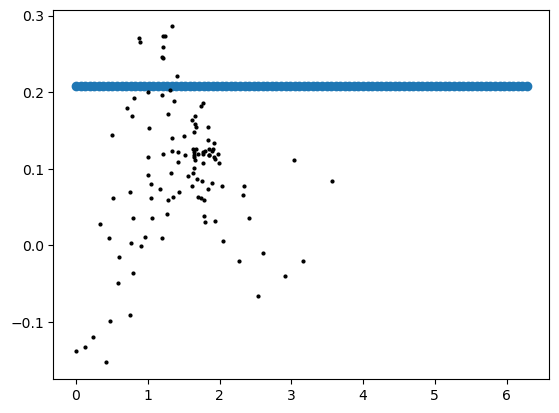

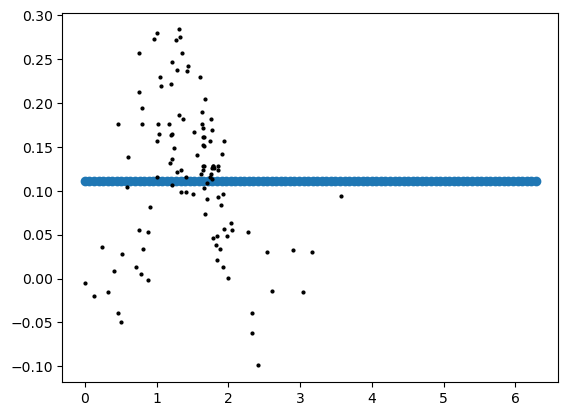

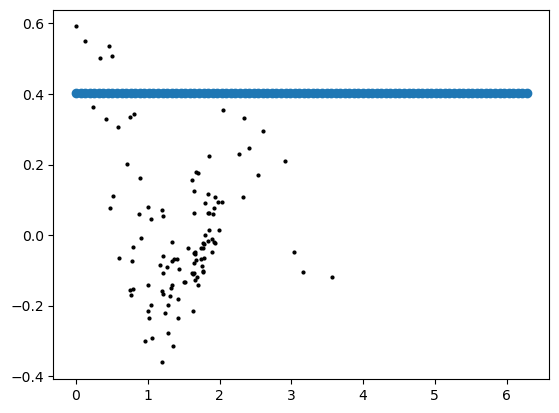

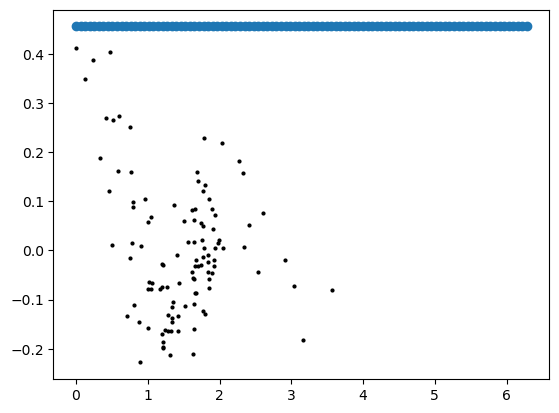

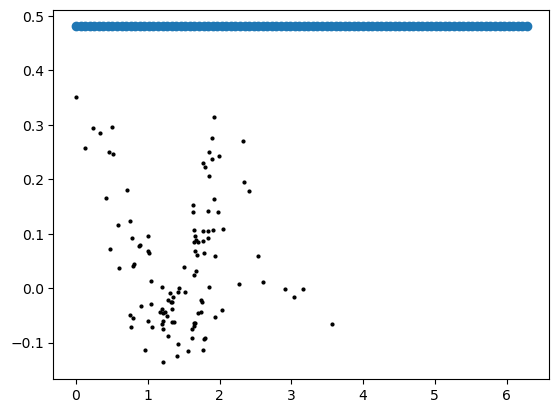

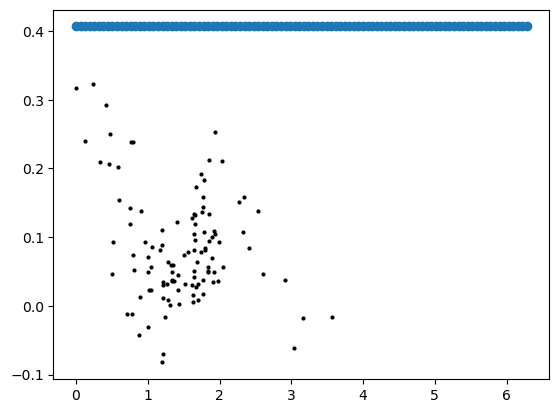

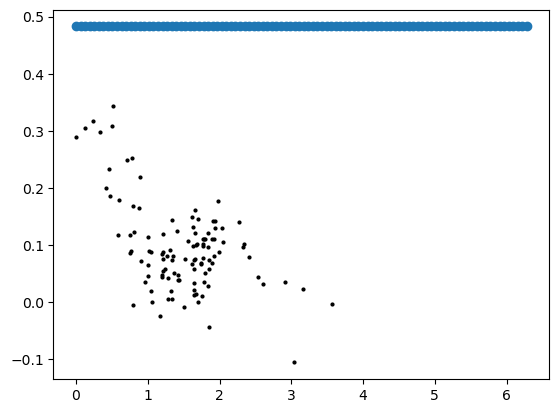

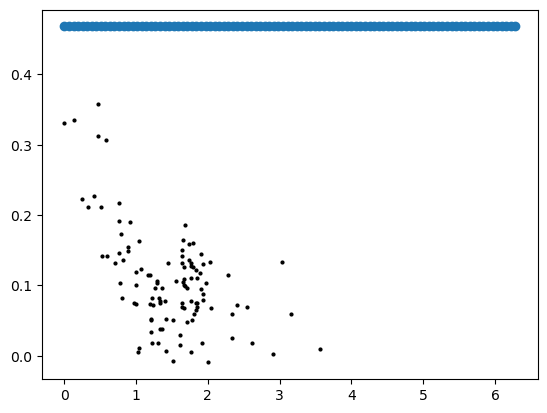

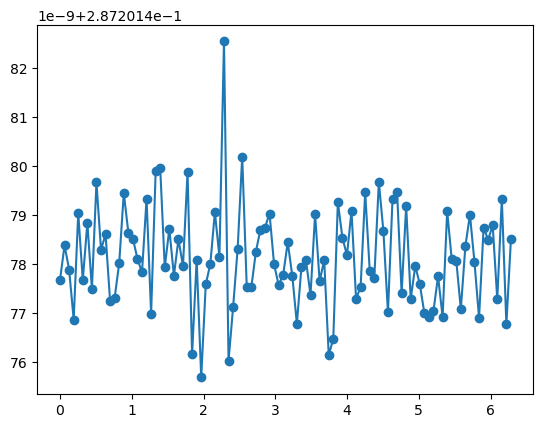

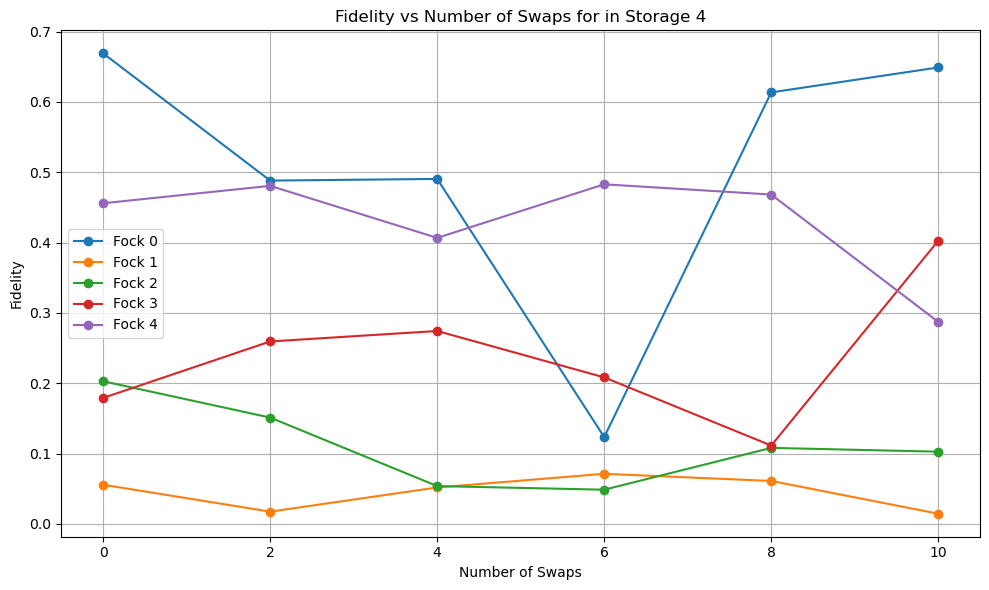

doing 0 swaps for fock 0 in storage 5
Pulse correction is applied


  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

C:\_Lib\python\multimode_expts\fitting_folder\wigner.py:303: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


0.2551917837041946
doing 4 swaps for fock 3 in storage 5
Pulse correction is applied


  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

  0%|          | 0/111 [00:00<?, ?it/s]

phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pulse: 180
phase second pul

KeyboardInterrupt: 

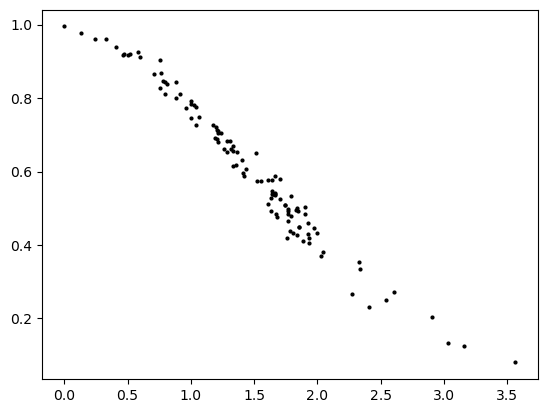

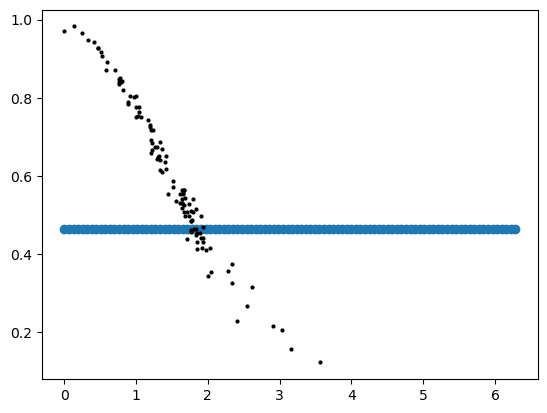

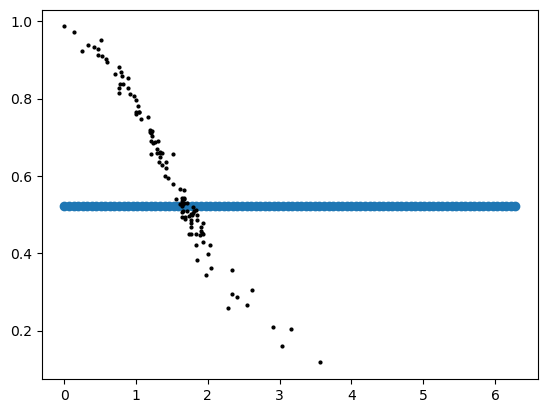

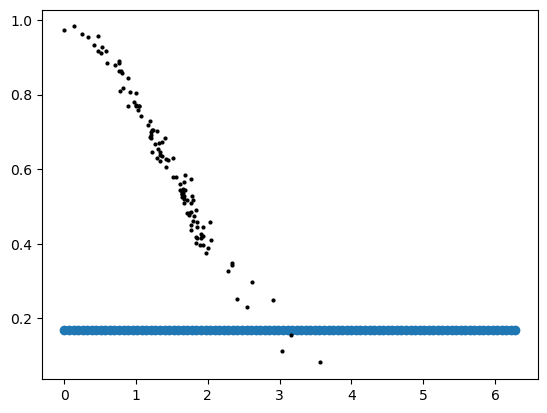

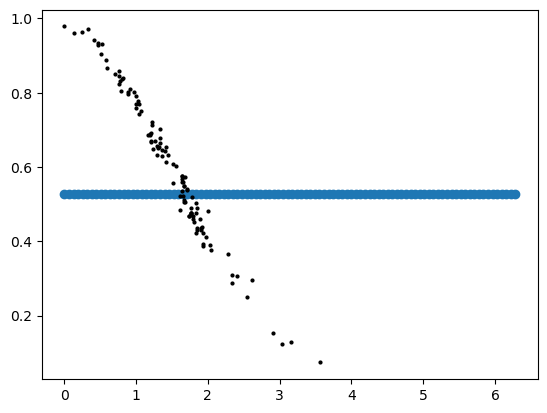

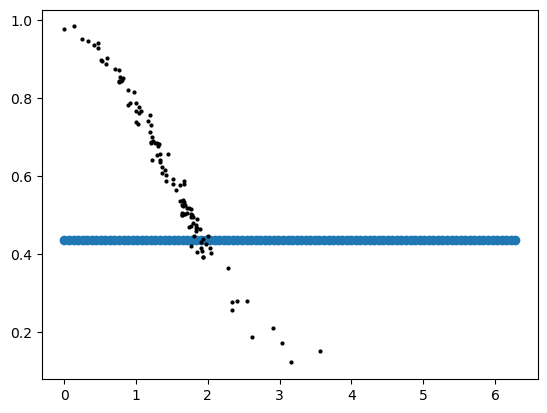

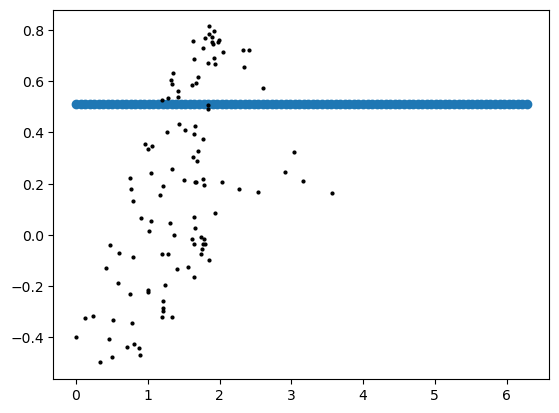

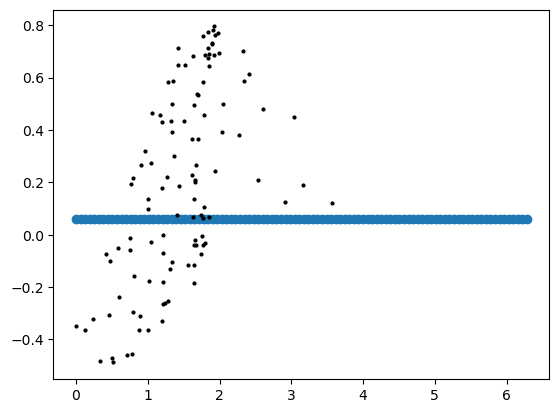

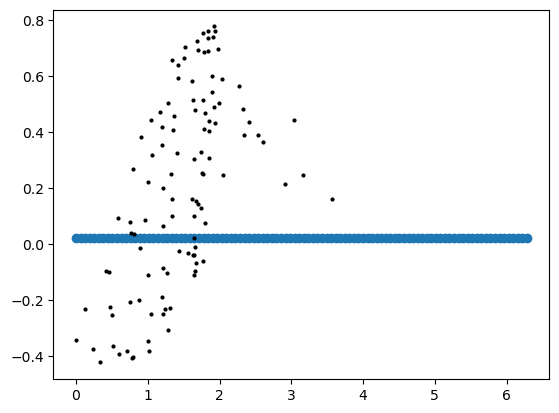

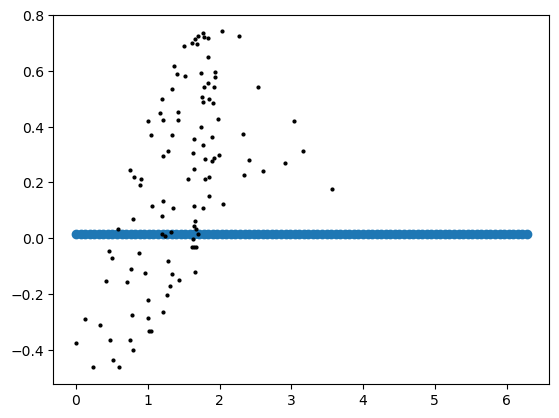

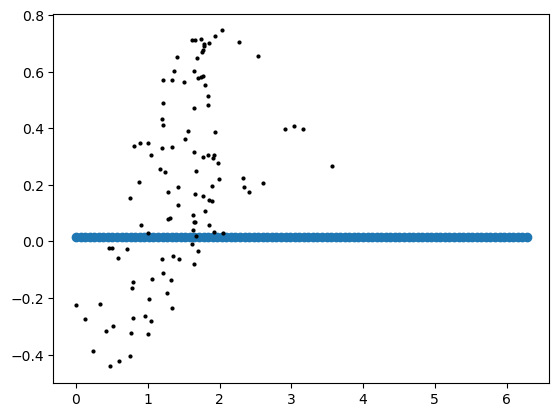

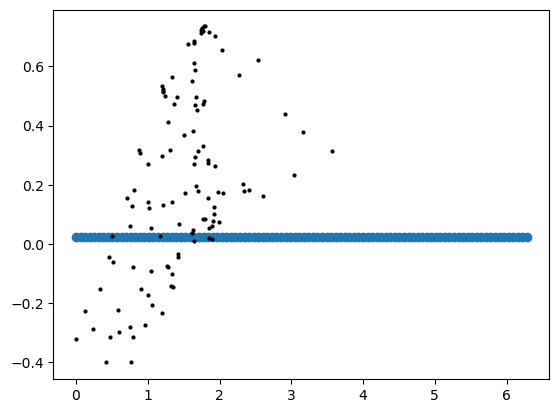

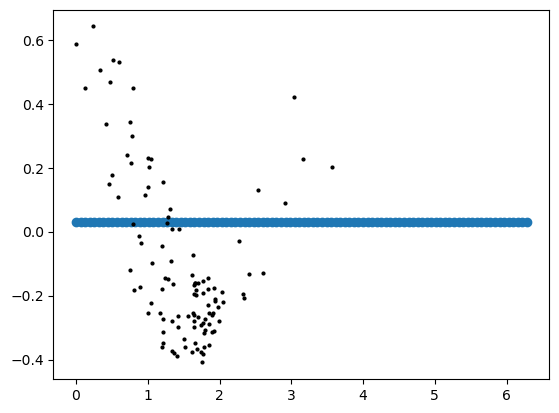

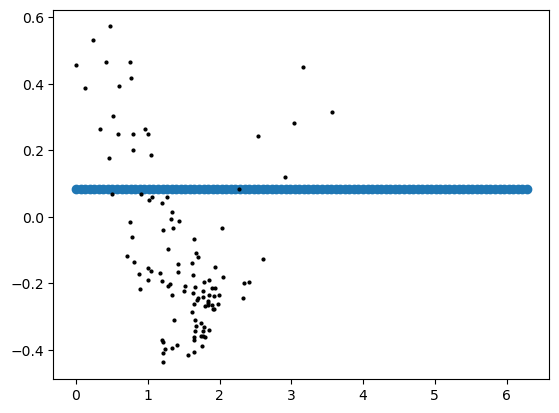

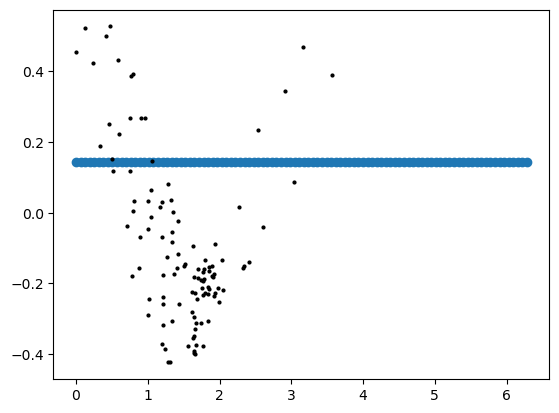

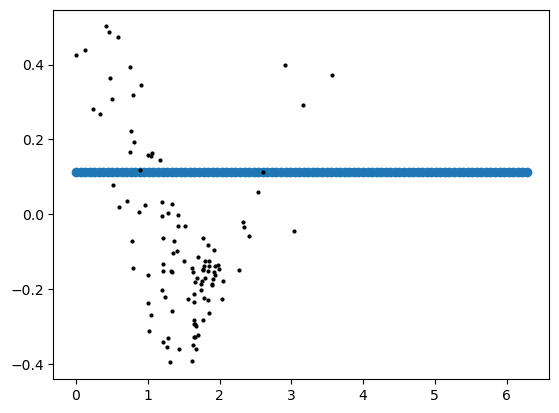

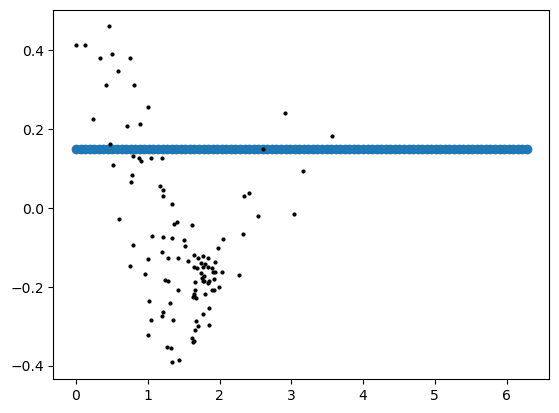

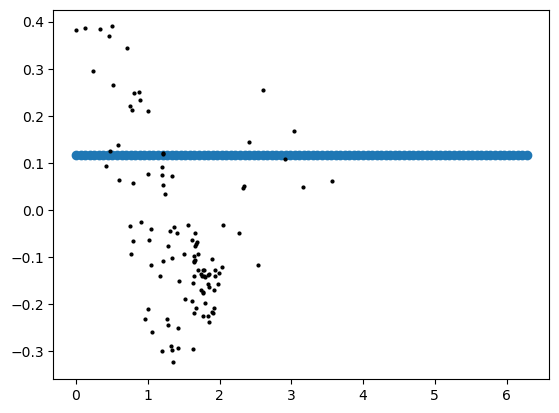

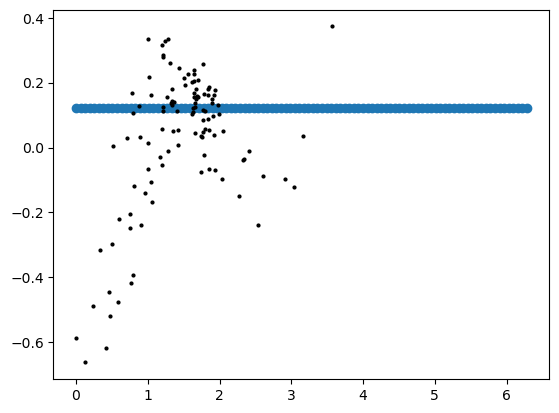

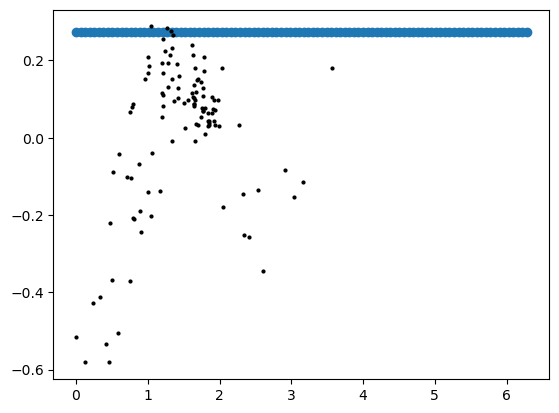

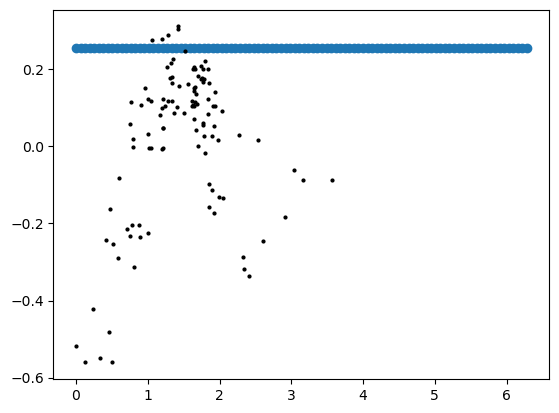

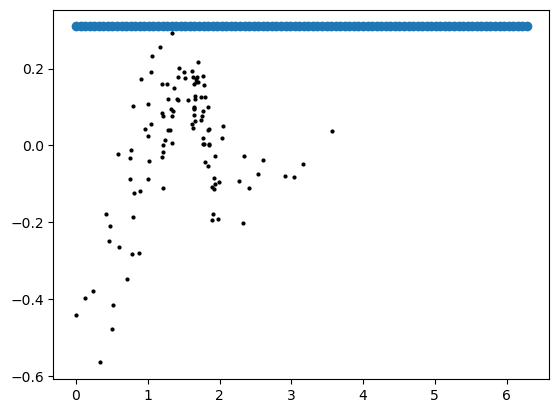

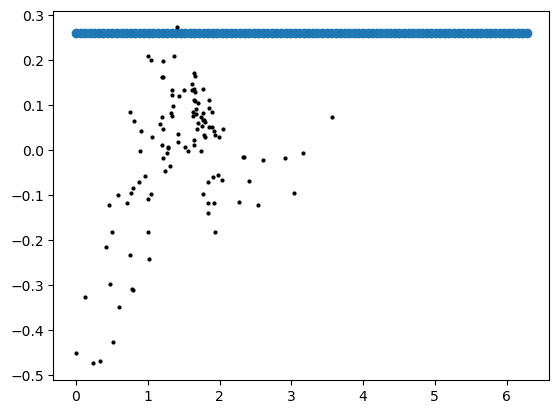

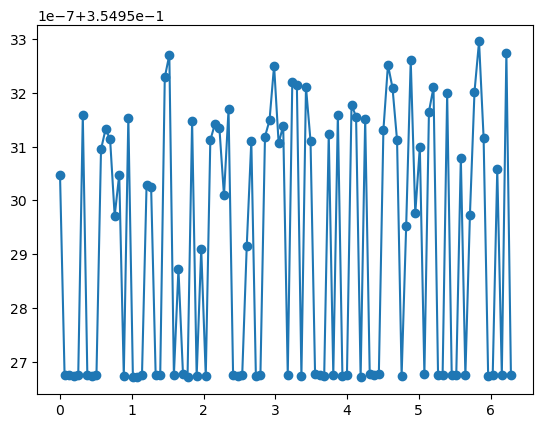

In [ ]:
from fitting_folder.wigner import WignerAnalysis
from qutip import fock  
from slab import AttrDict
import matplotlib.pyplot as plt

stor = 7 #storage number from 1
fock_n = 5 #fock numbers from 0
swap_iter = 6 #even swaps from 0
swaps_plot = [2*i for i in range(swap_iter)]

for k in range(stor): #storage number
    fock_dict = {"fock_"+str(fock_n): [] for fock_n in range(fock_n)}

    for j in range(fock_n): #fock states 0 to 4
        photon = j
        fid_results = []
        
        for i in range(swap_iter): #even no. of swaps from 0 to 10
            swaps = 2*i
            prep_man_pi = mm_base_calib.prep_man_photon(man_no=1, photon_no=photon)
            for s in range(swaps):
                prep_man_pi.append(['storage', 'M1-S'+str(k+1), 'pi', 0])  


            pulse = mm_base_calib.get_prepulse_creator(prep_man_pi).pulse.tolist()
            print(f'doing ' + str(swaps) + ' swaps for fock ' + str(photon) + ' in storage ' + str(k+1))
            wigner = do_wigner_tomography_1mode(
                config_thisrun=expts_base_inst.config_thisrun,
                expt_path=expts_base_inst.expt_path,
                config_path=expts_base_inst.config_file,
                displace_length=0.05,
                reps = 1000,
                displacement_path=return_dict['path'],
                prepulse=True,
                pre_sweep_pulse=pulse,
                gate_based = False,
                # relax_delay=8000
                relax_delay=5000
            )

            wigner_analysis = WignerAnalysis(wigner.data, config=wigner.cfg, mode_state_num=10, alphas = wigner.data['alpha'])
            initial_state = (fock(wigner_analysis.m, photon)).unit() 
            allocated_counts = wigner_analysis.bin_ss_data()
            p_e = allocated_counts # Probability of measuring the state |e
            p_g = 1 - allocated_counts  # Probability of measuring the state |g
            plt.plot(np.abs(wigner.data['alpha']), (p_g-p_e), 'o', markersize=2, color='black')
            results = wigner_analysis.wigner_analysis_results((p_g-p_e), initial_state=initial_state, rotate=True)
            print(results['fidelity'])
            fid_results += [results['fidelity']]
            

        print(f'Fidelity-swap results for fock ' +str(j) + ' in storage ' + str(k+1) + ':')
        print(fid_results)
        print(swaps_plot)
        fock_dict['fock_'+str(j)].append(fid_results)

    print(f'Storage {k+1} swap fidelity results:')
    print(fock_dict)
    plt.figure(figsize=(10, 6))    
    for l in range(fock_n):
        fock_i = fock_dict['fock_'+str(l)][0]
        plt.plot(swaps_plot, fock_i, marker='o', label='Fock ' + str(l))
    plt.xlabel('Number of Swaps')
    plt.ylabel('Fidelity')
    plt.title(f'Fidelity vs Number of Swaps for in Storage ' + str(k+1))
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # current_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
    # filename = title.replace(' ', '_').replace(':', '') + '.png'
    # self.save_plot(fig, filename=filename)

## Wigner Tomography of |0+2>

In [ ]:
from MM_dual_rail_base import MM_dual_rail_base
mm_base_dummy = MM_dual_rail_base(expts_base_inst.config_thisrun)
prep_02_pulse = []
prep_02_pulse.append(['qubit', 'ge', 'hpi', 0]) # g0 + e0 
prep_02_pulse.append(['qubit', 'ef', 'pi', 0]) # g0 + f0 
prep_02_pulse.append(['qubit', 'ge', 'pi', 0])# e0 + f0
prep_02_pulse.append(['multiphoton', 'f0-g1', 'pi', 0]) # e0 + g1 
prep_02_pulse.append(['multiphoton', 'g0-e0', 'pi', 0]) # g0 + e1
prep_02_pulse.append(['multiphoton', 'e1-f1', 'pi', 0]) # g0 + f1 
prep_02_pulse.append(['multiphoton', 'f1-g2', 'pi', 0]) # g0 + g2
prep_02_pulse
## convert it to low level pulse 
pulse_02 = mm_base_dummy.get_prepulse_creator(prep_02_pulse).pulse.tolist()
pulse_02

[['qubit', 'ge', 'hpi', 0],
 ['qubit', 'ef', 'pi', 0],
 ['qubit', 'ge', 'pi', 0],
 ['multiphoton', 'f0-g1', 'pi', 0],
 ['multiphoton', 'g0-e0', 'pi', 0],
 ['multiphoton', 'e1-f1', 'pi', 0],
 ['multiphoton', 'f1-g2', 'pi', 0]]

## Wigner Tomography of |0> + |1>

### Debugging

##### Histogram Prepulse

In [700]:
def do_histogram_prepulse_experiment(
    reps=10000,
    qubits=[0],
    active_reset=False,
    man_reset=True,
    storage_reset=True,
    prepulse=False,
    pre_sweep_pulse=None,
    gate_based=True,
    preloaded_pulses=False,
    use_arb_waveform=False,
    expts_base_inst=None,
    expt_path=None,
    config_path=None,
    config_thisrun=None,
    relax_delay=2500
):
    """
    Run the Histogram Prepulse Experiment with configurable parameters.
    """
        
    expt_cfg = {
        'reps': reps,
        'qubits': qubits,
        'active_reset': active_reset,
        'man_reset': man_reset,
        'storage_reset': storage_reset,
        'prepulse': prepulse,
        'pre_sweep_pulse': pre_sweep_pulse,
        'gate_based': gate_based,
        'preloaded_pulses': preloaded_pulses,
        'use_arb_waveform': use_arb_waveform
    }
    histogram_exp = expts_base_inst.meas.single_qubit.single_shot_prepulse.HistogramPrepulseExperiment(
        soccfg=expts_base_inst.soc, path=expt_path, prefix='HistogramPrepulseExperiment', config_file=config_path
    )
    histogram_exp.cfg = AttrDict(deepcopy(config_thisrun))
    histogram_exp.cfg.expt = expt_cfg
    histogram_exp.go(analyze=False, display=False, progress=True, save=True)
    return histogram_exp


In [703]:
historgam_exp = do_histogram_prepulse_experiment(
    reps=10000,
    qubits=[0],
    expts_base_inst=expts_base_inst,
    expt_path=expts_base_inst.expt_path,
    config_path=expts_base_inst.config_file,
    config_thisrun=expts_base_inst.config_thisrun,
    prepulse=True,
    gate_based=True,
    pre_sweep_pulse=[['qubit', 'ge', 'hpi', 0]],  # Use the prepulse pulse created above
)

[[3567.346809921427]
 [4852]
 [0.0]
 [0]
 [2]
 ['gauss']
 [0.035]]


  0%|          | 0/10000 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00003_HistogramPrepulseExperiment.h5


In [704]:
historgam_exp.data['I'].shape

(10000,)

Proportion of points below threshold -314: 0.529 (5295/10000)


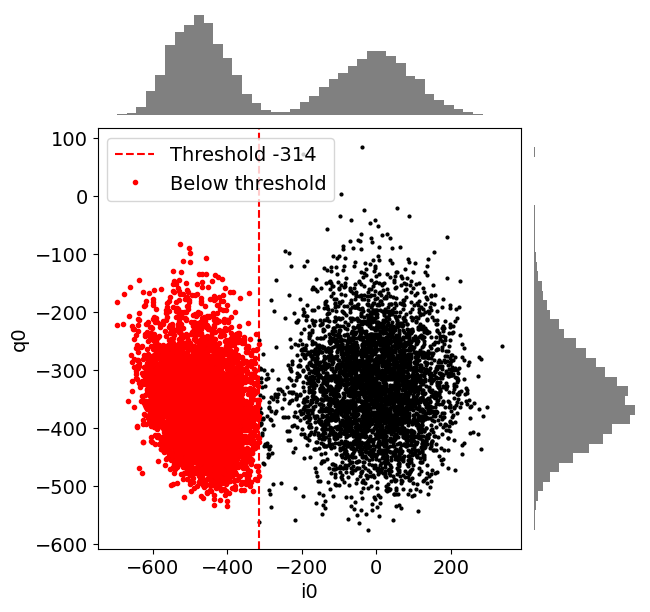

In [705]:
from matplotlib import gridspec


# i, q
# plt.plot(wigner_exp_01.data['i0'][0][0], wigner_exp_01.data['q0'][0][0], 'o', markersize=2, color='black')
# Plot histograms along x and y axes

# Get data
x = historgam_exp.data['I']
y = historgam_exp.data['Q']



# Create a figure with gridspec for scatter and histograms
fig = plt.figure(figsize=(7, 7))
gs = gridspec.GridSpec(2, 2, width_ratios=[4, 1], height_ratios=[1, 4],
                       wspace=0.05, hspace=0.05)

ax_scatter = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax_scatter)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax_scatter)

# Scatter plot
ax_scatter.plot(x, y, 'o', markersize=2, color='black')
ax_scatter.set_xlabel('i0')
ax_scatter.set_ylabel('q0')

# X histogram
ax_histx.hist(x, bins=40, color='gray')
ax_histx.axis('off')

# Y histogram
ax_histy.hist(y, bins=40, orientation='horizontal', color='gray')
ax_histy.axis('off')

threshold = -314
below_threshold = x < threshold
proportion_below = np.sum(below_threshold) / len(x)
print(f"Proportion of points below threshold {threshold}: {proportion_below:.3f} ({np.sum(below_threshold)}/{len(x)})")

# Plot threshold line and highlight points below threshold
ax_scatter.axvline(threshold, color='red', linestyle='--', label=f'Threshold {threshold}')
ax_scatter.plot(x[below_threshold], y[below_threshold], 'ro', markersize=3, label='Below threshold')
ax_scatter.legend()

plt.show()

In [645]:
from MM_dual_rail_base import MM_dual_rail_base
mm_base_dummy = MM_dual_rail_base(expts_base_inst.config_thisrun)

prep_01_pulse = [['qubit', 'ge', 'hpi', 0], # g0 + e0 
['qubit', 'ef', 'pi', 0], # g0 + f0 
['multiphoton', 'f0-g1', 'pi', 0]] # e0 + g1 
## convert it to low level pulse 
pulse_01 = mm_base_dummy.get_prepulse_creator(prep_01_pulse).pulse.tolist()
pulse_01

[[3567.346809921427, 3423.9866806417763, 2005.9],
 [4636, 8221, 15000],
 [0.0, 0.0, 1.082052142],
 [0, 0, 0],
 [2, 2, 0],
 ['g', 'g', 'flat_top'],
 [0.035, 0.035, 0.005]]

In [652]:
# choose alphas along 3 axes 
alpha_list = np.linspace(0, 1, 10) 
phase_across_three_axes = np.array([0, 90, 180])  # in degrees
alphas = []
for phase in phase_across_three_axes:
    alphas.append(alpha_list * np.exp(1j * np.deg2rad(phase)))
alpha_list_full = np.concatenate(alphas)
alpha_list_full
f_path = expts_base_inst.expt_path + '\\alphas.npy'
np.save(f_path, alpha_list_full)


In [653]:
alpha_list_full

array([ 0.00000000e+00+0.00000000e+00j,  1.11111111e-01+0.00000000e+00j,
        2.22222222e-01+0.00000000e+00j,  3.33333333e-01+0.00000000e+00j,
        4.44444444e-01+0.00000000e+00j,  5.55555556e-01+0.00000000e+00j,
        6.66666667e-01+0.00000000e+00j,  7.77777778e-01+0.00000000e+00j,
        8.88888889e-01+0.00000000e+00j,  1.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j,  6.80359333e-18+1.11111111e-01j,
        1.36071867e-17+2.22222222e-01j,  2.04107800e-17+3.33333333e-01j,
        2.72143733e-17+4.44444444e-01j,  3.40179666e-17+5.55555556e-01j,
        4.08215600e-17+6.66666667e-01j,  4.76251533e-17+7.77777778e-01j,
        5.44287466e-17+8.88888889e-01j,  6.12323400e-17+1.00000000e+00j,
       -0.00000000e+00+0.00000000e+00j, -1.11111111e-01+1.36071867e-17j,
       -2.22222222e-01+2.72143733e-17j, -3.33333333e-01+4.08215600e-17j,
       -4.44444444e-01+5.44287466e-17j, -5.55555556e-01+6.80359333e-17j,
       -6.66666667e-01+8.16431199e-17j, -7.77777778

In [668]:
# Now doing wigner tomography at these 3 points of 0 + 1
wigner_exp_01 = do_wigner_tomography_1mode(
    config_thisrun=expts_base_inst.config_thisrun,
    expt_path=expts_base_inst.expt_path,
    config_path=expts_base_inst.config_file,
    displace_length=0.05,
    reps = 5000,
    displacement_path=f_path,
    prepulse=True,
    pre_sweep_pulse=pulse_01,
    gate_based = False,
    relax_delay=2500
)

man mode no: 1


  0%|          | 0/30 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00025_WignerTomography1ModeExperiment.h5


In [669]:
wigner_analysis = WignerAnalysis(wigner_exp_01.data, config=wigner_exp_01.cfg, mode_state_num=10, alphas = wigner_exp_01.data['alpha'])
initial_state = (fock(wigner_analysis.m, 1)  + fock(wigner_analysis.m, 0)).unit() # Initial state |0> ?? 1,2, o4 [1,2]
allocated_counts = wigner_analysis.bin_ss_data()
p_e = allocated_counts # Probability of measuring the state |e
p_g = 1 - allocated_counts  # Probability of measuring the state |g
wigner_expec = 2/np.pi * (p_g - p_e)  # Wigner expectation value

(5000, 30)


In [670]:
wigner_expec

array([0.08557926, 0.1117689 , 0.17499438, 0.20515214, 0.22314098,
       0.27287484, 0.261235  , 0.24377524, 0.2257864 , 0.16070913,
       0.10250994, 0.11917607, 0.15912188, 0.18531151, 0.17896251,
       0.25462145, 0.22076011, 0.23345811, 0.17869797, 0.17393621,
       0.11203344, 0.09430914, 0.12367328, 0.13372587, 0.15621192,
       0.20726848, 0.20859119, 0.20356489, 0.16361909, 0.15224379])

slice(0, 10, None)
slice(10, 20, None)
slice(20, 30, None)


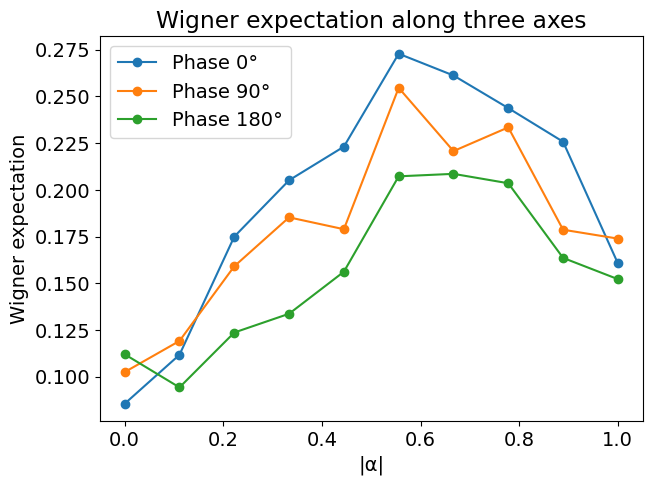

In [671]:
import numpy as np

wigner_exp_01.data['alpha']
# the array above contains alphas along the three axes, for each axes plot the corresponding wigner exppec
# I expec 3 traces on a single plot, one for each angle 
import matplotlib.pyplot as plt

alphas = wigner_exp_01.data['alpha']
wigner_expec = 2/np.pi * (p_g - p_e)

# There are 3 axes, so split the data accordingly
num_axes = 3
N = len(alphas) // num_axes

plt.figure(figsize=(7, 5))
for i, phase in enumerate(phase_across_three_axes):
    idx = slice(i*N, (i+1)*N)
    print(idx)
    plt.plot(np.abs(alphas[idx]), wigner_expec[idx], 'o-', label=f'Phase {phase}°')
plt.xlabel('|α|')
plt.ylabel('Wigner expectation')
plt.title('Wigner expectation along three axes')
plt.legend()
plt.show()

In [661]:
np.shape(wigner_exp_01.data['i0'])

(30, 1, 1000)

Proportion of points below threshold -300: 0.575 (575/1000)


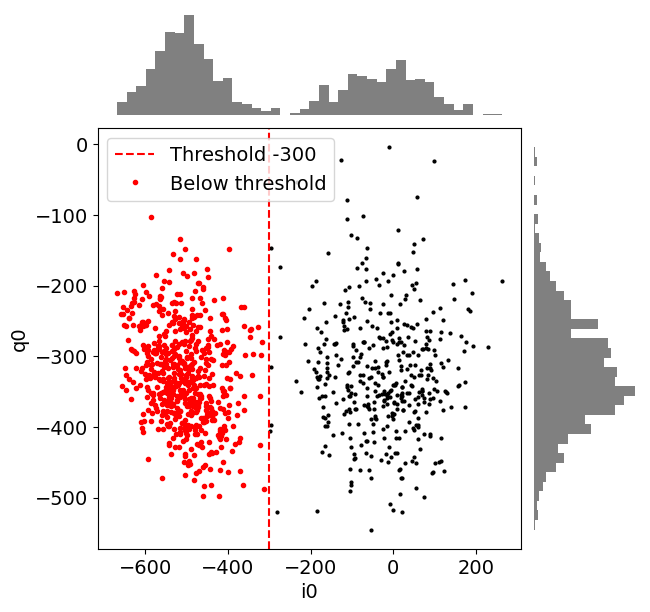

In [667]:
from matplotlib import gridspec


# i, q
# plt.plot(wigner_exp_01.data['i0'][0][0], wigner_exp_01.data['q0'][0][0], 'o', markersize=2, color='black')
# Plot histograms along x and y axes

# Get data
x = wigner_exp_01.data['i0'][0][0]
y = wigner_exp_01.data['q0'][0][0]



# Create a figure with gridspec for scatter and histograms
fig = plt.figure(figsize=(7, 7))
gs = gridspec.GridSpec(2, 2, width_ratios=[4, 1], height_ratios=[1, 4],
                       wspace=0.05, hspace=0.05)

ax_scatter = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax_scatter)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax_scatter)

# Scatter plot
ax_scatter.plot(x, y, 'o', markersize=2, color='black')
ax_scatter.set_xlabel('i0')
ax_scatter.set_ylabel('q0')

# X histogram
ax_histx.hist(x, bins=40, color='gray')
ax_histx.axis('off')

# Y histogram
ax_histy.hist(y, bins=40, orientation='horizontal', color='gray')
ax_histy.axis('off')

threshold = -300
below_threshold = x < threshold
proportion_below = np.sum(below_threshold) / len(x)
print(f"Proportion of points below threshold {threshold}: {proportion_below:.3f} ({np.sum(below_threshold)}/{len(x)})")

# Plot threshold line and highlight points below threshold
ax_scatter.axvline(threshold, color='red', linestyle='--', label=f'Threshold {threshold}')
ax_scatter.plot(x[below_threshold], y[below_threshold], 'ro', markersize=3, label='Below threshold')
ax_scatter.legend()

plt.show()

In [ ]:
# 

In [663]:
wigner_exp_01.cfg.device.readout

{'trig_offset': [450],
 'frequency': [748.8],
 'gain': [800],
 'phase': [29.79028008324773],
 'threshold': [-301.7609374000881],
 'threshold_list': [[-301.7609374000881]],
 'man1_drive_list': [0.0],
 'man2_drive_list': [0.0],
 'readout_length': [1.5],
 'relax_delay': [2500],
 'confusion_matrix_with_reset': [0.9964530022802125,
  0.0035469977197875036,
  0.013768302080657598,
  0.9862316979193424],
 'confusion_matrix_without_reset': [0.9886,
  0.011399999999999966,
  0.026,
  0.974],
 'Ie': [-11.637201631964007],
 'Ig': [-501.760937400088]}

### Normal

In [24]:
from MM_dual_rail_base import MM_dual_rail_base
mm_base_dummy = MM_dual_rail_base(expts_base_inst.config_thisrun)

prep_01_pulse = [['qubit', 'ge', 'hpi', 0], # g0 + e0 
['qubit', 'ef', 'pi', 0], # g0 + f0 
['multiphoton', 'f0-g1', 'pi', 0]] # e0 + g1 
## convert it to low level pulse 
pulse_01 = mm_base_dummy.get_prepulse_creator(prep_01_pulse).pulse.tolist()
pulse_01

multiphoton_cfg 3567.3608840739785
Adding pulse ['ge', 'hpi', 0] to channel qubit
Adding pulse ['ef', 'pi', 0] to channel qubit
Adding pulse ['f0-g1', 'pi', 0] to channel multiphoton


[[3567.3506008394015, 3423.990931159239, 2005.8600000000006],
 [5003, 9161, 15000],
 [0.0, 0.0, 1.0955314021401903],
 [0, 0, 0],
 [2, 2, 0],
 ['g', 'g', 'flat_top'],
 [0.035, 0.035, 0.005]]

In [25]:
wigner_exp_01 = do_wigner_tomography_1mode(
    config_thisrun=expts_base_inst.config_thisrun,
    expt_path=expts_base_inst.expt_path,
    config_path=expts_base_inst.config_file,
    displace_length=0.05,
    reps = 1000,
    displacement_path=return_dict['path'],
    prepulse=True,
    pre_sweep_pulse=pulse_01,
    gate_based = False
)

man mode no: 1
gain2alpha: 0.0002753329059097354
displace_sigma: 0.05


  0%|          | 0/93 [00:00<?, ?it/s]

multiphoton_cfg 3567.3608840739785
Adding pulse ['ge', 'hpi', 0] to channel qubit
Adding pulse ['ge', 'parity_M1', 0] to channel qubit
Adding pulse ['ge', 'hpi', 180] to channel qubit
multiphoton_cfg 3567.3608840739785
Adding pulse ['g0-e0', 'hpi', 0] to channel multiphoton
Adding pulse ['ge', 'parity_M1', 0] to channel qubit
Adding pulse ['g0-e0', 'hpi', 180] to channel multiphoton
multiphoton_cfg 3567.3608840739785
Adding pulse ['ge', 'hpi', 0] to channel qubit
Adding pulse ['ge', 'parity_M1', 0] to channel qubit
Adding pulse ['ge', 'hpi', 180] to channel qubit
multiphoton_cfg 3567.3608840739785
Adding pulse ['g0-e0', 'hpi', 0] to channel multiphoton
Adding pulse ['ge', 'parity_M1', 0] to channel qubit
Adding pulse ['g0-e0', 'hpi', 180] to channel multiphoton
multiphoton_cfg 3567.3608840739785
Adding pulse ['ge', 'hpi', 0] to channel qubit
Adding pulse ['ge', 'parity_M1', 0] to channel qubit
Adding pulse ['ge', 'hpi', 180] to channel qubit
multiphoton_cfg 3567.3608840739785
Adding pu

In [26]:
from fitting_folder.wigner import WignerAnalysis
from qutip import fock  
from slab import AttrDict
wigner_analysis = WignerAnalysis(wigner_exp_01.data, config=wigner_exp_01.cfg, mode_state_num=2, alphas = wigner_exp_01.data['alpha'])
initial_state = (fock(wigner_analysis.m, 1)  + fock(wigner_analysis.m, 0)).unit() # Initial state |0> ?? 1,2, o4 [1,2]
allocated_counts = wigner_analysis.bin_ss_data()
p_e = allocated_counts # Probability of measuring the state |e
p_g = 1 - allocated_counts  # Probability of measuring the state |g

(1000, 93)


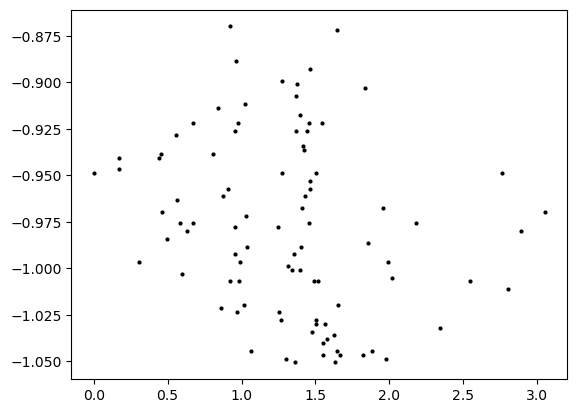

In [27]:
plt.plot(np.abs(wigner_exp_01.data['alpha']), (p_g-p_e), 'o', markersize=2, color='black')

MLE Fidelity:  0.669569174120082
supertitle is  Text(0.5, 0.98, 'MLE Fidelity: 0.6696')
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-07-01_18-15-51_0+1.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-07-01.md


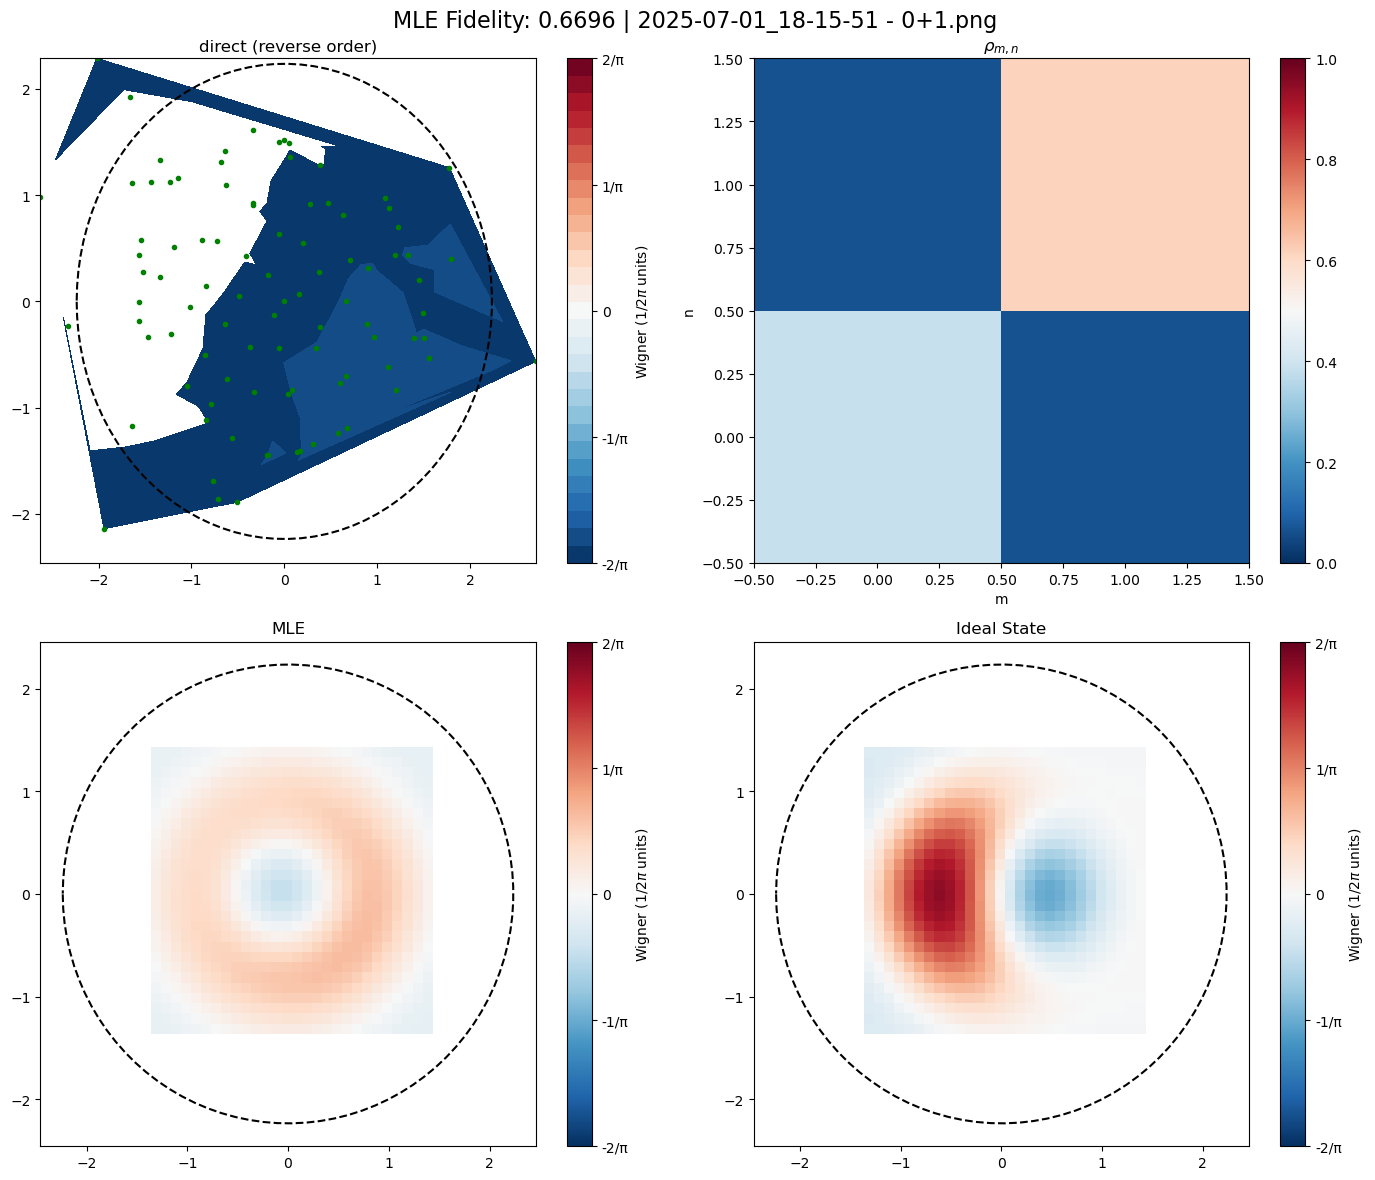

In [28]:
results = wigner_analysis.wigner_analysis_results((p_g -p_e), initial_state=initial_state)
fig = wigner_analysis.plot_wigner_reconstruction_results(results, initial_state=initial_state, state_label = '0+1')

In [431]:
wigner_exp_02 = do_wigner_tomography_1mode(
    config_thisrun=expts_base_inst.config_thisrun,
    expt_path=expts_base_inst.expt_path,
    config_path=expts_base_inst.config_file,
    displace_length=0.05,
    reps = 200,
    displacement_path=return_dict['path'],
    prepulse=True,
    pre_sweep_pulse=pulse_02,
    gate_based = False
)

man mode no: 1


  0%|          | 0/261 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00009_WignerTomography1ModeExperiment.h5


In [469]:
from fitting_folder.wigner import WignerAnalysis
from qutip import fock  
from slab import AttrDict
wigner_analysis = WignerAnalysis(wigner_exp_02.data, config=wigner_exp_02.cfg, mode_state_num=10, alphas = wigner_exp.data['alpha'])
initial_state = (fock(wigner_analysis.m, 2)  + fock(wigner_analysis.m, 0)).unit() # Initial state |0> ?? 1,2, o4 [1,2]
allocated_counts = wigner_analysis.bin_ss_data()
p_e = allocated_counts # Probability of measuring the state |e
p_g = 1 - allocated_counts  # Probability of measuring the state |g

(200, 261)


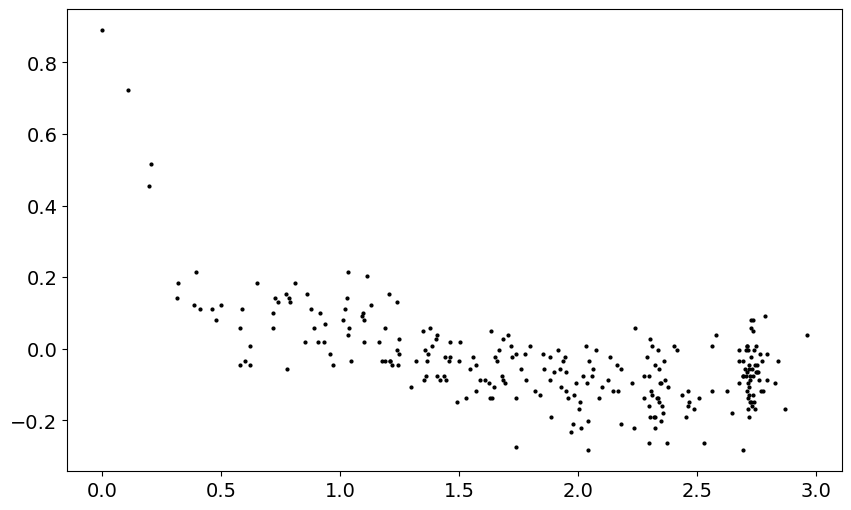

In [433]:
plt.plot(np.abs(wigner_exp_02.data['alpha']), (p_g-p_e), 'o', markersize=2, color='black')

MLE Fidelity:  0.5187873609386402
supertitle is  Text(0.5, 0.98, 'MLE Fidelity: 0.5188')
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-06-18_17-37-35_0+2.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-06-18.md


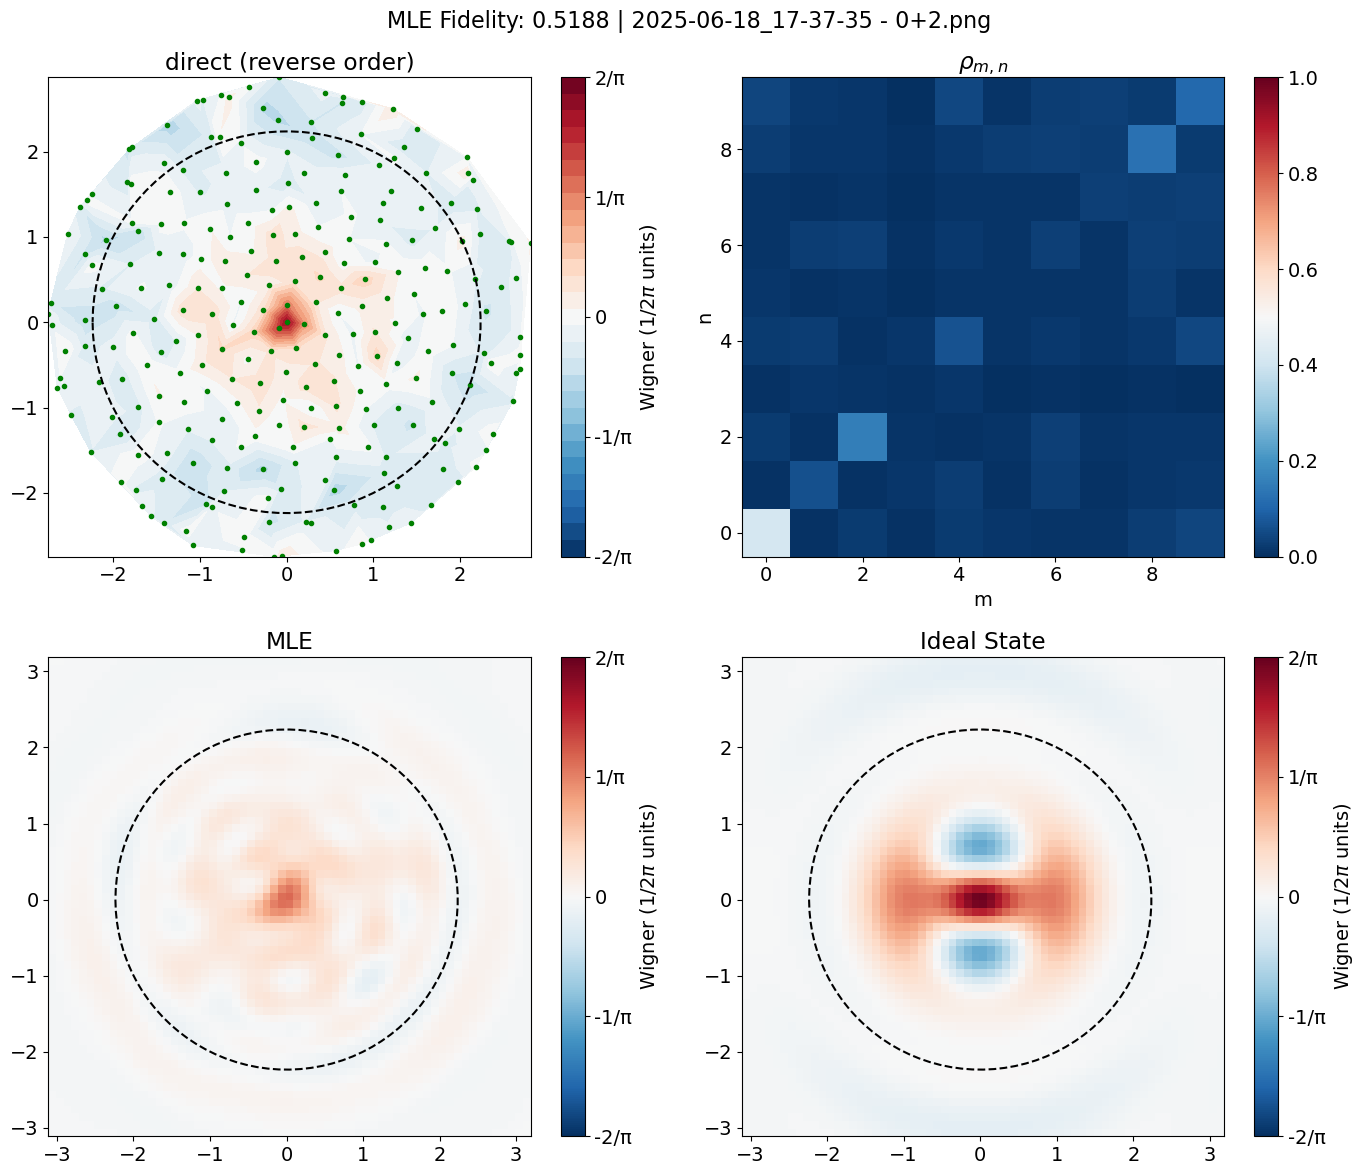

In [470]:
results = wigner_analysis.wigner_analysis_results((p_g -p_e), initial_state=initial_state)
fig = wigner_analysis.plot_wigner_reconstruction_results(results, initial_state=initial_state, state_label = '0+2')

In [415]:
expts_base_inst.soc.deg2reg(180, 0)

2147483648

In [413]:
expts_base_inst.soc.deg2reg(180)

2147483648

In [ ]:
from qutip import wigner, fock, displace
import numpy as np
from matplotlib.ticker import MultipleLocator, FuncFormatter

import matplotlib.pyplot as plt




# Define parameters
N = 15  # Hilbert space dimension
n = 2 # Fock state |n>
xvec = np.linspace(-3, 3, 200)
yvec = np.linspace(-3, 3, 200)
X, Y = np.meshgrid(xvec, yvec)
alpha = X + 1j * Y

# Create Fock state
psi = fock(N, n)

# Compute Wigner function
W = wigner(psi, xvec, yvec)

# Plot
fig, ax = plt.subplots(figsize=(6, 5))
c = ax.pcolormesh(X, Y, W, cmap='RdBu_r', shading='auto', vmin=-2/np.pi, vmax=2/np.pi)
ax.set_xlabel('Re(α)')
ax.set_ylabel('Im(α)')
ax.set_title(f'Wigner function for Fock state |{n}>')
cb = fig.colorbar(c, ax=ax)
cb.set_label('Wigner function')
cb.set_ticks([-2/np.pi, 0, 2/np.pi])
plt.show()

# Save Config

In [562]:
expts_base_inst.config_thisrun

{'device': {'qubit': {'T1': [351.64566547320703],
   'f_ge': [3571.672429380876],
   'f_ef': [3428.4217571066574],
   'ramp_sigma': [0.005],
   'ramp_sigma_num': [3.0],
   'pulses': {'pi_ge': {'gain': [3454],
     'sigma': [0.035],
     'length': [0.0],
     'type': ['gauss']},
    'hpi_ge': {'gain': [1686],
     'length': [0.0],
     'sigma': [0.035],
     'type': ['gauss']},
    'pi_ef': {'gain': [2770],
     'length': [0.0],
     'sigma': [0.035],
     'type': ['gauss']},
    'hpi_ef': {'gain': [1318], 'sigma': [0.035], 'type': ['gauss']}},
   'T1_ef': [144.16571854782674]},
  'readout': {'trig_offset': [450],
   'frequency': [749.1194783440185],
   'gain': [800],
   'phase': [167.22384448659207],
   'threshold': [-121.30623669882084],
   'threshold_list': [[-121.30623669882084]],
   'man1_drive_list': [0.0],
   'man2_drive_list': [0.0],
   'readout_length': [1.5],
   'relax_delay': [2500],
   'confusion_matrix_with_reset': [0.9964530022802125,
    0.0035469977197875036,
    0.01376

In [99]:
expts_base_inst.recursive_compare(expts_base_inst.yaml_cfg, expts_base_inst.config_thisrun)

Key 'device.multiphoton.pi.fn-gn+1.frequency' differs:
  Old value (config1): [2011.3740763005724, 2011.0147366265876, 2010.3014597410997, 2009.7836365005194]
  New value (config2): [2011.6658682784348, 2011.134436736124, 2010.595323987349, 2010.07793195468]


In [100]:
expts_base_inst.handle_config_update(updateConfig_bool=True)

Comparing configurations:
Key 'device.multiphoton.pi.fn-gn+1.frequency' differs:
  Old value (config1): [2011.3740763005724, 2011.0147366265876, 2010.3014597410997, 2009.7836365005194]
  New value (config2): [2011.6658682784348, 2011.134436736124, 2010.595323987349, 2010.07793195468]
Directory created for autocalibration plots at: H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\autocalibration_plots_2025-07-22
Configuration updated and saved, excluding storage_man_file. 
!!!!Please set updateConfig to False after this run!!!!!!.


# Debbugging error amplification

In [291]:
def do_error_amplification(
    config_thisrun,
    expt_path,
    config_path,
    reps=100,
    rounds=1,
    qubit=0,
    n_pulses=10,
    active_reset=False,
    man_reset=True,
    storage_reset=True,
    relax_delay=2500, 
    start = 0,
    expts = 10,
    step = 100,
    parameter_to_test = 'gain',
    pulse_type=['qubit', 'ge', 'pi', 0],
):
    """
    Run the Histogram Prepulse Experiment with configurable parameters.
    """
        
    expt_cfg = {
        'reps': reps,
        'qubit': qubit,
        'qubits': [qubit],
        'active_reset': active_reset,
        'man_reset': man_reset,
        'storage_reset': storage_reset,
        'start': start,
        'expts': expts,
        'step': step,
        'n_pulses': n_pulses,
        'pulse_type': pulse_type,
        'parameter_to_test': parameter_to_test,
        'rounds': rounds,

    }
    error_amp_exp = expts_base_inst.meas.single_qubit.error_amplification.ErrorAmplificationExperiment(
    soccfg=expts_base_inst.soc, path=expts_base_inst.expt_path,
      prefix='ErrorAmplificationExperiment', config_file=expts_base_inst.config_file)
    error_amp_exp.cfg = AttrDict(deepcopy(config_thisrun))
    error_amp_exp.cfg.expt = expt_cfg
    error_amp_exp.go(analyze=False, display=False, progress=True, save=True)
    return error_amp_exp

In [337]:
band = 1500
expts = 25
# gain_start = multiphoton_cfg_thisrun.pulses['hpi_g0-e0'].gain - band
# # gain_start = 28700/2 - band
# # gain_start = expts_base_inst.config_thisrun.device.qubit.pulses.pi_ge.gain[0]-band
# step = 2 * band / expts
# print(f'Gain start: {gain_start}, Step: {step}')

band = 1.5
freq_start = expts_base_inst.config_thisrun.device.qubit.f_ge[0] - band
step = 2 * band / expts
print(f'Frequency start: {freq_start}, Step: {step}')


err_amp = do_error_amplification(
    config_thisrun=expts_base_inst.config_thisrun,
    expt_path=expts_base_inst.expt_path,
    config_path=expts_base_inst.config_file,
    reps=100,
    rounds=1,
    n_pulses = 10,
    expts=expts,
    # start=gain_start,
    start=freq_start,
    step=step,
    # pulse_type=['qubit', 'ge', 'pi', 0],
    pulse_type=['multiphoton', 'g0-e0', 'hpi', 0],
    parameter_to_test='frequency',
    # parameter_to_test='gain',
)

Frequency start: 3565.840096037547, Step: 0.12


  0%|          | 0/9 [00:00<?, ?it/s]

pulse to test: [3567.73, 13235, 0, 0, 2, 'gauss', 0.015]
pulse to test: [3567.73, 13235, 0, 0, 2, 'gauss', 0.015]
pulse to test: [3567.73, 13235, 0, 0, 2, 'gauss', 0.015]
pulse to test: [3567.73, 13235, 0, 0, 2, 'gauss', 0.015]
pulse to test: [3567.73, 13235, 0, 0, 2, 'gauss', 0.015]
pulse to test: [3567.73, 13235, 0, 0, 2, 'gauss', 0.015]
pulse to test: [3567.73, 13235, 0, 0, 2, 'gauss', 0.015]
pulse to test: [3567.73, 13235, 0, 0, 2, 'gauss', 0.015]
pulse to test: [3567.73, 13235, 0, 0, 2, 'gauss', 0.015]
Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00067_ErrorAmplificationExperiment.h5


fitparams [0.01744705450074275, 0.9825529454992572, 3567.760096037547, 0.2880000000000109]


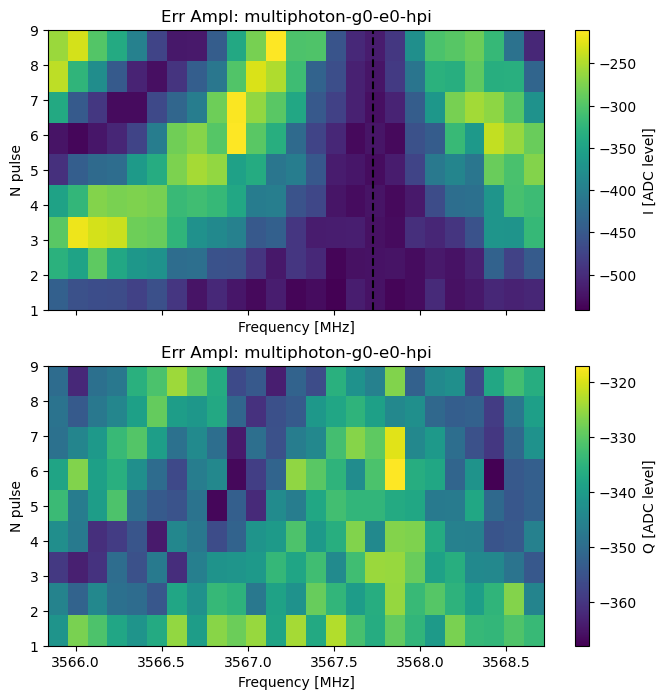

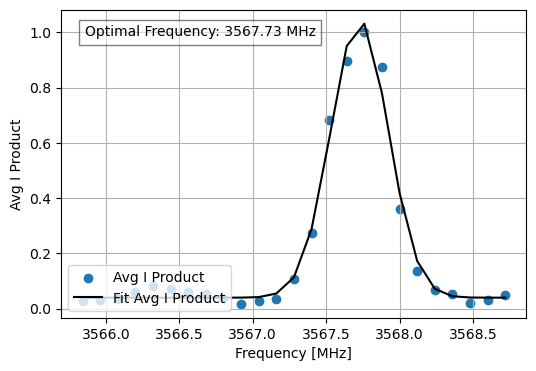

In [338]:
err_amp.analyze()
err_amp.display()